# On server:


midway3

./start_jupyter.sh --ram 163848 --partition caslake --tag 2024.03.1 --max_hours 12 

pattern_map_data can not be downlaoded in the container and I cant figure out how to find the cached version and have straxen on server recognize it so instead I save it explicitly and copy it over with rsync

# on Docker use my dockerfile

In [1]:
# Quick Check to be sure
import os
print(os.getcwd())
import socket
import sys
print(socket.gethostname())
print(os.path.isdir('/scratch/midway3/fsemler'))
EXTRACTED_DIR = "/scratch/midway3/fsemler/monotonic-nn-0.3.5"
sys.path.append(EXTRACTED_DIR)
# Change dir
if '/Code' in os.getcwd():
    os.chdir('/Code/ActualThesisWork')
    pass
else:
    os.chdir('/scratch/midway3/fsemler')
print(os.getcwd())
print(os.listdir(os.getcwd()))

/home/fsemler
midway3-0162.rcc.local
True
/scratch/midway3/fsemler
['layer_definitions.py', 'test.keras', '0.3.5.zip', 'typeguard', 'search_full_model.npy', 'models', 'test_weights.h5', 'monotonic-nn-0.3.5', 'data.npy', 's2_map.pkl', 'student_model_full.json', 'addons', 'targets.npy', 'resource_cache', 'angle_model.keras', 'data', 'functions.py']


In [2]:
"""Only in local Docker env not on server"""
%pip install monotonic-nn==0.3.5 # Just cloned it into a dir 
%pip install tensorflow_probability==0.23 # Comes with 04.03.24
%pip install tensorflow_addons==0.23.0
%pip install tensorflow==2.15

OSError: out of pty devices

In [3]:
import sys, os
import socket
if socket.gethostname() == 'arch-tower':
    os.environ["XENON_CONFIG"] = "/Code/xenon.config"
#import straxen raises an error something like PID not found for tornado 
import numpy as np
import tensorflow as tf
#tf.config.run_functions_eagerly(True)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
# Monotonically inc/dec Dense Layer 
from airt.keras.layers import MonoDense



sys.path.append(os.getcwd())

from functions import *
# Note some things are dualy defined layer definitions has the up to date
from layer_definitions import *

# Its refusing to download it so i just pasted it from a kernel where it could
pmt_pos_top = np.array([[-1.38753e+01, -6.40872e+01],[-2.08129e+01, -6.00818e+01],[-2.77506e+01, -5.60763e+01],[-3.46882e+01, -5.20709e+01],[-4.16259e+01, -4.80654e+01],[-4.85635e+01, -4.40600e+01],[-1.67313e-05, -6.40872e+01],[-6.93766e+00, -6.00818e+01],[-1.38753e+01, -5.60763e+01],[-2.08129e+01, -5.20709e+01],[-2.77506e+01, -4.80654e+01],[-3.46882e+01, -4.40600e+01],[-4.16259e+01, -4.00545e+01],[-4.85635e+01, -3.60491e+01],[-5.55012e+01, -3.20436e+01],[ 1.38753e+01, -6.40872e+01],[ 6.93763e+00, -6.00818e+01],[-1.46399e-05, -5.60763e+01],[-6.93766e+00, -5.20709e+01],[-1.38753e+01, -4.80654e+01],[-2.08129e+01, -4.40600e+01],[-2.77506e+01, -4.00545e+01],[-3.46882e+01, -3.60491e+01],[-4.16259e+01, -3.20436e+01],[-4.85635e+01, -2.80382e+01],[-5.55012e+01, -2.40327e+01],[-6.24388e+01, -2.00273e+01],[ 2.08129e+01, -6.00818e+01],[ 1.38753e+01, -5.60763e+01],[ 6.93763e+00, -5.20709e+01],[-1.25485e-05, -4.80654e+01],[-6.93766e+00, -4.40600e+01],[-1.38753e+01, -4.00545e+01],[-2.08129e+01, -3.60491e+01],[-2.77506e+01, -3.20436e+01],[-3.46882e+01, -2.80382e+01],[-4.16259e+01, -2.40327e+01],[-4.85635e+01, -2.00273e+01],[-5.55012e+01, -1.60218e+01],[-6.24388e+01, -1.20164e+01],[ 2.77506e+01, -5.60763e+01],[ 2.08129e+01, -5.20709e+01],[ 1.38753e+01, -4.80654e+01],[ 6.93763e+00, -4.40600e+01],[-1.04571e-05, -4.00545e+01],[-6.93765e+00, -3.60491e+01],[-1.38753e+01, -3.20436e+01],[-2.08129e+01, -2.80382e+01],[-2.77506e+01, -2.40327e+01],[-3.46882e+01, -2.00273e+01],[-4.16259e+01, -1.60218e+01],[-4.85635e+01, -1.20164e+01],[-5.55012e+01, -8.01092e+00],[-6.24388e+01, -4.00547e+00],[ 3.46882e+01, -5.20709e+01],[ 2.77506e+01, -4.80654e+01],[ 2.08129e+01, -4.40600e+01],[ 1.38753e+01, -4.00545e+01],[ 6.93763e+00, -3.60491e+01],[-8.36565e-06, -3.20436e+01],[-6.93765e+00, -2.80382e+01],[-1.38753e+01, -2.40327e+01],[-2.08129e+01, -2.00273e+01],[-2.77506e+01, -1.60218e+01],[-3.46882e+01, -1.20164e+01],[-4.16259e+01, -8.01091e+00],[-4.85635e+01, -4.00546e+00],[-5.55012e+01, -1.44897e-05],[-6.24388e+01,  4.00544e+00],[ 4.16259e+01, -4.80654e+01],[ 3.46882e+01, -4.40600e+01],[ 2.77506e+01, -4.00545e+01],[ 2.08129e+01, -3.60491e+01],[ 1.38753e+01, -3.20436e+01],[ 6.93764e+00, -2.80382e+01],[-6.27423e-06, -2.40327e+01],[-6.93765e+00, -2.00273e+01],[-1.38753e+01, -1.60218e+01],[-2.08129e+01, -1.20164e+01],[-2.77506e+01, -8.01091e+00],[-3.46882e+01, -4.00546e+00],[-4.16259e+01, -1.08673e-05],[-4.85635e+01,  4.00544e+00],[-5.55011e+01,  8.01089e+00],[-6.24388e+01,  1.20163e+01],[ 4.85635e+01, -4.40600e+01],[ 4.16259e+01, -4.00545e+01],[ 3.46882e+01, -3.60491e+01],[ 2.77506e+01, -3.20436e+01],[ 2.08129e+01, -2.80382e+01],[ 1.38753e+01, -2.40327e+01],[ 6.93764e+00, -2.00273e+01],[-4.18282e-06, -1.60218e+01],[-6.93765e+00, -1.20164e+01],[-1.38753e+01, -8.01091e+00],[-2.08129e+01, -4.00546e+00],[-2.77506e+01, -7.24486e-06],[-3.46882e+01,  4.00544e+00],[-4.16259e+01,  8.01089e+00],[-4.85635e+01,  1.20163e+01],[-5.55011e+01,  1.60218e+01],[-6.24388e+01,  2.00272e+01],[ 4.85635e+01, -3.60491e+01],[ 4.16259e+01, -3.20436e+01],[ 3.46882e+01, -2.80382e+01],[ 2.77506e+01, -2.40327e+01],[ 2.08129e+01, -2.00273e+01],[ 1.38753e+01, -1.60218e+01],[ 6.93764e+00, -1.20164e+01],[-2.09141e-06, -8.01090e+00],[-6.93764e+00, -4.00545e+00],[-1.38753e+01, -3.62243e-06],[-2.08129e+01,  4.00545e+00],[-2.77506e+01,  8.01090e+00],[-3.46882e+01,  1.20163e+01],[-4.16259e+01,  1.60218e+01],[-4.85635e+01,  2.00272e+01],[-5.55011e+01,  2.40327e+01],[ 5.55011e+01, -3.20436e+01],[ 4.85635e+01, -2.80382e+01],[ 4.16259e+01, -2.40327e+01],[ 3.46882e+01, -2.00273e+01],[ 2.77506e+01, -1.60218e+01],[ 2.08129e+01, -1.20163e+01],[ 1.38753e+01, -8.01090e+00],[ 6.93764e+00, -4.00545e+00],[-0.00000e+00,  0.00000e+00],[-6.93764e+00,  4.00545e+00],[-1.38753e+01,  8.01090e+00],[-2.08129e+01,  1.20164e+01],[-2.77506e+01,  1.60218e+01],[-3.46882e+01,  2.00273e+01],[-4.16259e+01,  2.40327e+01],[-4.85635e+01,  2.80382e+01],[-5.55011e+01,  3.20436e+01],[ 5.55011e+01, -2.40327e+01],[ 4.85635e+01, -2.00272e+01],[ 4.16259e+01, -1.60218e+01],[ 3.46882e+01, -1.20163e+01],[ 2.77506e+01, -8.01090e+00],[ 2.08129e+01, -4.00545e+00],[ 1.38753e+01,  3.62243e-06],[ 6.93764e+00,  4.00545e+00],[ 2.09141e-06,  8.01090e+00],[-6.93764e+00,  1.20164e+01],[-1.38753e+01,  1.60218e+01],[-2.08129e+01,  2.00273e+01],[-2.77506e+01,  2.40327e+01],[-3.46882e+01,  2.80382e+01],[-4.16259e+01,  3.20436e+01],[-4.85635e+01,  3.60491e+01],[ 6.24388e+01, -2.00272e+01],[ 5.55011e+01, -1.60218e+01],[ 4.85635e+01, -1.20163e+01],[ 4.16259e+01, -8.01089e+00],[ 3.46882e+01, -4.00544e+00],[ 2.77506e+01,  7.24486e-06],[ 2.08129e+01,  4.00546e+00],[ 1.38753e+01,  8.01091e+00],[ 6.93765e+00,  1.20164e+01],[ 4.18282e-06,  1.60218e+01],[-6.93764e+00,  2.00273e+01],[-1.38753e+01,  2.40327e+01],[-2.08129e+01,  2.80382e+01],[-2.77506e+01,  3.20436e+01],[-3.46882e+01,  3.60491e+01],[-4.16259e+01,  4.00545e+01],[-4.85635e+01,  4.40600e+01],[ 6.24388e+01, -1.20163e+01],[ 5.55011e+01, -8.01089e+00],[ 4.85635e+01, -4.00544e+00],[ 4.16259e+01,  1.08673e-05],[ 3.46882e+01,  4.00546e+00],[ 2.77506e+01,  8.01091e+00],[ 2.08129e+01,  1.20164e+01],[ 1.38753e+01,  1.60218e+01],[ 6.93765e+00,  2.00273e+01],[ 6.27423e-06,  2.40327e+01],[-6.93764e+00,  2.80382e+01],[-1.38753e+01,  3.20436e+01],[-2.08129e+01,  3.60491e+01],[-2.77506e+01,  4.00545e+01],[-3.46882e+01,  4.40600e+01],[-4.16259e+01,  4.80654e+01],[ 6.24388e+01, -4.00544e+00],[ 5.55012e+01,  1.44897e-05],[ 4.85635e+01,  4.00546e+00],[ 4.16259e+01,  8.01091e+00],[ 3.46882e+01,  1.20164e+01],[ 2.77506e+01,  1.60218e+01],[ 2.08129e+01,  2.00273e+01],[ 1.38753e+01,  2.40327e+01],[ 6.93765e+00,  2.80382e+01],[ 8.36565e-06,  3.20436e+01],[-6.93763e+00,  3.60491e+01],[-1.38753e+01,  4.00545e+01],[-2.08129e+01,  4.40600e+01],[-2.77506e+01,  4.80654e+01],[-3.46882e+01,  5.20709e+01],[ 6.24388e+01,  4.00547e+00],[ 5.55012e+01,  8.01092e+00],[ 4.85635e+01,  1.20164e+01],[ 4.16259e+01,  1.60218e+01],[ 3.46882e+01,  2.00273e+01],[ 2.77506e+01,  2.40327e+01],[ 2.08129e+01,  2.80382e+01],[ 1.38753e+01,  3.20436e+01],[ 6.93765e+00,  3.60491e+01],[ 1.04571e-05,  4.00545e+01],[-6.93763e+00,  4.40600e+01],[-1.38753e+01,  4.80654e+01],[-2.08129e+01,  5.20709e+01],[-2.77506e+01,  5.60763e+01],[ 6.24388e+01,  1.20164e+01],[ 5.55012e+01,  1.60218e+01],[ 4.85635e+01,  2.00273e+01],[ 4.16259e+01,  2.40327e+01],[ 3.46882e+01,  2.80382e+01],[ 2.77506e+01,  3.20436e+01],[ 2.08129e+01,  3.60491e+01],[ 1.38753e+01,  4.00545e+01],[ 6.93766e+00,  4.40600e+01],[ 1.25485e-05,  4.80654e+01],[-6.93763e+00,  5.20709e+01],[-1.38753e+01,  5.60763e+01],[-2.08129e+01,  6.00818e+01],[ 6.24388e+01,  2.00273e+01],[ 5.55012e+01,  2.40327e+01],[ 4.85635e+01,  2.80382e+01],[ 4.16259e+01,  3.20436e+01],[ 3.46882e+01,  3.60491e+01],[ 2.77506e+01,  4.00545e+01],[ 2.08129e+01,  4.40600e+01],[ 1.38753e+01,  4.80654e+01],[ 6.93766e+00,  5.20709e+01],[ 1.46399e-05,  5.60763e+01],[-6.93763e+00,  6.00818e+01],[-1.38753e+01,  6.40872e+01],[ 5.55012e+01,  3.20436e+01],[ 4.85635e+01,  3.60491e+01],[ 4.16259e+01,  4.00545e+01],[ 3.46882e+01,  4.40600e+01],[ 2.77506e+01,  4.80654e+01],[ 2.08129e+01,  5.20709e+01],[ 1.38753e+01,  5.60763e+01],[ 6.93766e+00,  6.00818e+01],[ 1.67313e-05,  6.40872e+01],[ 4.85635e+01,  4.40600e+01],[ 4.16259e+01,  4.80654e+01],[ 3.46882e+01,  5.20709e+01],[ 2.77506e+01,  5.60763e+01],[ 2.08129e+01,  6.00818e+01],[ 1.38753e+01,  6.40872e+01]]) 
pmt_pos_top = pmt_pos_top.astype('float32')
#pmt_pos_top = straxen.pmt_positions()[straxen.pmt_positions()['array'] == 'top'].loc[:,['x','y']].to_numpy().astype('float32')
pmt_positions = pmt_pos_top[:,0:2]
not_dead_pmts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252]
dead_pmts = [28, 108, 121, 144, 156, 164, 177]
n_alive_pmts = len(not_dead_pmts)
n_pmts = len(not_dead_pmts)+len(dead_pmts)
angle_model_path = 'angle_model.keras'

2025-05-07 10:21:35.254320: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-07 10:21:35.308101: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-07 10:21:35.308128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-07 10:21:35.309172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-07 10:21:35.317372: I tensorflow/core/platform/cpu_feature_guar

# Training The Wall dist input model

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def compute_reflection_vertices(events, pmts, R, num_angles=360):
    """
    Computes shortest reflection path and vertex on circle for each event-PMT pair.
    
    Args:
        events: (N, 2) array of event (x, y) positions.
        pmts: (M, 2) array of PMT (x, y) positions.
        R: float, circle radius.
        num_angles: number of theta points to sample on the circle.

    Returns:
        d_event: (N, M) distances from event to optimal wall point.
        d_pmt: (N, M) distances from wall point to PMT.
        vertices: (N, M, 2) reflection points on the circle.
    """
    N, M = events.shape[0], pmts.shape[0]
    theta = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    W = np.stack([R * np.cos(theta), R * np.sin(theta)], axis=1)  # (num_angles, 2)

    # Distances from events to W: (N, num_angles)
    d_event_all = np.linalg.norm(events[:, None, :] - W[None, :, :], axis=2)  # (N, A)

    # Distances from PMTs to W: (M, num_angles)
    d_pmt_all = np.linalg.norm(pmts[:, None, :] - W[None, :, :], axis=2)      # (M, A)

    # Broadcast for total distance: (N, M, A)
    d_event = d_event_all[:, None, :]   # (N, 1, A)
    d_pmt   = d_pmt_all[None, :, :]     # (1, M, A)
    total_dist = d_event + d_pmt        # (N, M, A)

    # Find optimal angle indices (N, M)
    idx = np.argmin(total_dist, axis=2)

    # Gather distances at optimal reflection point
    d_event_best = np.take_along_axis(d_event_all[:, None, :], idx[:, :, None], axis=2)[..., 0]  # (N, M)
    d_pmt_best   = np.take_along_axis(d_pmt_all[None, :, :], idx[:, :, None], axis=2)[..., 0]    # (N, M)

    # Gather optimal wall points (N, M, 2)
    vertices = W[idx]

    return d_event_best, d_pmt_best, vertices

def sample_uniform_circle(n, R):
    """
    Samples `n` points uniformly within a circle of radius `R`.

    Returns:
        points: (n, 2) NumPy array of (x, y) positions.
    """
    r = R * np.sqrt(np.random.rand(n))
    theta = 2 * np.pi * np.random.rand(n)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.stack([x, y], axis=1)


def cartesian_to_polar(xy):
    r = np.linalg.norm(xy, axis=1)
    theta = np.arctan2(xy[:, 1], xy[:, 0])
    return np.stack([r, theta], axis=1)

# --- Training data prep  ---
def cartesian_to_polar(xy):
    r = np.linalg.norm(xy, axis=1)
    theta = np.arctan2(xy[:, 1], xy[:, 0])
    return np.stack([r, theta], axis=1)

@keras.saving.register_keras_serializable()
class InputPreprocessor(tf.keras.layers.Layer):
    def __init__(self, mean_r_event, mean_r_pmt, std_r_event, std_r_pmt, **kwargs):
        super().__init__(**kwargs)
        self.mean_r_event_val = mean_r_event
        self.mean_r_pmt_val = mean_r_pmt
        self.std_r_event_val = std_r_event
        self.std_r_pmt_val = std_r_pmt


    def build(self, input_shape):
        # Convert stored values to tensors (ensures they are included in model graph)
        self.mean_r_event = tf.constant(self.mean_r_event_val, dtype=tf.float32, name='mean_r_event')
        self.mean_r_pmt = tf.constant(self.mean_r_pmt_val, dtype=tf.float32, name='mean_r_pmt')
        self.std_r_event = tf.constant(self.std_r_event_val, dtype=tf.float32, name='std_r_event')
        self.std_r_pmt = tf.constant(self.std_r_pmt_val, dtype=tf.float32, name='std_r_pmt')
        super().build(input_shape)

    def call(self, inputs):
        # inputs: (N * M, 4) = [x_event, y_event, x_pmt, y_pmt]
        x_event, y_event, x_pmt, y_pmt = tf.split(inputs, 4, axis=1)

        # Event radius and angle
        r_event = tf.sqrt(tf.square(x_event) + tf.square(y_event)) - self.mean_r_event
        r_event = r_event / self.std_r_event
        theta_event = tf.atan2(y_event, x_event)

        # PMT radius and angle
        r_pmt = tf.sqrt(tf.square(x_pmt) + tf.square(y_pmt)) - self.mean_r_pmt
        r_pmt = r_pmt / self.std_r_pmt
        theta_pmt = tf.atan2(y_pmt, x_pmt)

        # Encode angles
        event_cos = tf.cos(theta_event)
        event_sin = tf.sin(theta_event)
        pmt_cos = tf.cos(theta_pmt)
        pmt_sin = tf.sin(theta_pmt)

        return tf.concat([r_event, event_cos, event_sin, r_pmt, pmt_cos, pmt_sin], axis=1)

    def get_config(self):
        config = super().get_config()
        config.update({
            "mean_r_event": self.mean_r_event_val,
            "mean_r_pmt": self.mean_r_pmt_val,
            "std_r_event": self.std_r_event_val,
            "std_r_pmt": self.std_r_pmt_val
        })
        return config


def compute_reflection_vertices_optimized(events, pmts, R=66.4, max_iter=50, tol=1e-4):
    """
    Compute wall reflection points for event→wall→PMT using a gradient-free 1D optimization routine.
    
    Args:
        events: (N, 2) array of event positions
        pmts: (M, 2) array of PMT positions
        R: radius of the TPC
        max_iter: maximum number of optimization steps
        tol: convergence threshold for step size

    Returns:
        d_event: (N, M) distances from event to wall
        d_pmt: (N, M) distances from wall to PMT
        vertices: (N, M, 2) reflection points on the wall
    """
    N, M = events.shape[0], pmts.shape[0]
    events_exp = np.repeat(events, M, axis=0)     # (N*M, 2)
    pmts_exp = np.tile(pmts, (N, 1))              # (N*M, 2)

    theta_event = np.arctan2(events_exp[:, 1], events_exp[:, 0])
    theta_pmt = np.arctan2(pmts_exp[:, 1], pmts_exp[:, 0])
    theta = 0.5 * np.arctan2(np.sin(theta_event + theta_pmt), np.cos(theta_event + theta_pmt)).astype(np.float32)

    step = 0.1
    i = 0

    def compute_loss(th):
        W = R * np.stack([np.cos(th), np.sin(th)], axis=1)
        return np.linalg.norm(W - events_exp, axis=1) + np.linalg.norm(W - pmts_exp, axis=1)

    while i < max_iter and step > tol:
        loss = compute_loss(theta)
        loss_plus = compute_loss(theta + step)
        loss_minus = compute_loss(theta - step)

        better_plus = loss_plus < loss
        better_minus = loss_minus < loss

        move = np.where(better_plus, step, np.where(better_minus, -step, 0.0))
        theta_new = theta + move
        step = step if np.any(move != 0.0) else step * 0.5
        theta = theta_new
        i += 1

    W_final = R * np.stack([np.cos(theta), np.sin(theta)], axis=1)
    d_event = np.linalg.norm(W_final - events_exp, axis=1).reshape(N, M)
    d_pmt = np.linalg.norm(W_final - pmts_exp, axis=1).reshape(N, M)
    vertices = W_final.reshape(N, M, 2)

    return d_event, d_pmt, vertices

def compute_reflection_vertices_pairwise_optimized(events, pmts, R=66.4, max_iter=50, tol=1e-4):
    """
    Optimized wall reflection point computation for one-to-one (event, PMT) pairs.

    Args:
        events: (N, 2)
        pmts: (N, 2)
        R: radius
        max_iter: max iterations
        tol: step size convergence threshold

    Returns:
        d_event: (N,)
        d_pmt: (N,)
        vertices: (N, 2)
    """
    events = np.asarray(events, dtype=np.float32)
    pmts = np.asarray(pmts, dtype=np.float32)
    N = events.shape[0]

    theta_event = np.arctan2(events[:, 1], events[:, 0])
    theta_pmt = np.arctan2(pmts[:, 1], pmts[:, 0])
    theta = 0.5 * np.arctan2(np.sin(theta_event + theta_pmt), np.cos(theta_event + theta_pmt)).astype(np.float32)

    step = 0.1
    i = 0

    def compute_loss(th):
        W = R * np.stack([np.cos(th), np.sin(th)], axis=1)
        return np.linalg.norm(W - events, axis=1) + np.linalg.norm(W - pmts, axis=1)

    while i < max_iter and step > tol:
        loss = compute_loss(theta)
        loss_plus = compute_loss(theta + step)
        loss_minus = compute_loss(theta - step)

        move = np.where(loss_plus < loss, step, np.where(loss_minus < loss, -step, 0.0))
        theta += move
        step = step if np.any(move != 0.0) else step * 0.5
        i += 1

    vertices = R * np.stack([np.cos(theta), np.sin(theta)], axis=1)
    d_event = np.linalg.norm(vertices - events, axis=1)
    d_pmt = np.linalg.norm(vertices - pmts, axis=1)

    return d_event, d_pmt, vertices


In [ ]:
# Generates 10_000 events + real PMT pos and adds 10_000 evnts with randomized PMT Pos 
events = sample_uniform_circle(5000, 66.4)

vertices = compute_reflection_vertices_optimized(events, pmt_pos_top, R=66.4, max_iter=100, tol=1e-4)[-1]


N, M = events.shape[0], pmt_pos_top.shape[0]
events_exp = np.repeat(events, M, axis=0)   # (N*M, 2)
pmts_exp   = np.tile(pmt_pos_top, (N, 1))          # (N*M, 2)

X_input = np.concatenate([events_exp[:,0:1], events_exp[:,1:2], pmts_exp[:,0:1], pmts_exp[:,1:2]], axis=1)  # (N*M, 4)

# Normalize radius only in input layer
mean_r_event = np.linalg.norm(X_input[:,0:2], axis=-1).mean(axis=0)
mean_r_pmt = np.linalg.norm(X_input[:,2:4], axis=-1).mean(axis=0)
std_r_event = np.linalg.norm(X_input[:,0:2], axis=-1).std(axis=0)
std_r_pmt = np.linalg.norm(X_input[:,2:4], axis=-1).mean(axis=0) 
#std_r  = X_input[:, [0, 2]].std(axis=0)
#X_input[:, [0, 2]] = (X_input[:, [0, 2]] - mean_r) / std_r
# angles (cols 1, 3) remain raw radians in [-π, π]

# Target: reflection angle (cos, sin)
theta_w = np.arctan2(vertices[:, :, 1], vertices[:, :, 0])  # (N, M)
y_target = np.stack([np.cos(theta_w), np.sin(theta_w)], axis=2).reshape(-1, 2)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#tf.debugging.enable_check_numerics()
#tf.debugging.disable_check_numerics()

def build_angle_vector_model():
    inputs = keras.Input(shape=(4,))
    x = InputPreprocessor(mean_r_event, mean_r_pmt, std_r_event, std_r_pmt)(inputs)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    #x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    raw_output = layers.Dense(2)(x)
    output = tf.math.l2_normalize(raw_output, axis=-1, epsilon=1e-8)  # unit vector output
    return keras.Model(inputs=inputs, outputs=output)

def squared_angular_difference_loss(y_true, y_pred):
    """
    loss 0 - 0 deg
    loss 0.001 - 1.81 deg
    loss 0.005 - 4 deg
    loss 0.01 - 5.7 deg
    loss 0.1 - 18.5 deg
    loss 1 - 57.3 deg
    """
    y_true = tf.math.l2_normalize(y_true, axis=-1, epsilon=1e-8)
    y_pred = tf.math.l2_normalize(y_pred, axis=-1, epsilon=1e-8)
    dot = tf.reduce_sum(y_true * y_pred, axis=-1)
    epsilon = 1e-6  # small margin away from ±1
    dot = tf.clip_by_value(dot, -1.0 + epsilon, 1.0 - epsilon)
    angle = tf.acos(dot)
    return tf.reduce_mean(tf.square(angle))

def hybrid_angular_loss(y_true, y_pred):
    y_true = tf.math.l2_normalize(y_true, axis=-1, epsilon=1e-8)
    y_pred = tf.math.l2_normalize(y_pred, axis=-1, epsilon=1e-8)
    dot = tf.reduce_sum(y_true * y_pred, axis=-1)
    dot = tf.clip_by_value(dot, -1.0 + 1e-6, 1.0 - 1e-6)
    angle_rad = tf.acos(dot)

    angle_deg = angle_rad * (180.0 / np.pi)

    # Condition: <1° → sqrt(angle), ≥1° → angle^4
    loss = tf.where(angle_deg < 1.0, tf.sqrt(angle_deg), tf.pow(angle_deg, 4))
    return tf.reduce_mean(loss)

def make_distance_loss(radius=66.4, w_total=0.5, w_e2w=0.25, w_w2p=0.25):
    def loss_fn(y_true, y_pred):
        cos_theta, sin_theta, x_event, y_event, x_pmt, y_pmt = tf.split(y_true, 6, axis=-1)

        event = tf.concat([x_event, y_event], axis=-1)
        pmt   = tf.concat([x_pmt, y_pmt], axis=-1)

        # Prediction
        wall_pred = radius * tf.math.l2_normalize(y_pred, axis=-1, epsilon=1e-8)
        d_e2w = tf.norm(wall_pred - event, axis=1)
        d_w2p = tf.norm(pmt - wall_pred, axis=1)
        d_total = d_e2w + d_w2p

        # True wall point
        wall_true = radius * tf.math.l2_normalize(tf.concat([cos_theta, sin_theta], axis=-1), axis=-1)
        d_e2w_true = tf.norm(wall_true - event, axis=1)
        d_w2p_true = tf.norm(pmt - wall_true, axis=1)
        d_total_true = d_e2w_true + d_w2p_true

        # Weighted squared error
        loss = (w_total * tf.square(d_total - d_total_true) +
                w_e2w   * tf.square(d_e2w - d_e2w_true) +
                w_w2p   * tf.square(d_w2p - d_w2p_true))
        return tf.reduce_mean(loss)
    return loss_fn

y_target_with_coords = np.concatenate([
    y_target,          # (N*M, 2)
    X_input            # (N*M, 4) = [x_event, y_event, x_pmt, y_pmt]
], axis=1)       



N, M = events.shape[0], pmt_pos_top.shape[0]
total_pairs = N * M

# Generate synthetic (event, pmt) pairs directly
events_fake = sample_uniform_circle(total_pairs, 66.4)
pmts_fake   = sample_uniform_circle(total_pairs, 66.4)

X_input_fake = np.concatenate([events_fake, pmts_fake], axis=1)

# Compute wall points

vertices_fake = compute_reflection_vertices_pairwise_optimized(events_fake, pmts_fake, R=66.4, max_iter=100, tol=1e-4)[-1]

theta_fake = np.arctan2(vertices_fake[:, 1], vertices_fake[:, 0])
y_target_fake = np.stack([np.cos(theta_fake), np.sin(theta_fake)], axis=1)

# Targets with input for distance-based loss
y_target_fake_with_coords = np.concatenate([
    y_target_fake,
    X_input_fake
], axis=1)

del y_target_fake # concat makes a copy 
# Combine with original dataset
X_input_combined = np.concatenate([X_input, X_input_fake], axis=0)
del X_input_fake, 
y_target_combined = np.concatenate([y_target_with_coords, y_target_fake_with_coords], axis=0)
del y_target_fake_with_coords


loss_fn = make_distance_loss()

model = build_angle_vector_model()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=loss_fn)

model.fit(X_input_combined, y_target_combined, batch_size=1024, epochs=30, validation_split=0.1)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=loss_fn)

model.fit(X_input_combined, y_target_combined, batch_size=1024, epochs=30, validation_split=0.1)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss=loss_fn)

model.fit(X_input_combined, y_target_combined, batch_size=1024, epochs=30, validation_split=0.1)

model.save('angle_model.keras') # 0.0010200240649282932 ~ 1.82 deg with 4 Dense 64,64,32,2 
"""
Dense complexity cost goes as ^2 in hidden units and ^1 in number of layers

Also trained but not saved 64,32,2 with 2.98 deg
Also trained but not saved 64,64,2 with 2.84 deg (2m42s training)
Also trained but not saved 32,48,32,2 with 2.44 deg (2m50s training)

"""
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss=squared_angular_difference_loss)
print("Mean Error in degrees on pmt positions only: ")
np.rad2deg(np.sqrt(model.evaluate(X_input, y_target, batch_size=1024)))

KeyboardInterrupt: 

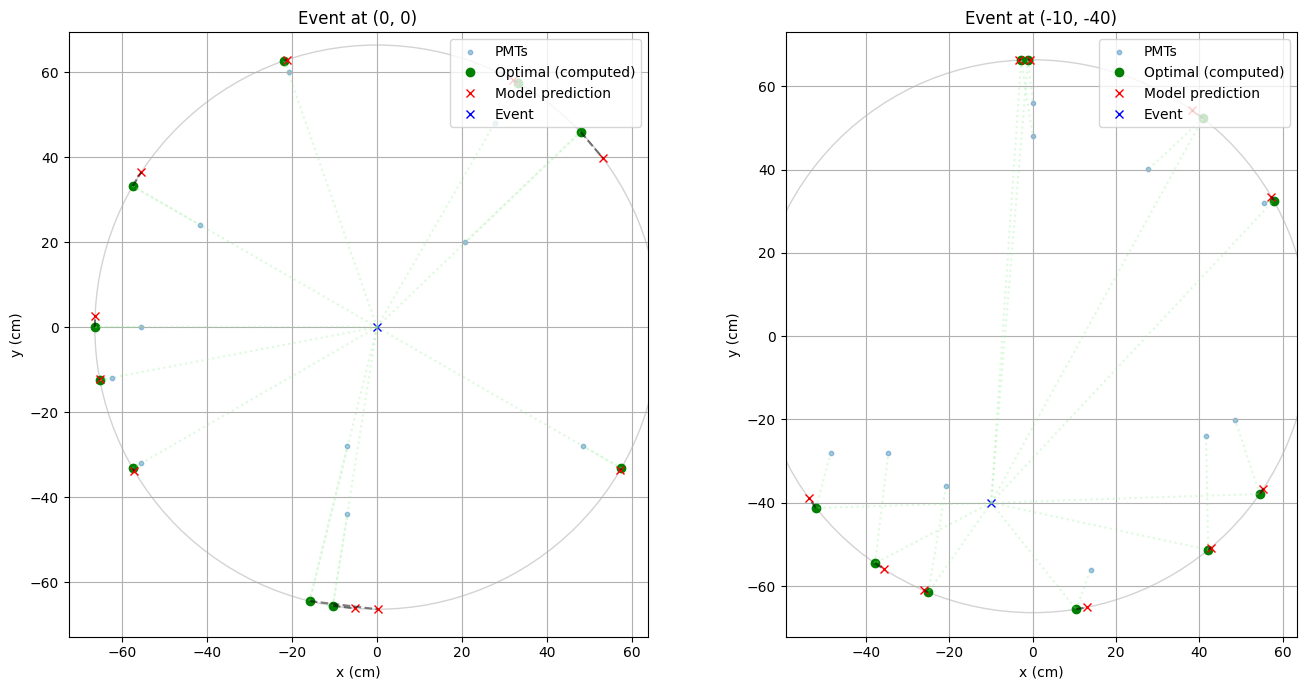

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
event_positions = [np.array([[0.0, 0.0]]), np.array([[-10.0, -40.0]])]
titles = ["Event at (0, 0)", "Event at (-10, -40)"]

for ax, event, title in zip(axs, event_positions, titles):
    pmts = pmt_pos_top[np.random.choice(len(pmt_pos_top), size=10, replace=False)]
    _, _, vertices_true = compute_reflection_vertices(event, pmts, 66.4, num_angles=1800)
    vertices_true = vertices_true[0]

    M = pmts.shape[0]
    events_exp = np.repeat(event, M, axis=0)
    X_infer = np.concatenate([events_exp[:,0:1], events_exp[:,1:2], pmts[:,0:1], pmts[:,1:2]], axis=1)

    pred_vecs = model.predict(X_infer, verbose=0)
    vertices_pred = 66.4 * pred_vecs

    ax.set_aspect('equal')
    circle = plt.Circle((0, 0), 66.4, color='lightgray', fill=False)
    ax.add_artist(circle)

    ax.scatter(pmts[:, 0], pmts[:, 1], s=10, label='PMTs', alpha=0.4)
    ax.plot(vertices_true[:, 0], vertices_true[:, 1], 'go', label='Optimal (computed)')
    ax.plot(vertices_pred[:, 0], vertices_pred[:, 1], 'rx', label='Model prediction')
    ax.plot(event[0, 0], event[0, 1], 'bx', label='Event')

    for pmt, v_true, v_pred in zip(pmts, vertices_true, vertices_pred):
        # Light green dotted lines for true path
        ax.plot([event[0, 0], v_true[0]], [event[0, 1], v_true[1]], color='lightgreen', linestyle=':', alpha=0.3)
        ax.plot([v_true[0], pmt[0]], [v_true[1], pmt[1]], color='lightgreen', linestyle=':', alpha=0.3)
        # Line between true and predicted vertex
        ax.plot([v_true[0], v_pred[0]], [v_true[1], v_pred[1]], 'k--', alpha=0.5)

    ax.set_title(title)
    ax.set_xlabel("x (cm)")
    ax.set_ylabel("y (cm)")
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


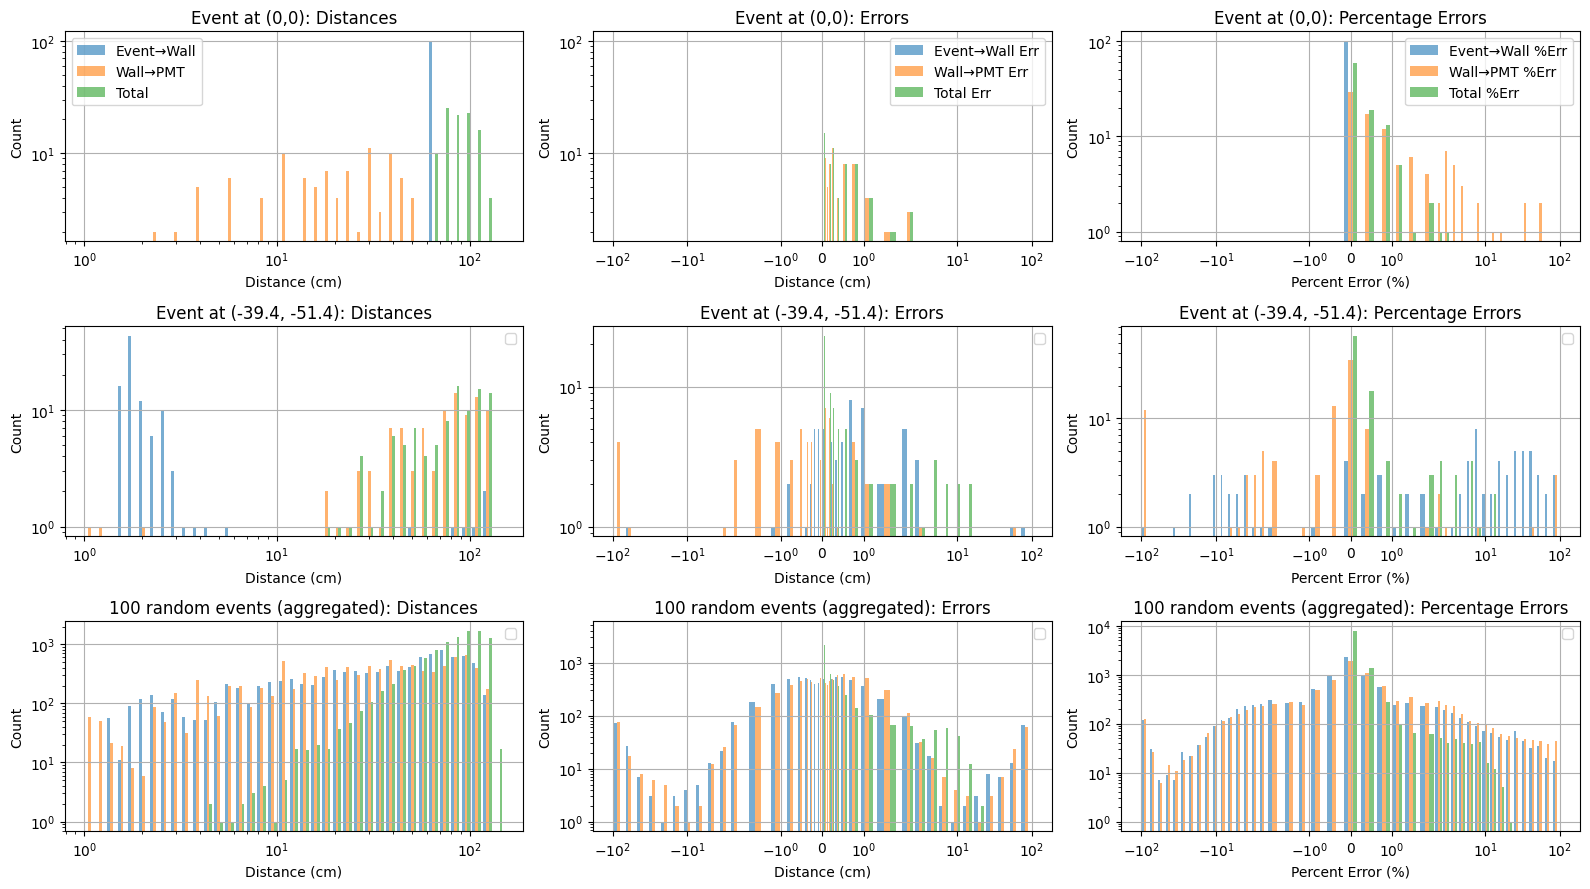

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper functions ---
def compute_distances(event, pmts, vertices_pred, vertices_true):
    d_e2w_true = np.linalg.norm(vertices_true - event, axis=1)
    d_w2p_true = np.linalg.norm(pmts - vertices_true, axis=1)
    d_e2w_pred = np.linalg.norm(vertices_pred - event, axis=1)
    d_w2p_pred = np.linalg.norm(pmts - vertices_pred, axis=1)

    err_e2w = d_e2w_pred - d_e2w_true
    err_w2p = d_w2p_pred - d_w2p_true

    d_total_true = d_e2w_true + d_w2p_true
    d_total_pred = d_e2w_pred + d_w2p_pred
    err_total = d_total_pred - d_total_true

    return (
        (d_e2w_true, d_w2p_true, d_total_true),
        (d_e2w_pred, d_w2p_pred, d_total_pred),
        (err_e2w, err_w2p, err_total)
    )

def process_event(event, pmts):
    _, _, v_true = compute_reflection_vertices(event[None], pmts, 66.4, num_angles=1800)
    v_true = v_true[0]

    X = np.concatenate([np.repeat(event[None], len(pmts), axis=0), pmts], axis=1)
    v_pred = model.predict(X, verbose=0) * 66.4

    return compute_distances(event, pmts, v_pred, v_true)

def percent_error(true, pred):
    return 100.0 * (pred - true) / (true + 1e-8)

def symlog_bins(linthresh=1.0, logbase=10, num=20):
    neg = -np.logspace(np.log10(linthresh), 2, num=num)
    pos = np.logspace(np.log10(linthresh), 2, num=num)
    center = np.linspace(-linthresh, linthresh, num=6)
    return np.unique(np.concatenate([neg, center, pos]))

# --- Bins ---
bins_err = symlog_bins(linthresh=0.1)
bins_pct = symlog_bins(linthresh=1.0, num=20)
bins_dist = np.logspace(np.log10(1), np.log10(150), 40)

# --- Plot setup ---
fig, axs = plt.subplots(3, 3, figsize=(16, 9))
titles = ['Event at (0,0)', '', '100 random events (aggregated)']

# First row
pmts = pmt_pos_top[np.random.choice(len(pmt_pos_top), 100, replace=False)]
event = np.array([0.0, 0.0])
(d_true, d_pred, d_err) = process_event(event, pmts)
pct_err = [percent_error(d_true[i], d_pred[i]) for i in range(3)]

axs[0,0].hist(d_true, bins=bins_dist, label=['Event→Wall', 'Wall→PMT', 'Total'], alpha=0.6)
axs[0,1].hist(d_err, bins=bins_err, label=['Event→Wall Err', 'Wall→PMT Err', 'Total Err'], alpha=0.6)
axs[0,2].hist(pct_err, bins=bins_pct, label=['Event→Wall %Err', 'Wall→PMT %Err', 'Total %Err'], alpha=0.6)

# Second row
event = sample_uniform_circle(1, 66.4)[0]
titles[1] = f"Event at ({event[0]:.1f}, {event[1]:.1f})"
(d_true, d_pred, d_err) = process_event(event, pmts)
pct_err = [percent_error(d_true[i], d_pred[i]) for i in range(3)]

axs[1,0].hist(d_true, bins=bins_dist, alpha=0.6)
axs[1,1].hist(d_err, bins=bins_err, alpha=0.6)
axs[1,2].hist(pct_err, bins=bins_pct, alpha=0.6)

# Third row (aggregated)
all_true, all_pred = [[], [], []], [[], [], []]
for _ in range(100):
    event = sample_uniform_circle(1, 66.4)[0]
    d_true, d_pred, _ = process_event(event, pmts)
    for i in range(3):
        all_true[i].extend(d_true[i])
        all_pred[i].extend(d_pred[i])

all_err = [np.array(all_pred[i]) - np.array(all_true[i]) for i in range(3)]
all_pct = [percent_error(np.array(all_true[i]), np.array(all_pred[i])) for i in range(3)]

axs[2,0].hist(all_true, bins=bins_dist, alpha=0.6)
axs[2,1].hist(all_err, bins=bins_err, alpha=0.6)
axs[2,2].hist(all_pct, bins=bins_pct, alpha=0.6)

# --- Axis scaling ---
for i in range(3):
    axs[i,0].set_xscale('log')     # distances
    axs[i,1].set_xscale('symlog')  # errors
    axs[i,2].set_xscale('symlog')  # % errors
    for j in range(3):
        axs[i,j].set_yscale('log')
        axs[i,j].grid(True)
        axs[i,j].legend()
        axs[i,j].set_xlabel("Distance (cm)" if j < 2 else "Percent Error (%)")
        axs[i,j].set_ylabel("Count")

# Titles
col_titles = ['Distances', 'Errors', 'Percentage Errors']
for i in range(3):
    axs[i,0].set_title(f"{titles[i]}: {col_titles[0]}")
    axs[i,1].set_title(f"{titles[i]}: {col_titles[1]}")
    axs[i,2].set_title(f"{titles[i]}: {col_titles[2]}")

plt.tight_layout()
plt.show()


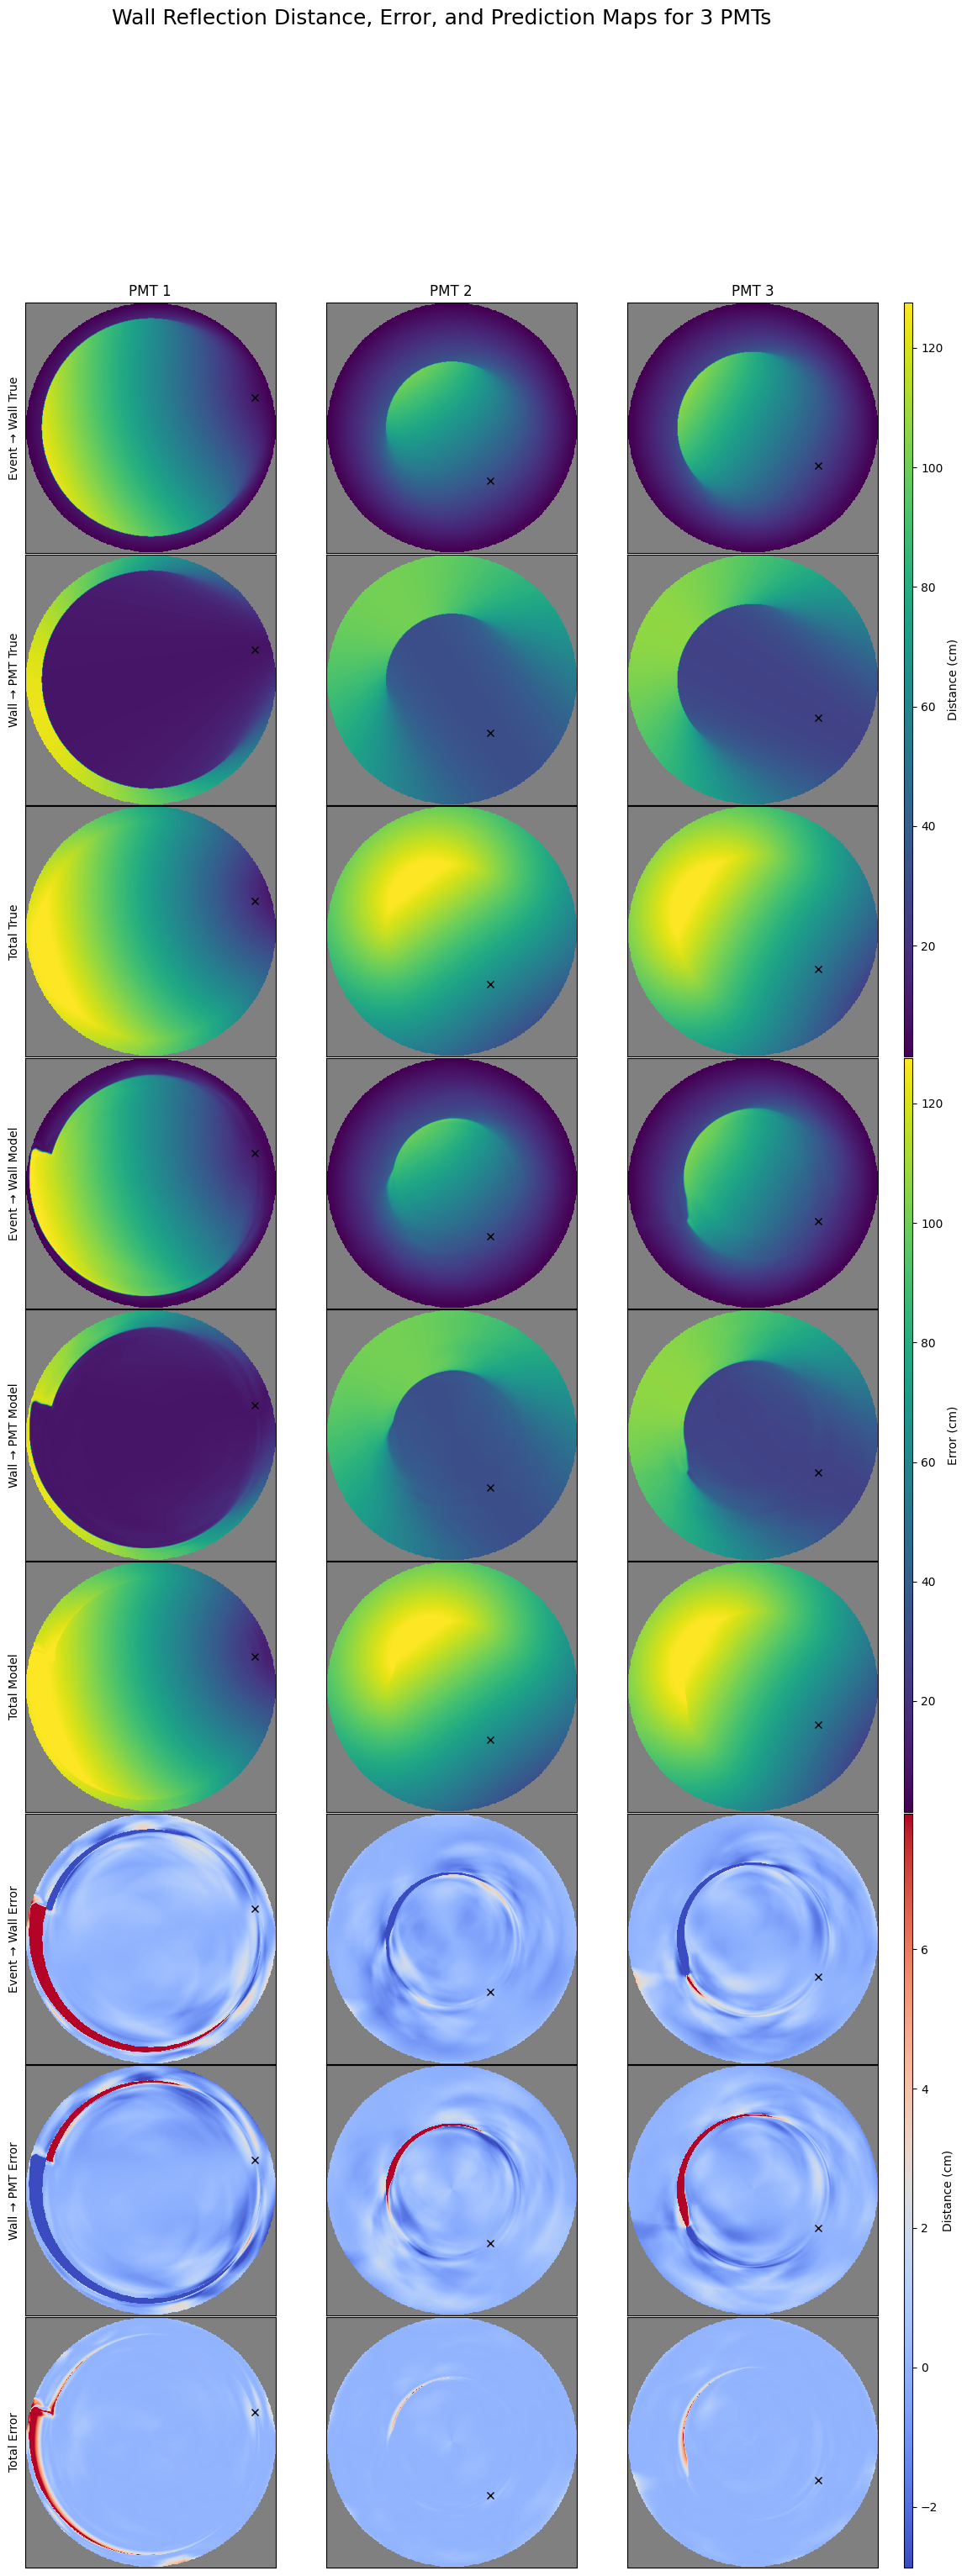

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Parameters
R = 66.4
grid_res = 400
x = np.linspace(-R, R, grid_res)
y = np.linspace(-R, R, grid_res)
xx, yy = np.meshgrid(x, y)
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
inside = np.linalg.norm(grid_points, axis=1) <= R
grid_points = grid_points[inside]

# Pick 3 random PMTs
selected_pmts = pmt_pos_top[np.random.choice(len(pmt_pos_top), 3, replace=False)]
dist_maps = [[], [], []]  # true distances
err_maps  = [[], [], []]  # errors
pred_maps = [[], [], []]  # model predictions

def compute_batched_reflection(grid_points, pmt, R, num_angles=1800, batch_size=10000):
    theta = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    W = np.stack([R * np.cos(theta), R * np.sin(theta)], axis=1)
    all_best_vertices = []
    for i in range(0, len(grid_points), batch_size):
        batch = grid_points[i:i + batch_size]
        d_event = np.linalg.norm(batch[:, None, :] - W[None, :, :], axis=2)
        d_pmt = np.linalg.norm(pmt[None, :] - W[None, :, :], axis=2)
        idx = np.argmin(d_event + d_pmt, axis=1)
        all_best_vertices.append(W[idx])
    return np.vstack(all_best_vertices)

# Compute maps
for pmt in selected_pmts:
    pmts = np.repeat(pmt[None], len(grid_points), axis=0)
    v_true = compute_batched_reflection(grid_points, pmt, R, num_angles=1800)
    X = np.concatenate([grid_points, pmts], axis=1)
    pred_vecs = model.predict(X, verbose=0)
    v_pred = R * pred_vecs

    d_e2w_true = np.linalg.norm(v_true - grid_points, axis=1)
    d_w2p_true = np.linalg.norm(pmts - v_true, axis=1)
    d_total_true = d_e2w_true + d_w2p_true

    d_e2w_pred = np.linalg.norm(v_pred - grid_points, axis=1)
    d_w2p_pred = np.linalg.norm(pmts - v_pred, axis=1)
    d_total_pred = d_e2w_pred + d_w2p_pred

    dist_maps[0].append(d_e2w_true)
    dist_maps[1].append(d_w2p_true)
    dist_maps[2].append(d_total_true)

    err_maps[0].append(d_e2w_pred - d_e2w_true)
    err_maps[1].append(d_w2p_pred - d_w2p_true)
    err_maps[2].append(d_total_pred - d_total_true)

    pred_maps[0].append(d_e2w_pred)
    pred_maps[1].append(d_w2p_pred)
    pred_maps[2].append(d_total_pred)

# Global scales
all_d = np.concatenate([np.concatenate(m) for m in dist_maps + pred_maps])
all_e = np.concatenate([np.concatenate(m) for m in err_maps])
vmin_d, vmax_d = np.percentile(all_d, [1, 99])
vmin_e, vmax_e = np.percentile(all_e, [1, 99])

# Plotting
fig = plt.figure(figsize=(14, 35))
gs = gridspec.GridSpec(9, 4, width_ratios=[1, 1, 1, 0.03], wspace=0.005, hspace=0.005)

names = ['Event → Wall', 'Wall → PMT', 'Total']
cmaps = ['viridis', 'coolwarm']
ims = []

for row in range(9):
    if row < 3:
        data_source = dist_maps
        title_prefix = "True"
        cmap = cmaps[0]
        vmin, vmax = vmin_d, vmax_d
    elif row < 6:
        data_source = pred_maps
        title_prefix = "Model"
        cmap = cmaps[0]
        vmin, vmax = vmin_d, vmax_d
    else:
        data_source = err_maps
        title_prefix = "Error"
        cmap = cmaps[1]
        vmin, vmax = vmin_e, vmax_e
        

    r_idx = row % 3

    for col in range(3):
        ax = fig.add_subplot(gs[row, col])
        values = data_source[r_idx][col]

        z = np.full(xx.shape, np.nan)
        z.ravel()[inside] = values
        ax.set_facecolor('gray')
        im = ax.imshow(z, extent=[-R, R, -R, R], origin='lower',
                       cmap=cmap, vmin=vmin, vmax=vmax)
        ims.append(im)

        pmt = selected_pmts[col]
        ax.plot(pmt[0], pmt[1], 'kx', markersize=6)

        if row == 0:
            ax.set_title(f"PMT {col+1}")
        if col == 0:
            ax.set_ylabel(f"{names[r_idx]} {title_prefix}")

        ax.set_xticks([])
        ax.set_yticks([])

# Colorbars
cax_d = fig.add_subplot(gs[0:3, 3])
cax_e = fig.add_subplot(gs[3:6, 3])
cax_p = fig.add_subplot(gs[6:9, 3])
cbar_d = fig.colorbar(ims[0], cax=cax_d)
cbar_e = fig.colorbar(ims[len(err_maps[0])*3], cax=cax_e)
cbar_p = fig.colorbar(ims[-1], cax=cax_p)
cbar_d.set_label("Distance (cm)")
cbar_e.set_label("Error (cm)")
cbar_p.set_label("Distance (cm)")

fig.suptitle("Wall Reflection Distance, Error, and Prediction Maps for 3 PMTs", fontsize=18)
plt.show()


Mean absolute error: 0.000004 cm
Max absolute error:  0.000037 cm


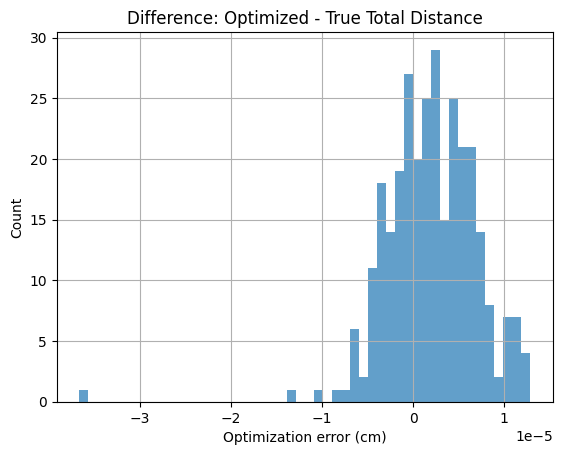

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Sample test points
num_events = 100
events = sample_uniform_circle(num_events, R=66.4)
pmts = pmt_pos_top[np.random.choice(len(pmt_pos_top), 3, replace=False)]

# Build layer
layer = GetWallDistPredictive(
    angle_model=model,
    pmt_positions=pmts,
    tpc_r=66.4,
    mode="optimize"
)

# Run optimized prediction
X_test = tf.convert_to_tensor(events, dtype=tf.float32)
pred_dists = layer._predict_with_optimization(X_test).numpy()  # shape: (N, M, 2)
pred_total = pred_dists.sum(axis=-1)  # shape: (N, M)

# Run grid search
_, _, vertices_true = compute_reflection_vertices_optimized(events, pmts, R=66.4, max_iter = 100, tol=1e-3)
d1_true = np.linalg.norm(events[:, None, :] - vertices_true, axis=-1)
d2_true = np.linalg.norm(pmts[None, :, :] - vertices_true, axis=-1)
true_total = d1_true + d2_true

# Compare
abs_error = pred_total - true_total
max_err = np.abs(abs_error).max()
mean_err = np.mean(np.abs(abs_error))

# Output
print(f"Mean absolute error: {mean_err:.6f} cm")
print(f"Max absolute error:  {max_err:.6f} cm")

# Plot histogram
plt.hist(abs_error.ravel(), bins=50, alpha=0.7)
plt.xlabel("Optimization error (cm)")
plt.ylabel("Count")
plt.title("Difference: Optimized - True Total Distance")
plt.grid(True)
plt.show()


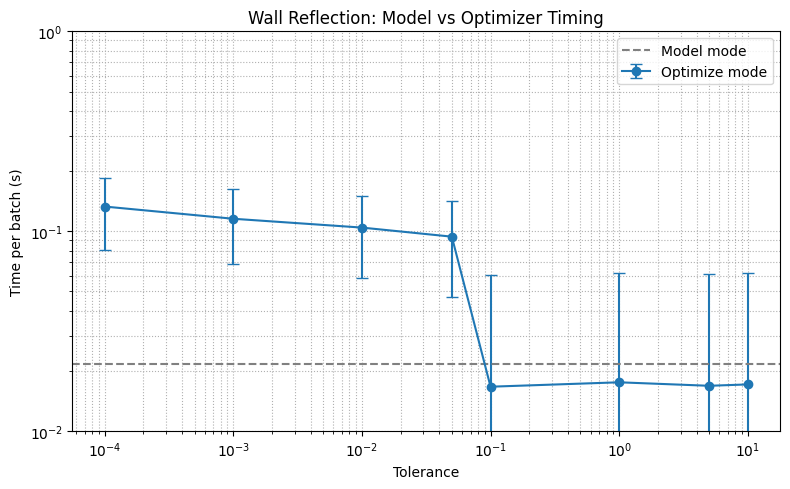

In [16]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# ---- Benchmarking The wall dist layer----

def benchmark_wall_layer(layer, X_batch,  repeat=10):
    times = []
    for _ in range(repeat):
        start = time.time()
        out = layer(X_batch)
        _ = tf.experimental.numpy.asarray(out)
        times.append(time.time() - start)
    return np.mean(times), np.std(times)

# ---- Inputs ----
# Example: batch of 128 random events
batch_size = 128
event_batch = sample_uniform_circle(batch_size, 66.4)
pmt_pos = pmt_pos_top  # assumed shape (M, 2)

# Create input for batch (each event will pair with all PMTs)
X_benchmark = tf.convert_to_tensor(event_batch, dtype=tf.float32)

# ---- Benchmark model mode ----
layer_model = GetWallDistPredictive(
    angle_model=model,
    pmt_positions=pmt_pos,
    tpc_r=66.4,
    mode="model"
)
model_time, model_std = benchmark_wall_layer(layer_model, X_benchmark)

# ---- Benchmark optimize mode for different tolerances ----
tolerances = [10, 5, 1, 1e-1, 5e-2, 1e-2, 1e-3, 1e-4]
opt_times = []
for tol in tolerances:
    layer_opt = GetWallDistPredictive(
        angle_model=model,
        pmt_positions=pmt_pos,
        tpc_r=66.4,
        mode="optimize",
        tol=tol,
        max_iter=100000
    )
    t_mean, t_std = benchmark_wall_layer(layer_opt, X_benchmark)
    opt_times.append((tol, t_mean, t_std))

# ---- Plotting ----
plt.figure(figsize=(8, 5))
tol_vals = [t[0] for t in opt_times]
time_vals = [t[1] for t in opt_times]
time_errs = [t[2] for t in opt_times]

plt.errorbar(tol_vals, time_vals, yerr=time_errs, fmt='o-', capsize=4, label='Optimize mode')
plt.axhline(model_time, linestyle='--', color='gray', label='Model mode')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2, 1e0)
plt.xlabel("Tolerance")
plt.ylabel("Time per batch (s)")
plt.title("Wall Reflection: Model vs Optimizer Timing")
plt.legend()
plt.grid(True, which="both", ls=':')
plt.tight_layout()
plt.show()


# Function Definitions

In [4]:
# Function Definitions 
### --------------------- Position Updates --------------------- ###

def do_grid_search(pos, pattern, model, min_resolution, use_mean = True, start_factor = 0):
    new_pos = pos.copy()
    floss = model.predict({'xy':new_pos, 'pattern':pattern})
    if use_mean:
        floss = np.mean(floss, axis=-1)
    factor = start_factor
    while (1/(2**factor)) >= min_resolution:
        step = (2 ** factor)
        print("Resolution {} : Factor {}".format(1 / step, factor))
        for i in [-1,0,1]:
            for j in [-1,0,1]:
                if i == 0 and j == 0:
                    continue
                offset = np.array([i, j], dtype=new_pos.dtype) / step
                loss = model.predict({'xy':new_pos+offset, 'pattern':pattern})
                if use_mean:
                    loss = np.mean(loss, axis=-1)
                bmap = loss < floss
                if np.any(bmap):
                    new_pos[bmap] += offset
                    floss[bmap] = loss[bmap]
        factor += 1
    return new_pos


def make_encoder(model, x, y):
    n_to_update = len(x)
    input_x = keras.layers.Input(shape=(1,))
    # Position embedding
    m = keras.layers.Embedding(n_to_update, 2, input_length = 1, name='embed_pos')(input_x)
    # Pattern Embedding
    pat = keras.layers.Embedding(n_to_update, n_alive_pmts, input_length = 1, name='embed_pat')(input_x)
    m = keras.layers.Flatten()(m)
    pat = keras.layers.Flatten()(pat)
    m = model({'xy': m, 'pattern':pat})
    rlce_encoder = keras.models.Model(inputs= input_x, outputs=m, name="Position_Updater")
    # radial mc 
    rlce_encoder.layers[-1].trainable = False
    rlce_encoder.get_layer('embed_pos').set_weights([x])
    rlce_encoder.get_layer('embed_pat').set_weights([y])
    rlce_encoder.get_layer('embed_pat').trainable = False
    return rlce_encoder

def train_and_update_pos(positions, patterns, model, loss_function, epochs=3, n_iter = 5, verbose=1):
    early_stopping = tensorflow.keras.callbacks.EarlyStopping(
        monitor='loss',
        restore_best_weights=False,
        patience=4,    
        min_delta=0.05,
        mode='min',    
        verbose=1      
    )
    reduce_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(
        monitor='loss', 
        mode = 'min',
        factor=0.5,     
        patience=2,     
        min_delta=0.05, 
        min_lr=1e-3,    
        verbose=1       
    )
    pos_updater = make_encoder(model, positions, patterns)
    # Inspecting the degree of change
    n_tot = len(positions)
    new_pos = tensorflow.identity(positions)
    loss    = tf.reduce_mean(model.predict({'xy': positions, 'pattern':patterns}), axis=-1)
    print(tf.math.reduce_mean(loss))
    for i in range(n_iter):
        print("Jagged iter {}".format(i))
        # tensorflow_probability requires tensorflow >= 2.16 we have == 2.15
        # Random dist gives max deviation root{2}*pmt_radius (~70% of diameter)
        noise_pos = tensorflow.identity(positions) + np.random.rand(*new_pos.numpy().shape) * 1
        # Update and fit encoder model positions
        pos_updater.get_layer('embed_pos').set_weights([noise_pos])
        # Compile and fit
        pos_updater.compile(loss= loss_function, optimizer = keras.optimizers.Adam(learning_rate=1e-1))
        pos_updater.fit(x = np.arange(n_tot), y = patterns, 
                        epochs = epochs, batch_size = 2**12,
                        callbacks=[early_stopping,reduce_lr], verbose = verbose) 
        noise_pos = pos_updater.get_layer('embed_pos').get_weights()[0]
        # Check result of new pos
        jittered_loss = pos_updater.predict(np.arange(n_tot))

        better = jittered_loss < loss
        loss =    tensorflow.where(better, jittered_loss, loss) 
        print(tf.math.reduce_mean(loss))
        new_pos = tensorflow.where(tensorflow.expand_dims(better, axis=-1), noise_pos, new_pos) 

    return new_pos


# -------------------------------- Generate Parametrized Models ----------------------------------------------#

def gen_direct_detect_model(activation_funcs = ['tanh', 'tanh', 'exponential'], dense_units = [2**6, 2**6], monodense=True):
    # Generate submodels to easily extract them later
    input_1 = tf.keras.layers.Input(shape=(2,), name='xy_1', dtype=tf.float32)
    # Compute Inpute
    pmt_dim1 = tf.keras.layers.RepeatVector(n_alive_pmts, name='Repeat_to_n_pmts')(input_1)
    get_radius = GetRadius((n_alive_pmts, 1), keras.backend.variable(pmt_positions[not_dead_pmts], dtype='float32'), name='Event_PMT_distance')
    get_radius.trainable = False
    event_PMT_Dist = get_radius(pmt_dim1)
    x_PMT_dist = event_PMT_Dist
    x_PMT_dist = keras.layers.Reshape((n_alive_pmts,1), name="Radial_Reshape")(x_PMT_dist)
    #x_PMT_dist = keras.layers.BatchNormalization(name='Direct_batch_norm')(x_PMT_dist)
    x_PMT_dist = keras.layers.Rescaling(1./66.4, name='Direct_batch_norm')(x_PMT_dist)
    # Do Network
    if monodense:
        x_PMT_dist = MonoDense(dense_units[0], 
                                #activation='tanh', 
                                #kernel_initializer=tf.keras.initializers.GlorotUniform(),
                                #is_convex = False, 
                                #is_concave = False, 
                                activation="elu",
                                kernel_initializer="glorot_uniform",
                                is_convex=False, is_concave=False, 
                                monotonicity_indicator = [1],# 1 increasing, -1 non increasing, 0 non monotonic
                                name="PMT_dist_dense_1")(x_PMT_dist)
        x_PMT_dist = MonoDense(dense_units[1], 
                                #activation='tanh', 
                                #kernel_initializer=tf.keras.initializers.GlorotUniform(),
                                #is_convex = False, 
                                #is_concave = False,
                                activation="elu",
                                kernel_initializer="glorot_uniform",
                                is_convex=False, is_concave=False, 
                                monotonicity_indicator = [1],# 1 increasing, -1 non increasing, 0 non monotonic
                                name="PMT_dist_dense_2")(x_PMT_dist)
        x_PMT_dist = keras.layers.Dropout(0.2, name='Direct_Dropout')(x_PMT_dist)
        """x_PMT_dist = MonoDense(1, 
                                activation='exponential', 
                                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01), # Small so that it starts off around exp(0)
                                is_convex = True, 
                                is_concave = False, 
                                monotonicity_indicator = [-1],# 1 increasing, -1 non increasing, 0 non monotonic
                                name="PMT_dist_dense_3")(x_PMT_dist)"""
        x_PMT_dist = MonoDense(
                                1,
                                activation='softplus',
                                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01),
                                is_convex=True,
                                is_concave=False,
                                monotonicity_indicator=[-1],
                                name="PMT_dist_dense_3"
                            )(x_PMT_dist)
    else:# Same thing using normal dense layers
        x_PMT_dist = keras.layers.Dense(dense_units[0], 
                                activation="elu",
                                kernel_initializer="glorot_uniform",
                                name="PMT_dist_dense_1")(x_PMT_dist)
        x_PMT_dist = keras.layers.Dense(dense_units[1], 
                                activation="elu",
                                kernel_initializer="glorot_uniform",
                                name="PMT_dist_dense_2")(x_PMT_dist)
        x_PMT_dist = keras.layers.Dropout(0.2, name='Direct_Dropout')(x_PMT_dist)
        x_PMT_dist = keras.layers.Dense(
                                1,
                                activation='softplus',
                                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01),
                                name="PMT_dist_dense_3"
                            )(x_PMT_dist)
    # Reshape And Normalize
    #x_PMT_dist = ReshapeArray(n_alive_pmts, name='PMTDist_Reshape')(x_PMT_dist)
    x_PMT_dist = keras.layers.Reshape((n_alive_pmts,), name="Radial_Reshape2")(x_PMT_dist)
    x_PMT_dist = NormalizationLayer(name='PMT_dist_norm')(x_PMT_dist)
    model_PMT_Dist = tf.keras.Model(inputs=input_1, outputs=x_PMT_dist, name="PMTDistance_Pattern_Response")
    return model_PMT_Dist

def gen_radialLCE(n_groups, group_slices, guess):
    # Input layer
    input_1 = tf.keras.layers.Input(shape=(2,), name='xy_1', dtype=tf.float32)
    # Get distance
    pmt_dim1 = tf.keras.layers.RepeatVector(n_alive_pmts, name='Repeat_to_n_pmts')(input_1)
    get_radius = GetRadius((n_alive_pmts, 1), keras.backend.variable(pmt_positions[not_dead_pmts], dtype='float32'), name='Event_PMT_distance')
    get_radius.trainable = False
    event_PMT_Dist = get_radius(pmt_dim1)
    # Apply radial lce 
    m = RadialLCELayer(name='radial_lce',guess= guess, n_groups=n_groups, group_slices=group_slices)(event_PMT_Dist)
    # Normalization Layer 
    m = NormalizationLayer(name='Normalization')(m)
    return keras.models.Model(inputs=input_1, outputs=m, name="Radial_LCE")

def gen_reflection_model(activation_funcs = ['tanh', 'tanh', 'exponential'], dense_units = [2**4, 2**4]):
    input_2 = tf.keras.layers.Input(shape=(2,), name='xy_2', dtype=tf.float32)
    # Compute Input
    #get_wall_dist = GetWallDist((int(n_alive_pmts)+1, 1), keras.backend.variable(pmt_positions[not_dead_pmts], dtype='float32'), tpc_r= keras.backend.variable(66.4 , dtype='float32'),  name='Event_Wall_distance')
    get_wall_dist = GetWallDistPredictive(angle_model=lambda x: x, 
                                          model_path=angle_model_path, 
                                          pmt_positions=pmt_pos_top[not_dead_pmts], 
                                          tpc_r=66.4, 
                                          name='Event_Wall_distance')
    get_wall_dist.set_mode('optimize', max_iter =100, tol=1e-1)
    get_wall_dist.trainable = False
    x_Wall_dist = get_wall_dist(input_2)
    #x_Wall_dist = keras.layers.BatchNormalization(name='reflect_batch_norm')(x_Wall_dist)
    x_Wall_dist = keras.layers.Rescaling(1./66.4, name='reflect_batch_norm')(x_Wall_dist)
    # Do Network
    x_Wall_dist = MonoDense(dense_units[0], 
                            activation='tanh', 
                            kernel_initializer=tf.keras.initializers.GlorotUniform(),
                            is_convex = False, 
                            is_concave = False, 
                            monotonicity_indicator = [-1,-1],# 1 increasing, -1 non increasing, 0 non monotonic
                            name="PMT_wall_dense_1")(x_Wall_dist)
    x_Wall_dist = MonoDense(dense_units[1], 
                            activation='tanh', 
                            kernel_initializer=tf.keras.initializers.GlorotUniform(),
                            is_convex = False, 
                            is_concave = False, 
                            monotonicity_indicator = [1],# 1 increasing, -1 non increasing, 0 non monotonic
                            name="PMT_wall_dense_2")(x_Wall_dist)
    x_Wall_dist = MonoDense(1, 
                            activation='exponential', 
                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01), # Small so that it starts off around exp(0)
                            #activation = 'sigmoid', 
                            #is_convex = True, 
                            #is_concave = False, 
                            monotonicity_indicator = [1],# 1 increasing, -1 non increasing, 0 non monotonic
                            name="PMT_wall_dense_3")(x_Wall_dist)
    # Reshape And Normalize
    x_Wall_dist = keras.layers.Reshape((n_alive_pmts,), name="Wall_Reshape")(x_Wall_dist)
    #x_Wall_dist = NormalizationLayer(name='Wall_dist_norm')(x_Wall_dist) 
    #x_Wall_dist = keras.layers.Lambda(lambda X: X/(tf.reduce_mean(X, axis=1, keepdims=True)+1e-9))(x_Wall_dist)
    model_Wall_Dist = tf.keras.Model(inputs=input_2, outputs=x_Wall_dist, name="Wall_Reflection_Pattern_Response")
    return model_Wall_Dist

def gen_perp_model(activation_funcs = ['relu', 'relu', 'sigmoid'], dense_units = [2**4, 2**4]):
    input_3 = tf.keras.layers.Input(shape=(2,), name='xy_3', dtype=tf.float32)
    # Compute Input (batch, n_pmts) # TODO DEBUG
    get_perp_inputs = PerpendicularWire_Parametrization(pmt_pos_top[not_dead_pmts], pmt_r=7.62 / 2 , name='Perp_Parametrization')
    get_perp_inputs.trainable = False
    anode_in = get_perp_inputs(input_3)
    anode_in = keras.layers.BatchNormalization(name='Perp_batch_norm')(anode_in)
    # Do Network
    x_anode = MonoDense(dense_units[0], 
                            activation='relu', 
                            kernel_initializer=tf.keras.initializers.he_normal(),
                            monotonicity_indicator = [1],# 1 increasing, -1 non increasing, 0 non monotonic
                            name="perp_dense_1")(anode_in)
    x_anode = MonoDense(dense_units[1], 
                            activation='relu', 
                            kernel_initializer=tf.keras.initializers.he_normal(),
                            monotonicity_indicator = [1],# 1 increasing, -1 non increasing, 0 non monotonic
                            name="perp_dense_2")(x_anode)
    x_anode = MonoDense(1, 
                            activation="sigmoid", 
                            monotonicity_indicator = [-1],# 1 increasing, -1 non increasing, 0 non monotonic
                            #kernel_initializer=tf.keras.initializers.glorot_normal(),
                            kernel_initializer=tf.keras.initializers.Zeros(),
                            bias_initializer=tf.keras.initializers.Constant(1.0),
                            name="perp_dense_3")(x_anode)
    x_anode = keras.layers.Reshape((246,), name="Perp_Reshape")(x_anode)
    model_anode = tf.keras.Model(inputs=input_3, outputs=x_anode, name="PerpendicularWire_Pattern_Response")
    return model_anode

def gen_anode_model(activation_funcs = ['relu', 'relu', 'sigmoid'], dense_units = [2**4, 2**4]):
    input_3 = tf.keras.layers.Input(shape=(2,), name='xy_4', dtype=tf.float32)
    # Compute Input (batch, n_pmts)
    get_anode_inputs = Anode_Parametrization(pmt_pos=pmt_pos_top[not_dead_pmts], 
                                             pmt_r=7.62 / 2 , 
                                             name='Anode_Parametrization')
    get_anode_inputs.trainable = False
    anode_in = get_anode_inputs(input_3)
    #anode_in = input_3
    #anode_in = keras.layers.LayerNormalization(name='anode_batch_norm')(anode_in)
    # Do Network
    x_anode = MonoDense(dense_units[0], 
                            activation='relu', 
                            kernel_initializer=tf.keras.initializers.he_normal(),
                            # Inputs are:
                            # N wires in way, And angle relative to the wires (0->90 deg) I am not sure if this crosses more but baseds on simulation there should be maximal wire in way however, there might be weird behavior so no monotonicity
                            # For now we do monotoniclly increasing (inverse of what we want the output to be)
                            # So more wires in way incresing output, less angle increasing output and we invert in the end
                            monotonicity_indicator = [1, 0],# 1 increasing, -1 non increasing, 0 non monotonic
                            name="anode_dense_1")(anode_in)
    x_anode = MonoDense(dense_units[1], 
                            activation='relu', 
                            kernel_initializer=tf.keras.initializers.he_normal(),
                            monotonicity_indicator = [1],# 1 increasing, -1 non increasing, 0 non monotonic
                            name="anode_dense_2")(x_anode)
    x_anode = MonoDense(1, 
                            activation="sigmoid", 
                            monotonicity_indicator = [-1],# 1 increasing, -1 non increasing, 0 non monotonic
                            #kernel_initializer=tf.keras.initializers.glorot_normal(),
                            kernel_initializer=tf.keras.initializers.Zeros(),
                            bias_initializer=tf.keras.initializers.Constant(1.0),
                            name="anode_dense_3")(x_anode)
    #x_anode = ReshapeArray(n_alive_pmts, name='Anode_Reshape')(x_anode)
    #x_anode = keras.layers.Lambda(lambda X: X/(tf.reduce_mean(X, axis=-1, keepdims=True)+1e-9))(x_anode)
    x_anode = keras.layers.Reshape((246,), name="Anode_Reshape")(x_anode)
    model_anode = tf.keras.Model(inputs=input_3, outputs=x_anode, name="Anode_Pattern_Response")
    return model_anode



def check_layer_exists(model, layer_name):
    for layer in model.layers:
        if layer.name == layer_name:
            return True
    return False


def gen_model(seed=0, 
              starting_model=None, 
              include_wall = False, 
              include_perp = False, 
              include_anode = False, 
              stds=None, # In case one wants to incldue stds prior to lut computation 
              multiplication_layers = False, # Replace addition layers with multiplication layers
              radialLCE = False,
              monodense = True, # If using MonoDense layers or using Dense  
              ):
    """
    Generates all models in every possible Configuration
    """

    # Set Seed
    tf.keras.utils.set_random_seed(seed)

    # Inputs  
    input_xy = tf.keras.layers.Input(shape=(2,), name='xy', dtype=tf.float32)
    input_pattern = tf.keras.layers.Input(shape=(246,), name='pattern', dtype=tf.float32)

    # Direct Detection
    if not radialLCE:
        x_PMT_dist_ =  gen_direct_detect_model(activation_funcs = ['tanh', 'tanh', 'exponential'], dense_units = [2**6, 2**6], monodense=monodense)
    else:
        x_PMT_dist_ = gen_radialLCE(n_groups=1, group_slices=np.arange(len(not_dead_pmts)), guess=[1.6266745e+00,  9.4918861e+00, -4.2176653e-05,  7.7804564e-03,])
    if starting_model is not None:
        if check_layer_exists(starting_model, 'PMTDistance_Pattern_Response'):
            x_PMT_dist_.set_weights(starting_model.get_layer('PMTDistance_Pattern_Response').get_weights())
        elif check_layer_exists(starting_model, 'Radial_LCE'):
            x_PMT_dist_.set_weights(starting_model.get_layer('Radial_LCE').get_weights())
    

    out = x_PMT_dist_(input_xy)

    # Reflection
    if include_wall:
        x_Wall_dist_ = gen_reflection_model(activation_funcs = ['tanh', 'tanh', 'exponential'], dense_units = [2**6, 2**6])
        if starting_model is not None:
            if check_layer_exists(starting_model, 'Wall_Reflection_Pattern_Response'):
                x_Wall_dist_.set_weights(starting_model.get_layer('Wall_Reflection_Pattern_Response').get_weights())
        wall_addition = AdditionLayer((246, ), name='AddReflectionContribution')
        if starting_model is not None:
            if check_layer_exists(starting_model, 'AddReflectionContribution'):
                wall_addition.set_weights(starting_model.get_layer('AddReflectionContribution').get_weights())
        out = wall_addition([out, x_Wall_dist_(input_xy)])

    # Perpendicular
    if include_perp:
        x_perp_ = gen_perp_model(activation_funcs = ['relu', 'relu', 'sigmoid'], dense_units = [2**6, 2**6])
        if starting_model is not None:
            if check_layer_exists(starting_model, 'PerpendicularWire_Pattern_Response'):
                x_perp_.set_weights(starting_model.get_layer('PerpendicularWire_Pattern_Response').get_weights())
        if multiplication_layers:
            perp_addition = tf.keras.layers.Multiply( name='MulPerpContribution')
        else:
            perp_addition = AdditionLayer((246, ), name='AddPerpContribution')
        if starting_model is not None:
            if check_layer_exists(starting_model, 'AddPerpContribution'):
                perp_addition.set_weights(starting_model.get_layer('AddPerpContribution').get_weights())
        out= perp_addition([out, x_perp_(input_xy)])

    # Anode
    if include_anode:
        x_anode_ = gen_anode_model(activation_funcs = ['relu', 'relu', 'sigmoid'], dense_units = [2**6, 2**6])
        if starting_model is not None:
            if check_layer_exists(starting_model, 'Anode_Pattern_Response'):
                x_anode_.set_weights(starting_model.get_layer('Anode_Pattern_Response').get_weights())
        if multiplication_layers:
            anode_addition = tf.keras.layers.Multiply( name='MulAnodeContribution')
        else:
            anode_addition = AdditionLayer((246, ), name='AddAnodeContribution')
        if starting_model is not None:
            if check_layer_exists(starting_model, 'AddAnodeContribution'):
                anode_addition.set_weights(starting_model.get_layer('AddAnodeContribution').get_weights())
        out = anode_addition([out, x_anode_(input_xy)])


    # I0 Layer
    i0 = I0Layer(n_alive_pmts, init_val=1, name='i0')
    if starting_model is not None:
        if check_layer_exists(starting_model, 'i0'):
            i0.set_weights(starting_model.get_layer('i0').get_weights())
            
    pattern = i0(out)
    # Normalize and shift 
    #pattern = keras.layers.Lambda(
    #    lambda x: x + tf.maximum(0.0, -tf.reduce_min(x, axis=-1, keepdims=True))
    #    )(i0out)
    pattern = NormalizationLayer(name='normalization')(pattern)

    # Add Loss layer
    loss_layer = LikelihoodRatio(   n_pmts=n_alive_pmts, 
                                    return_ratio=False,
                                    switching_signal=40, 
                                    n_sigma=5, # Sigma range for Poisson and Binom sums
                                    sigma_min = 0.05, # Minimum std
                                    sigma_max = 1.0, # Maximum std
                                    z=20, # Number of std steps
                                    p_dpe=0.2, 
                                    nan_safe=False, # replaces nan inputs with high loss
                                    nan_safe_value = 1e5, 
                                    m=5, # x & mu integer subdivisions
                                    name="LossLayer")
    #if (starting_model is not None):
    #    if check_layer_exists(starting_model, 'LossLayer'):
    #        loss_layer.set_weights(starting_model.get_layer('LossLayer').get_weights())
    if stds is not None:
        loss_layer.set_std(stds)
            
    loss_layer.set_call_mode("exact")
    res = loss_layer(pattern,input_pattern)
    
    model = tf.keras.Model(inputs=(input_xy, input_pattern), outputs=res)

    return model 


@keras.saving.register_keras_serializable()
class InputPreprocessor(tf.keras.layers.Layer):
    def __init__(self, mean_r_event, mean_r_pmt, std_r_event, std_r_pmt, **kwargs):
        super().__init__(**kwargs)
        self.mean_r_event_val = mean_r_event
        self.mean_r_pmt_val = mean_r_pmt
        self.std_r_event_val = std_r_event
        self.std_r_pmt_val = std_r_pmt


    def build(self, input_shape):
        # Convert stored values to tensors (ensures they are included in model graph)
        self.mean_r_event = tf.constant(self.mean_r_event_val, dtype=tf.float32, name='mean_r_event')
        self.mean_r_pmt = tf.constant(self.mean_r_pmt_val, dtype=tf.float32, name='mean_r_pmt')
        self.std_r_event = tf.constant(self.std_r_event_val, dtype=tf.float32, name='std_r_event')
        self.std_r_pmt = tf.constant(self.std_r_pmt_val, dtype=tf.float32, name='std_r_pmt')
        super().build(input_shape)

    def call(self, inputs):
        # inputs: (N * M, 4) = [x_event, y_event, x_pmt, y_pmt]
        x_event, y_event, x_pmt, y_pmt = tf.split(inputs, 4, axis=1)

        # Event radius and angle
        r_event = tf.sqrt(tf.square(x_event) + tf.square(y_event)) - self.mean_r_event
        r_event = r_event / self.std_r_event
        theta_event = tf.atan2(y_event, x_event)

        # PMT radius and angle
        r_pmt = tf.sqrt(tf.square(x_pmt) + tf.square(y_pmt)) - self.mean_r_pmt
        r_pmt = r_pmt / self.std_r_pmt
        theta_pmt = tf.atan2(y_pmt, x_pmt)

        # Encode angles
        event_cos = tf.cos(theta_event)
        event_sin = tf.sin(theta_event)
        pmt_cos = tf.cos(theta_pmt)
        pmt_sin = tf.sin(theta_pmt)

        return tf.concat([r_event, event_cos, event_sin, r_pmt, pmt_cos, pmt_sin], axis=1)

    def get_config(self):
        config = super().get_config()
        config.update({
            "mean_r_event": self.mean_r_event_val,
            "mean_r_pmt": self.mean_r_pmt_val,
            "std_r_event": self.std_r_event_val,
            "std_r_pmt": self.std_r_pmt_val
        })
        return config



In [5]:
# ----------------------------- Folder Layout ----------------------------------------------#
curr_path = os.getcwd()
data_path = os.path.join(curr_path, 'data')
model_path = os.path.join(curr_path, 'models')
if not os.path.exists(model_path): os.makedirs(model_path)
pos_refit_path = os.path.join(data_path, 'pos_refit')
if not os.path.exists(pos_refit_path): os.makedirs(pos_refit_path)
# For grid search
# We want fine enough for anode shadow to be resolved so at least 0.025 cm 
# -> Using 0.015625
min_resolution = (1/2)**6 # Total 1 + 6 iter

In [6]:
import pickle
import straxen, strax

#pattern_map_data = straxen.common.get_resource('XENONnT_s2_xy_patterns_LCE_corrected_qes_MCva43fa9b_wires.pkl', fmt='pkl')

with open('s2_map.pkl', 'rb') as handle:
    pattern_map_data = pickle.load(handle)

if 'compressed' in pattern_map_data:
    compressor, dtype, shape = pattern_map_data['compressed']
    pattern_map_data['map'] = np.frombuffer(
        strax.io.COMPRESSORS[compressor]['decompress'](pattern_map_data['map']),
                                                       dtype=dtype).reshape(*shape)
    del pattern_map_data['compressed']
if 'quantized' in pattern_map_data:
    pattern_map_data['map'] = pattern_map_data['quantized'] * pattern_map_data['map'].astype(np.float32)
    del pattern_map_data['quantized']

pattern_map_data['map'] = pattern_map_data['map'].reshape((-1, pattern_map_data['map'].shape[-1]))
vmap = pattern_map_data['map'][:, not_dead_pmts]
vmap.shape

csys = pattern_map_data['coordinate_system']
grid = [np.linspace(left, right, points)
        for _, (left, right, points) in csys]
csys = np.array(np.meshgrid(*grid, indexing='ij'))
axes = np.roll(np.arange(len(grid) + 1), -1)
csys = np.transpose(csys, axes)
csys = np.array(csys).reshape((-1, len(grid)))
csys.shape

@tf.function
def knn_itp(csys, vmap, pos, k_t):

    dx = tf.reshape(csys[:, 0], (-1, 1)) - pos[:, 0]  # (coor_idx, batch)
    dy = tf.reshape(csys[:, 1], (-1, 1)) - pos[:, 1]  # (coor_idx, batch)

    dr = - (dx ** 2 + dy ** 2) ** 0.5  # (coor_idx, batch)
    dr = tf.transpose(dr, [1, 0])  # (batch, coor_idx)

    dis, indx = tf.math.top_k(dr, k_t)  # (batch, coor_idx[0:4])

    wits = 1.0 / tf.clip_by_value(-dis, 1e-6, float('inf'))
    vals = tf.transpose(tf.gather(vmap, indx,), (2, 0, 1))  # (pmt, batch, coor_idx[0:4])

    vals = tf.divide(tf.math.reduce_sum(tf.multiply(vals, wits), -1),
                     tf.math.reduce_sum(wits, -1))  # (pmt, batch)
    vals = tf.transpose(vals, (1, 0)) # (batch, pmt)

    return vals

class InferMC(tf.keras.layers.Layer):
    def build(self, input_shape):
        self.csys = tf.convert_to_tensor(csys, tf.float32)
        self.vmap = tf.convert_to_tensor(vmap, tf.float32)
        super().build(input_shape)
    
    def call(self, inputs):
        pos, output = inputs[0], inputs[1]
        mc = knn_itp(self.csys, self.vmap, pos, 4)
        mc = mc / tf.reshape(tf.reduce_sum(mc, axis=1), (-1, 1))
        mc.set_shape(output.get_shape())
        return mc



def gen_mod_Shenayang(weight_path=None):
    from tensorflow.keras.initializers import HeNormal, Zeros, Constant
    input_x = tf.keras.layers.Input(shape=(2,), name='xy', dtype=tf.float32)
    x = tf.keras.layers.RepeatVector(n_alive_pmts, name='repeat_vector')(input_x)
    x = tf.keras.layers.Conv1D(filters=96, kernel_size=1, activation='relu', kernel_initializer=HeNormal(), bias_initializer=Zeros(),name='conv_1d_0')(x)
    x = tf.keras.layers.Dropout(0.2, name='dropout_0')(x)
    x = tf.keras.layers.Conv1D(filters=48, kernel_size=1, activation='relu', kernel_initializer=HeNormal(), bias_initializer=Zeros(), name='conv_1d_1')(x)
    x = tf.keras.layers.Conv1D(filters=24, kernel_size=1, activation='relu', kernel_initializer=HeNormal(), bias_initializer=Zeros(), name='conv_1d_2')(x)
    x = tf.keras.layers.Conv1D(filters=12, kernel_size=1, activation='relu', kernel_initializer=HeNormal(), bias_initializer=Zeros(), name='conv_1d_3')(x)
    # Start of such that output is approx 1
    x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, activation='sigmoid',  kernel_initializer=Zeros(), bias_initializer=Zeros(), name='conv_1d_4')(x)
    x = tf.keras.layers.Flatten(name='flatten')(x)
    # Get pattern
    x = I0Layer(n_alive_pmts, name='i0')(x)
    mc = InferMC(name='infer_mc')([input_x, x])
    x = tf.keras.layers.multiply([x, mc], name='multiply')
    pattern = NormalizationLayer(name='normalization')(x)
    
    input_pattern = tf.keras.layers.Input(shape=(n_alive_pmts,), name='pattern', dtype=tf.float32)
    # Construct it to use Guassian Approximation for now 
    loss_layer = LikelihoodRatio( n_pmts=n_alive_pmts, 
                            switching_signal=40, 
                            n_sigma=5, # Sigma range for Poisson and Binom sums
                            sigma_min = 0.05, # Minimum std
                            sigma_max = 1.0, # Maximum std
                            m = 10, # x & mu integer subdivisions
                            z=20, # Number of std steps
                            p_dpe=0.2, 
                            nan_safe=True, # replaces nan inputs with high loss
                            nan_safe_value = 1e5, 
                            name="LossLayer")
    #loss_layer = LikelihoodRatioLUT(n_pmts=n_alive_pmts,name="LossLayer")
    loss_layer.set_call_mode("LUT_untrainable_std")
    loss = loss_layer(pattern,input_pattern)
    model = keras.models.Model(inputs = [input_x, input_pattern], outputs = loss)
    # Load the weights
    if weight_path is not None:
        model.load_weights(weight_path,by_name=True, skip_mismatch=True)
    # Set the model to the correct mode
    #model.get_layer("LossLayer").set_call_mode("LUT_untrainable_std")

    return model


In [61]:
"""# Save to file 
# Save the pattern map data to a file
with open('s2_map.pkl', 'wb') as f:
    pickle.dump(pattern_map_data, f)"""

"# Save to file \n# Save the pattern map data to a file\nwith open('s2_map.pkl', 'wb') as f:\n    pickle.dump(pattern_map_data, f)"

# Training Strategy

- Train Shenyangs CNN with new Loss Function
- Train Parametrization with teacher student approach 
- Do Position encoder
- Repeat above should take only 3-5 hours


Also retrain the dense model for Distance (such that it is faster than solving to 1e-1)  

In [7]:
def get_callback():
    #https://stackoverflow.com/questions/52227286/reducelronplateau-fallback-to-the-previous-weights-with-the-minimum-acc-loss
    from tensorflow.python.keras.callbacks import ReduceLROnPlateau
    from tensorflow.python.platform import tf_logging as logging
    import tensorflow as tf

    class ReduceLRBacktrack(ReduceLROnPlateau):
        def __init__(self, best_path, *args, **kwargs):
            super(ReduceLRBacktrack, self).__init__(*args, **kwargs)
            self.best_path = best_path

        def on_epoch_end(self, epoch, logs=None):
            current = logs.get(self.monitor)
            lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
            print(f"Epoch {epoch+1} end learning rate = {lr:.6f}")
            if current is None:
                logging.warning('Reduce LR on plateau conditioned on metric `%s` '
                                'which is not available. Available metrics are: %s',
                                self.monitor, ','.join(list(logs.keys())))
            if not self.monitor_op(current, self.best): # not new best
                if not self.in_cooldown(): # and we're not in cooldown
                    if self.wait+1 >= self.patience: # going to reduce lr
                        # load best model so far
                        print("Backtracking to best model before reducting LR")
                        self.model.load_weights(self.best_path)
            super().on_epoch_end(epoch, logs)

        def on_epoch_begin(self, epoch, logs=None):
            lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
            print(f"Epoch {epoch+1} Begin learning rate = {lr:.6f}")
            super().on_epoch_begin(epoch, logs)
    return ReduceLRBacktrack
ReduceLRBacktrack = get_callback()


# -------------------------------------------- Training Loops and misc --------------------------------------------
def train_cnn(identifier, pos, patterns, train_split, val_split, base_weights=None, lr_scale=1):
    
    biased_model = gen_mod_Shenayang()

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=2,
            min_lr=1e-10,
            verbose=1
        )

    bs = 2**13
    # Train Model
    biased_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
    if base_weights is not None:
        biased_model.load_weights(base_weights, by_name=True, skip_mismatch=True)
    biased_model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001*lr_scale, clipnorm=1))
    path = os.path.join(model_path,"biased_model_trained_{identifier}.h5".format(identifier=identifier))
    if not os.path.exists(path):
        biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                                y = None,callbacks=[reduce_lr], 
                                validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                                epochs = 30, batch_size = bs,
                                verbose = 1)#callbacks=[reduce_lr, early_stopping], 
        biased_model.save(path)
    else:
        print("Skipping training ", path)
        biased_model.load_weights(path)
    
    print("Train Variances")
    # Train Variances
    for layer in biased_model.layers:
        layer.trainable = False
    biased_model.get_layer('LossLayer').set_call_mode("LUT_trainable_std", return_ratio = False)
    biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001*lr_scale))
    path = os.path.join(model_path,"biased_model_trained_var_{identifier}.h5".format(identifier=identifier))
    if not os.path.exists(path):
        biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                                y = patterns[train_split],
                                validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                                epochs = 10, batch_size = bs,callbacks=[reduce_lr], 
                                verbose = 1)
        biased_model.save(path)
    else:
        print("Skipping training ", path)
        biased_model.load_weights(path)

    for layer in biased_model.layers:
        layer.trainable = True 
    biased_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
    # Train Model drop on plateou
    
    biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001*lr_scale))
    path = os.path.join(model_path,"biased_model_trained_var_trained_{identifier}.h5".format(identifier=identifier))
    biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                            y = None,
                            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                            epochs = 30, batch_size = bs,
                            callbacks=[reduce_lr], verbose = 1)
    biased_model.save(path)

    return biased_model

class TeacherStudentModel(tensorflow.keras.Model):
    def __init__(self, teacher, student, temperature=1.0):
        """
        Args:
            teacher: A Keras Model that generates the target pattern.
            student: A Keras Model that tries to mimic the teacher.
            temperature: A parameter for softening distributions (if needed).
        """
        super(TeacherStudentModel, self).__init__()
        self.teacher = teacher
        self.student = student
        self.temperature = temperature
        # Freeze the teacher's weights.
        self.teacher.trainable = False

    def compile(self, optimizer, distillation_loss, **kwargs):
        """
        Args:
            optimizer: Optimizer for updating student weights.
            distillation_loss: Loss function comparing teacher and student predictions.
        """
        super(TeacherStudentModel, self).compile(**kwargs)
        self.optimizer = optimizer
        self.distillation_loss = distillation_loss

    def train_step(self, x):
        # x is provided directly; no dummy labels are needed.
        teacher_preds = self.teacher(x, training=False)
        
        with tf.GradientTape() as tape:
            student_preds = self.student(x, training=True)
            loss = self.distillation_loss(teacher_preds, student_preds)

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))
        return {"loss": loss}

    def test_step(self, x):
        teacher_preds = self.teacher(x, training=False)
        student_preds = self.student(x, training=False)
        loss = self.distillation_loss(teacher_preds, student_preds)
        return {"loss": loss}
    
def train_on_teacher(weight_path =None, teacher =None,n_points = 25_000):
    # Do teacher student training
    if teacher is None:
        teacher_superset = gen_mod_Shenayang(weight_path="biased_model_trained_var_trained_0.h5")
        teacher = tf.keras.Model(inputs = teacher_superset.get_layer("xy").input, outputs=teacher_superset.get_layer("normalization").output)
    seed = np.random.randint(0, 100000)
    print(seed)
    student = gen_model(seed=seed, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
    student = tf.keras.Model(inputs = student.get_layer("xy").input, outputs=student.get_layer("normalization").output)

    ts_model = TeacherStudentModel(teacher, student)


    mse_loss = tf.keras.losses.MeanSquaredError()
    def mspe(y_true, y_pred):
        return mse_loss(y_true*100, y_pred*100)

    def mpe(y_true, y_pred):
        return tf.math.reduce_mean(tf.math.abs(y_true*100-y_pred*100))

    theta = 2 * np.pi * np.random.rand(n_points)
    r = np.sqrt(np.random.rand(n_points)) * 66.4
    X_dummy = np.column_stack((r * np.cos(theta), r * np.sin(theta)))  # Dummy input data
    ts_dataset = tf.data.Dataset.from_tensor_slices(X_dummy).batch(32)

    ts_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), distillation_loss=mspe)
    ts_model.fit(ts_dataset, epochs=4)

    ts_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), distillation_loss=mpe)
    ts_model.fit(ts_dataset, epochs=5)

    # New dummy set
    theta = 2 * np.pi * np.random.rand(n_points)
    r = np.sqrt(np.random.rand(n_points)) * 66.4
    X_dummy = np.column_stack((r * np.cos(theta), r * np.sin(theta)))  # Dummy input data
    ts_dataset = tf.data.Dataset.from_tensor_slices(X_dummy).batch(32)

    ts_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), distillation_loss=mpe)
    ts_model.fit(ts_dataset, epochs=3)

    # Inspect Anode and Perp contributions
    print("Addition Layer Weight Contribution")
    for i in ts_model.student.layers:
        if "Add" in i.name:
            print(i.name)
            print(i.get_weights())
            print("")
    return ts_model.student

def plot_response_components(test_model, coord = [0,0]):
    direct_model = test_model.get_layer("PMTDistance_Pattern_Response")
    reflection_model = test_model.get_layer("Wall_Reflection_Pattern_Response")
    perp_model = test_model.get_layer("PerpendicularWire_Pattern_Response")
    anode_model = test_model.get_layer("Anode_Pattern_Response")
    # make 2x2 plot of prediction for x=0,0
    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    ax = ax.flatten()
    for i, model in enumerate((direct_model, reflection_model, perp_model, anode_model)):
        res = np.zeros(len(not_dead_pmts)+len(dead_pmts))
        res[not_dead_pmts] = model.predict([coord])[0]
        plot_pmt_response(pmt_pos=pmt_pos_top, response=res, ax=ax[i], mark_spot=coord, dead_pmts=dead_pmts, title=model.name)

In [11]:
import pandas as pd

file ='/Code/processed_data/all_data_min_filter.pkl.gz'
df = pd.read_pickle(file)
pos = df[['s2_x_gcn', 's2_y_gcn']].values
bmap = ~np.any(np.isnan(pos),axis=-1)
pos = pos[bmap]
patterns = df['s2_area_per_channel'].values[bmap]
del df
patterns = np.column_stack(patterns).T[:, not_dead_pmts]

seed = np.random.randint(0, 100000)
data_path = "/Code/processed_data/Krypton"#os.path.join(data_path)

ns = np.arange(500_000)

np.random.seed(seed)
np.random.shuffle(ns)

split = 0.7
train_split = ns[:int(split*500_000)]
val_split = ns[int(split*500_000):]

# 245  - 
print(seed)

identifier = 0

KeyboardInterrupt: 

In [8]:
try:
    # Local 
    from straxen.config.url_config import URLConfig
except:
    # Server
    from straxen.url_config import URLConfig


# 1. Fill in your run‐ID and algorithm name
run_id    = "057648"
algorithm = "gcn"

# 2. Build the full URL string, chaining protocols:
#    cmt://… extracts the tarball name from CMT,
#    resource://… downloads it (your custom register),
#    tf://… opens it with tf.keras.models.load_model
url = (
    f"tf://"
    f"resource://"
    f"cmt://{algorithm}_model"
    f"?version=ONLINE"
    f"&run_id={run_id}"
    f"&fmt=abs_path"
)

# 3. Evaluate it “dry” (i.e. outside of any Plugin)
gcn_model = URLConfig.evaluate_dry(url)
# `model` is now your tf.keras.Model instance


In [9]:
# -------------------------------- Load Data ----------------------------------------------#
def tmp(path):
    # SR2 Processed data 
    tmp = []
    for i in os.listdir(path):
        if not os.path.isdir(os.path.join(path, i)):
            tmp +=  [np.load(os.path.join(path, i))['arr_0']]
    tmp = np.concatenate(tmp)
    # Return all top pmt entries
    return np.column_stack([tmp['s2_x_cnf'], tmp['s2_y_cnf']]), tmp['s2_area_per_channel'][:,:np.maximum(np.max(not_dead_pmts), np.max(dead_pmts))+1]

seed = np.random.randint(0, 100000)
#data_path = "/Code/processed_data/new_Kr"#os.path.join(data_path)
pos, patterns = tmp(data_path)
# Reconstruct with gcn - I do not know why source code does max rather than norm scaling
pos = gcn_model.predict(patterns/np.max(patterns, axis=1).reshape(-1, 1))
patterns = patterns[:, not_dead_pmts]

points = len(pos)
ns = np.arange(points)

np.random.seed(seed)
np.random.shuffle(ns)

split = 0.7
train_split = ns[:int(split*len(ns))]
val_split = ns[int(split*len(ns)):]

# 245  - 
print(seed)

identifier = 0

56191/56191 [==============================] - 60s 1ms/step
16072


In [12]:
loss = make_mcMap_model_eval().predict( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)
# replace nan entries 
np.mean(loss[loss!=1e5])

16858/16858 [==============================] - 64s 4ms/step


1.9144529

In [27]:
pred = make_mcMap_model().predict( x = {'xy':pos},)
bmap = ~np.any(np.isnan(pred),axis=-1)
del pred

56191/56191 [==============================] - 181s 3ms/step


In [30]:
# Train CNN on new data with GCN
cnn = train_cnn('first', pos, patterns, train_split[bmap[train_split]], val_split[bmap[val_split]], base_weights=None, lr_scale = 1e-3)

Epoch 1/30
154/154 [==============================] - 171s 1s/step - loss: 1.8187 - val_loss: 1.8133 - lr: 1.0000e-06
Epoch 2/30
154/154 [==============================] - 170s 1s/step - loss: 1.8084 - val_loss: 1.8042 - lr: 1.0000e-06
Epoch 3/30
154/154 [==============================] - 170s 1s/step - loss: 1.8002 - val_loss: 1.7968 - lr: 1.0000e-06
Epoch 4/30
154/154 [==============================] - 170s 1s/step - loss: 1.7936 - val_loss: 1.7910 - lr: 1.0000e-06
Epoch 5/30
154/154 [==============================] - 170s 1s/step - loss: 1.7885 - val_loss: 1.7866 - lr: 1.0000e-06
Epoch 6/30
154/154 [==============================] - 170s 1s/step - loss: 1.7848 - val_loss: 1.7835 - lr: 1.0000e-06
Epoch 7/30
154/154 [==============================] - 170s 1s/step - loss: 1.7822 - val_loss: 1.7814 - lr: 1.0000e-06
Epoch 8/30
154/154 [==============================] - 170s 1s/step - loss: 1.7806 - val_loss: 1.7803 - lr: 1.0000e-06
Epoch 9/30
154/154 [==============================] - 17

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
154/154 [==============================] - 125s 810ms/step - loss: 2.5812 - val_loss: 2.5796 - lr: 1.0000e-06
Epoch 2/10
154/154 [==============================] - 124s 807ms/step - loss: 2.5812 - val_loss: 2.5796 - lr: 1.0000e-06
Epoch 3/10
154/154 [==============================] - ETA: 0s - loss: 2.5812
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999949504855e-07.
154/154 [==============================] - 124s 809ms/step - loss: 2.5812 - val_loss: 2.5796 - lr: 1.0000e-06
Epoch 4/10
154/154 [==============================] - 124s 808ms/step - loss: 2.5812 - val_loss: 2.5796 - lr: 2.0000e-07
Epoch 5/10
154/154 [==============================] - ETA: 0s - loss: 2.5812
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.00000004674439e-08.
154/154 [==============================] - 132s 862ms/step - loss: 2.5812 - val_loss: 2.5796 - lr: 2.0000e-07
Epoch 6/10
154/154 [==============================] - 124s 809ms/step - loss: 2.5812 - val_loss: 2.5796 - lr: 4

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/30
154/154 [==============================] - 171s 1s/step - loss: 1.7822 - val_loss: 1.7832 - lr: 1.0000e-06
Epoch 2/30
154/154 [==============================] - 171s 1s/step - loss: 1.7837 - val_loss: 1.7849 - lr: 1.0000e-06
Epoch 3/30
154/154 [==============================] - ETA: 0s - loss: 1.7855
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999949504855e-07.
154/154 [==============================] - 171s 1s/step - loss: 1.7855 - val_loss: 1.7867 - lr: 1.0000e-06
Epoch 4/30
154/154 [==============================] - 171s 1s/step - loss: 1.7866 - val_loss: 1.7871 - lr: 2.0000e-07
Epoch 5/30
154/154 [==============================] - ETA: 0s - loss: 1.7870
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.00000004674439e-08.
154/154 [==============================] - 171s 1s/step - loss: 1.7870 - val_loss: 1.7875 - lr: 2.0000e-07
Epoch 6/30
154/154 [==============================] - 171s 1s/step - loss: 1.7872 - val_loss: 1.7875 - lr: 4.0000e-08
Epoch 7/

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
# Train Again (double Variance refined)
cnn = train_cnn('second', pos, patterns, train_split[bmap[train_split]], val_split[bmap[val_split]], 
                base_weights=os.path.join(model_path,"biased_model_trained_var_trained_{identifier}.h5".format(identifier='first')), 
                lr_scale = 1e-3)

Epoch 1/30
154/154 [==============================] - 169s 1s/step - loss: 1.7884 - val_loss: 1.7898 - lr: 1.0000e-06
Epoch 2/30
154/154 [==============================] - 168s 1s/step - loss: 1.7906 - val_loss: 1.7921 - lr: 1.0000e-06
Epoch 3/30
154/154 [==============================] - ETA: 0s - loss: 1.7929
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999949504855e-07.
154/154 [==============================] - 168s 1s/step - loss: 1.7929 - val_loss: 1.7943 - lr: 1.0000e-06
Epoch 4/30
154/154 [==============================] - 168s 1s/step - loss: 1.7943 - val_loss: 1.7948 - lr: 2.0000e-07
Epoch 5/30
154/154 [==============================] - ETA: 0s - loss: 1.7947
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.00000004674439e-08.
154/154 [==============================] - 168s 1s/step - loss: 1.7947 - val_loss: 1.7953 - lr: 2.0000e-07
Epoch 6/30
154/154 [==============================] - 168s 1s/step - loss: 1.7950 - val_loss: 1.7954 - lr: 4.0000e-08
Epoch 7/

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
154/154 [==============================] - 129s 835ms/step - loss: 2.5887 - val_loss: 2.5870 - lr: 1.0000e-06
Epoch 2/10
154/154 [==============================] - 123s 799ms/step - loss: 2.5887 - val_loss: 2.5870 - lr: 1.0000e-06
Epoch 3/10
154/154 [==============================] - ETA: 0s - loss: 2.5887
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999949504855e-07.
154/154 [==============================] - 123s 799ms/step - loss: 2.5887 - val_loss: 2.5870 - lr: 1.0000e-06
Epoch 4/10
154/154 [==============================] - 123s 800ms/step - loss: 2.5887 - val_loss: 2.5870 - lr: 2.0000e-07
Epoch 5/10
154/154 [==============================] - ETA: 0s - loss: 2.5887
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.00000004674439e-08.
154/154 [==============================] - 123s 799ms/step - loss: 2.5887 - val_loss: 2.5870 - lr: 2.0000e-07
Epoch 6/10
154/154 [==============================] - 123s 799ms/step - loss: 2.5887 - val_loss: 2.5870 - lr: 4

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/30
154/154 [==============================] - 171s 1s/step - loss: 1.7963 - val_loss: 1.7977 - lr: 1.0000e-06
Epoch 2/30
154/154 [==============================] - 168s 1s/step - loss: 1.7985 - val_loss: 1.7999 - lr: 1.0000e-06
Epoch 3/30
154/154 [==============================] - ETA: 0s - loss: 1.8006
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999949504855e-07.
154/154 [==============================] - 168s 1s/step - loss: 1.8006 - val_loss: 1.8020 - lr: 1.0000e-06
Epoch 4/30
154/154 [==============================] - 168s 1s/step - loss: 1.8019 - val_loss: 1.8024 - lr: 2.0000e-07
Epoch 5/30
154/154 [==============================] - ETA: 0s - loss: 1.8023
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.00000004674439e-08.
154/154 [==============================] - 168s 1s/step - loss: 1.8023 - val_loss: 1.8028 - lr: 2.0000e-07
Epoch 6/30
154/154 [==============================] - 168s 1s/step - loss: 1.8025 - val_loss: 1.8029 - lr: 4.0000e-08
Epoch 7/

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# Do grid search
new_pos = do_grid_search(train_split[bmap], val_split[bmap],cnn,min_resolution=min_resolution, use_mean=False, start_factor=0)
np.save(os.path.join(data_path, "cnn_grid_search1.npy"), new_pos)
np.save(os.path.join(data_path, "cnn_grid_search1_bmap.npy"), bmap)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1258674 but corresponding boolean dimension is 1798107

In [ ]:
cnn.evaluate({'xy':new_pos[val_split], 'pattern':patterns[val_split]}, None, verbose=1)

In [157]:
tmp = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True,multiplication_layers=True, radialLCE=True)
tmp.summary()

Model: "model_73"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xy (InputLayer)             [(None, 2)]                  0         []                            
                                                                                                  
 Radial_LCE (Functional)     (None, 246)                  4         ['xy[0][0]']                  
                                                                                                  
 Wall_Reflection_Pattern_Re  (None, 246)                  345       ['xy[0][0]']                  
 sponse (Functional)                                                                              
                                                                                                  
 AddReflectionContribution   (None, 246)                  1         ['Radial_LCE[0][0]',   

In [158]:
tmp.get_layer("Wall_Reflection_Pattern_Response").summary()

Model: "Wall_Reflection_Pattern_Response"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xy_2 (InputLayer)           [(None, 2)]               0         
                                                                 
 Event_Wall_distance (GetWa  (None, 246, 2)            0         
 llDistPredictive)                                               
                                                                 
 reflect_batch_norm (BatchN  (None, 246, 2)            8         
 ormalization)                                                   
                                                                 
 PMT_wall_dense_1 (MonoDens  (None, 246, 16)           48        
 e)                                                              
                                                                 
 PMT_wall_dense_2 (MonoDens  (None, 246, 16)           272       
 e)                               

In [13]:
with open(os.path.join(model_path, 'best_model_all_parts.json')) as f:
    weights = json.load(f)
test = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True,multiplication_layers=True, radialLCE=True)
load_weights_from_dict(test, weights)
test.get_layer("LossLayer").set_call_mode("LUT_untrainable_std", return_ratio = True)
test.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
test.evaluate({'xy':pos[val_split[bmap[val_split]]], 'pattern':patterns[val_split[bmap[val_split]]]}, None, verbose=1)

ValueError: Cannot assign value to variable ' PMT_wall_dense_1/bias:0': Shape mismatch.The variable shape (64,), and the assigned value shape (16,) are incompatible.

In [14]:
with open(os.path.join(model_path, 'best_model_all_parts.json')) as f:
    weights = json.load(f)
test = gen_model(seed=0, starting_model=None, include_wall = False, include_perp = False, include_anode = False,multiplication_layers=True, radialLCE=True)
load_weights_from_dict(test, weights)
test.get_layer("LossLayer").set_call_mode("LUT_untrainable_std", return_ratio = True)
test.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
test.evaluate({'xy':pos[val_split[bmap[val_split]]], 'pattern':patterns[val_split[bmap[val_split]]]}, None, verbose=1)


NameError: name 'bmap' is not defined

In [170]:
student = gen_model(seed=0, starting_model=None, include_wall = False, include_perp = False, include_anode = False,multiplication_layers=True, radialLCE=False)
student = tf.keras.Model(inputs = student.get_layer("xy").input, outputs=student.get_layer("normalization").output)
teacher = tf.keras.Model(inputs = test.get_layer("xy").input, outputs=test.get_layer("normalization").output)

student.get_layer("i0").set_weights(test.get_layer("i0").get_weights())
student.get_layer("i0").trainable=False

ts_model = TeacherStudentModel(teacher, student)

mse_loss = tf.keras.losses.MeanSquaredError()
def mspe(y_true, y_pred):
    return mse_loss(y_true*100, y_pred*100)

def mpe(y_true, y_pred):
    return tf.math.reduce_mean(tf.math.abs(y_true*100-y_pred*100))

def mape(y_true, y_pred):
    return tf.math.reduce_mean(tf.math.abs((y_true-y_pred)/tf.math.maximum(y_true, 1e-9)))

n_points = 1024 * 32
theta = 2 * np.pi * np.random.rand(n_points)
r = np.sqrt(np.random.rand(n_points)) * 66.4
X_dummy = np.column_stack((r * np.cos(theta), r * np.sin(theta)))  # Dummy input data
ts_dataset = tf.data.Dataset.from_tensor_slices(X_dummy).batch(1024)

ts_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), distillation_loss=mspe)
ts_model.fit(ts_dataset, epochs=10)

ts_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), distillation_loss=mpe)
ts_model.fit(ts_dataset, epochs=10)

ts_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), distillation_loss=mape)
ts_model.fit(ts_dataset, epochs=10)

Epoch 1/10
32/32 [==============================] - 3s 87ms/step - loss: 0.8895
Epoch 2/10
32/32 [==============================] - 3s 88ms/step - loss: 0.1492
Epoch 3/10
32/32 [==============================] - 3s 88ms/step - loss: 0.0254
Epoch 4/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0078
Epoch 5/10
32/32 [==============================] - 3s 86ms/step - loss: 0.0056
Epoch 6/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0054
Epoch 7/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0053
Epoch 8/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0052
Epoch 9/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0051
Epoch 10/10
32/32 [==============================] - 3s 88ms/step - loss: 0.0050
Epoch 1/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0197
Epoch 2/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0143
Epoch 3/10
32/32 [=====================

79/79 [==============================] - 0s 4ms/step


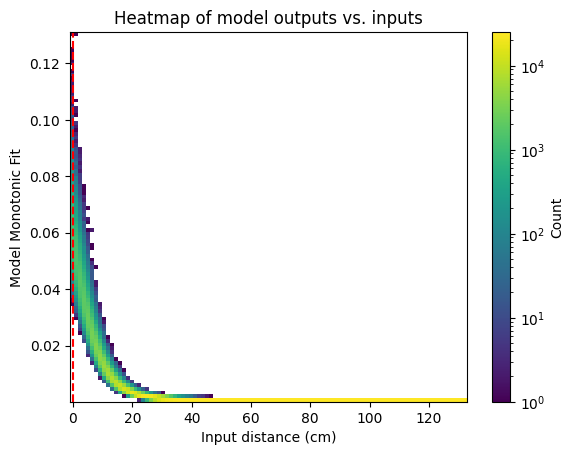

In [171]:
distance_input = tf.keras.Input(shape=(246,), name='distance_input')
x = student.get_layer("PMTDistance_Pattern_Response").get_layer('Radial_Reshape')(distance_input)
x = student.get_layer("PMTDistance_Pattern_Response").get_layer('Direct_batch_norm')(x)
x = student.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_dense_1')(x)
x = student.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_dense_2')(x)
x = student.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_dense_3')(x)
output = student.get_layer("PMTDistance_Pattern_Response").get_layer('Radial_Reshape2')(x)
output = student.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_norm')(output)
submodel = tf.keras.Model(distance_input, output)

# Generate random distance data in [0, 2*66.4] with shape (n_samples, 246)
n_samples = 10000
from matplotlib.colors import LogNorm
# Predict and flatten results
random_distances = np.random.uniform(-1, 2 * 66.4, size=(n_samples, 246)).astype(np.float32)
predictions      = submodel.predict(random_distances, batch_size=128)
all_outputs      = predictions.flatten()
all_inputs       = random_distances.flatten()

plt.figure()
# 2D heatmap: x = input distance, y = model output
hb = plt.hist2d(all_inputs,
                all_outputs,
                bins=(100, 100),norm=LogNorm())
plt.xlabel('Input distance (cm)')
plt.ylabel('Model Monotonic Fit')
plt.title('Heatmap of model outputs vs. inputs')
cb = plt.colorbar(hb[3])
cb.set_label('Count')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()


79/79 [==============================] - 0s 909us/step


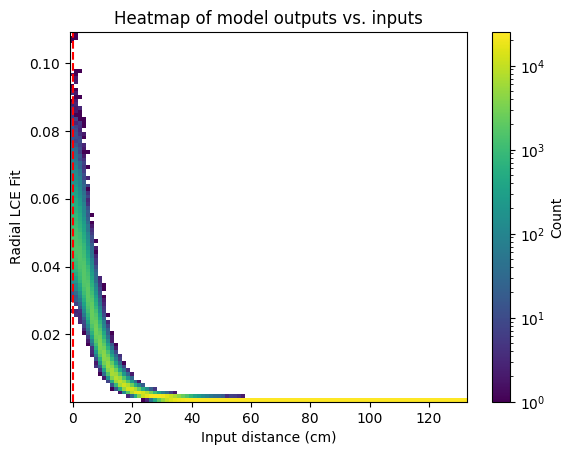

In [172]:
distance_input = tf.keras.Input(shape=(246,), name='distance_input')
output = teacher.get_layer("Radial_LCE").get_layer("radial_lce")(distance_input)
output = teacher.get_layer("Radial_LCE").get_layer("Normalization")(output)
submodel = tf.keras.Model(distance_input, output)

# Generate random distance data in [0, 2*66.4] with shape (n_samples, 246)
n_samples = 10000
from matplotlib.colors import LogNorm
# Predict and flatten results
random_distances = np.random.uniform(-1, 2 * 66.4, size=(n_samples, 246)).astype(np.float32)
predictions      = submodel.predict(random_distances, batch_size=128)
all_outputs      = predictions.flatten()
all_inputs       = random_distances.flatten()

plt.figure()
# 2D heatmap: x = input distance, y = model output
hb = plt.hist2d(all_inputs,
                all_outputs,
                bins=(100, 100),norm=LogNorm())
plt.xlabel('Input distance (cm)')
plt.ylabel('Radial LCE Fit')
plt.title('Heatmap of model outputs vs. inputs')
cb = plt.colorbar(hb[3])
cb.set_label('Count')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()


1/1 [==============================] - 0s 33ms/step


<Axes: title={'center': 'Teacher'}, xlabel='X position (cm)', ylabel='Y position (cm)'>

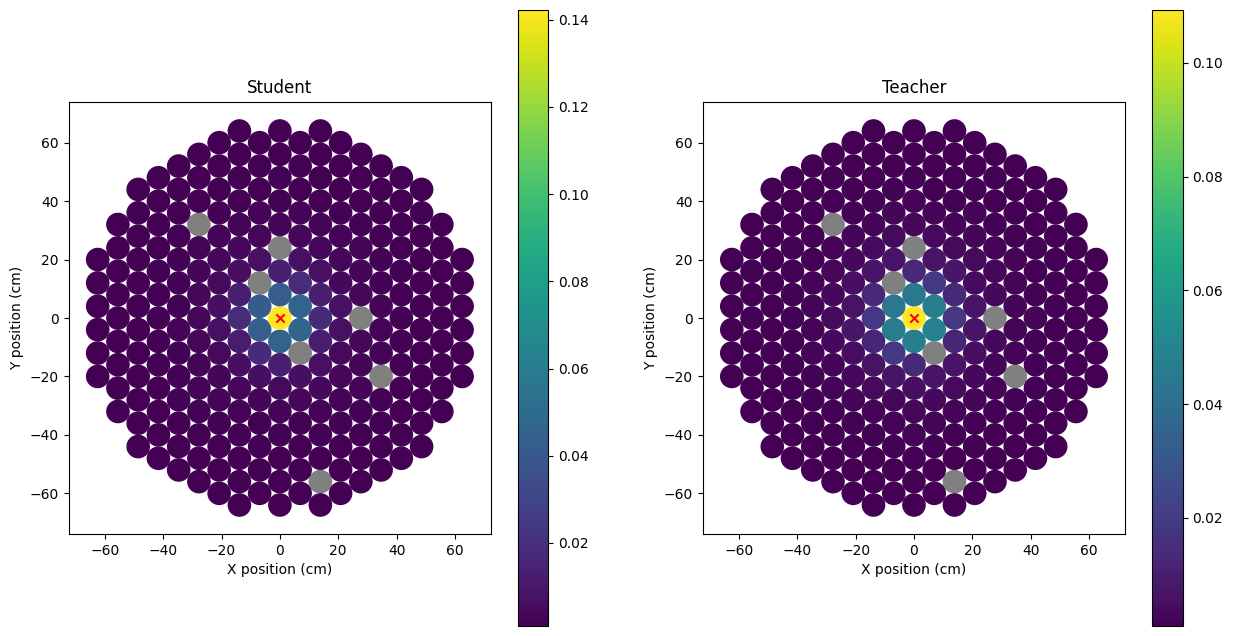

In [156]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))
coord = np.array([[0, 0]], dtype=np.float32)
ax = ax.flatten()
tmp = np.zeros(len(not_dead_pmts)+len(dead_pmts))
tmp[not_dead_pmts] = ts_model.student.predict([coord])[0]
plot_pmt_response(pmt_pos=pmt_pos_top, response=tmp, ax=ax[0], mark_spot=coord[0], dead_pmts=dead_pmts, title="Student")
tmp[not_dead_pmts] = teacher.predict([coord])[0]
plot_pmt_response(pmt_pos=pmt_pos_top, response=tmp, ax=ax[1], mark_spot=coord[0], dead_pmts=dead_pmts, title="Teacher")

In [183]:
test = gen_model(seed=0, starting_model=student, include_wall = False, include_perp = False, include_anode = False,multiplication_layers=True, radialLCE=False)
test.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
test.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
test.evaluate({'xy':pos[val_split], 'pattern':patterns[val_split]}, None, verbose=1)

16858/16858 [==============================] - 144s 9ms/step - loss: 1.6477


1.6477406024932861

In [ ]:
del test

In [15]:
"""
Didnt install lamb just did 
git clone https://github.com/tensorflow/addons.git
cd addons
git checkout v0.23.0

git clone https://github.com/agronholm/typeguard.git
cd typeguard
git checkout 2.10.0
"""

sys.path.insert(0, '/scratch/midway3/fsemler/typeguard')
sys.path.insert(1,'/scratch/midway3/fsemler/addons')

import tensorflow_addons as tfa

/scratch/midway3/fsemler/addons/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/scratch/midway3/fsemler/addons/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 


In [ ]:
"""TODO: Test Today
Poisson Loss
Pseudo MC Data

Training MonoDense on Radial LCE then refining on real data
Try training non Monotonic network and then training the monotonic components on their non-monotonic counterparts - Current 
"""

In [ ]:
# From pretraining on pseudo MC data
model_checkpoint_path = "/tmp/checkpoint"
c1 = keras.callbacks.ModelCheckpoint(model_checkpoint_path, 
                            save_best_only=True,
                            monitor='val_loss',
                            save_weights_only=True,
                            save_freq="epoch")
c2 = ReduceLRBacktrack( best_path=model_checkpoint_path, 
                        monitor="val_loss",
                        factor=0.2,
                        patience=3,
                        min_lr=1e-10,
                        verbose=1)


test = gen_model(seed=0, starting_model=test, 
                 include_wall = True, include_perp = True, include_anode = True, 
                 multiplication_layers=True, radialLCE=False, monodense=True)

test.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
load_weights_from_dict(test, os.path.join(model_path, "PseudoMCDatTrain.json"))

test.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.01))#keras.optimizers.AdamW(learning_rate=0.001))

test.fit(   {'xy':pos[train_split][::], 'pattern':patterns[train_split][::]},
            None,
            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),  
            epochs = 30, batch_size = 2**10, #  14
            callbacks=[c1, c2], verbose = 1)

Epoch 1 Begin learning rate = 0.010000
Epoch 1/30
1230/1230 [==============================] - 483s 388ms/step - loss: 2.8143 - val_loss: 2.9911 - lr: 0.0100
Epoch 2 Begin learning rate = 0.010000
Epoch 2/30
1230/1230 [==============================] - 477s 388ms/step - loss: 2.8347 - val_loss: 2.8065 - lr: 0.0100
Epoch 3 Begin learning rate = 0.010000
Epoch 3/30
1230/1230 [==============================] - 477s 388ms/step - loss: 2.8302 - val_loss: 3.0329 - lr: 0.0100
Epoch 4 Begin learning rate = 0.010000
Epoch 4/30
1230/1230 [==============================] - 480s 390ms/step - loss: 2.8157 - val_loss: 2.5565 - lr: 0.0100
Epoch 5 Begin learning rate = 0.010000
Epoch 5/30
1230/1230 [==============================] - 480s 391ms/step - loss: 2.7841 - val_loss: 2.9717 - lr: 0.0100
Epoch 6 Begin learning rate = 0.010000
Epoch 6/30
1230/1230 [==============================] - 476s 387ms/step - loss: 2.7583 - val_loss: 2.4980 - lr: 0.0100
Epoch 7 Begin learning rate = 0.010000
Epoch 7/30
12

In [202]:
test.load_weights(model_checkpoint_path)
test = gen_model(seed=0, starting_model=None, include_wall = False, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=False)
test = tf.keras.Model(inputs = test.get_layer("xy").input, outputs=test.get_layer("normalization").output)

test = gen_model(seed=0, starting_model=test, include_wall = False, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=False)
test.get_layer("LossLayer").set_call_mode("LUT_untrainable_std", return_ratio = True)
test.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001))
test.evaluate({'xy':pos[val_split], 'pattern':patterns[val_split]}, None, verbose=1)

16858/16858 [==============================] - 92s 5ms/step - loss: 17.8131


17.813077926635742

79/79 [==============================] - 1s 5ms/step


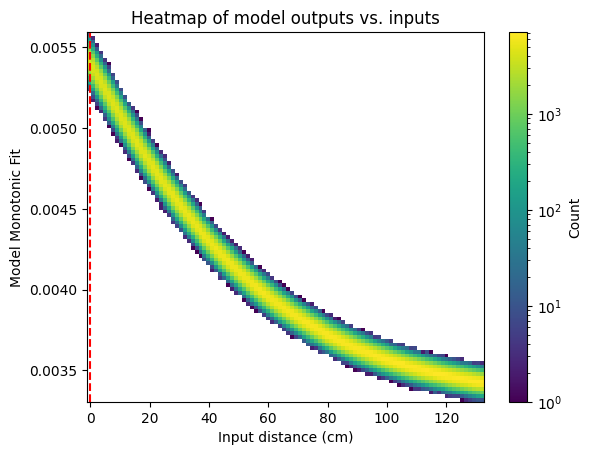

In [203]:
distance_input = tf.keras.Input(shape=(246,), name='distance_input')
x = test.get_layer("PMTDistance_Pattern_Response").get_layer('Radial_Reshape')(distance_input)
x = test.get_layer("PMTDistance_Pattern_Response").get_layer('Direct_batch_norm')(x)
x = test.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_dense_1')(x)
x = test.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_dense_2')(x)
x = test.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_dense_3')(x)
output = test.get_layer("PMTDistance_Pattern_Response").get_layer('Radial_Reshape2')(x)
output = test.get_layer("PMTDistance_Pattern_Response").get_layer('PMT_dist_norm')(output)
submodel = tf.keras.Model(distance_input, output)

# Generate random distance data in [0, 2*66.4] with shape (n_samples, 246)
n_samples = 10000
from matplotlib.colors import LogNorm
# Predict and flatten results
random_distances = np.random.uniform(-1, 2 * 66.4, size=(n_samples, 246)).astype(np.float32)
predictions      = submodel.predict(random_distances, batch_size=128)
all_outputs      = predictions.flatten()
all_inputs       = random_distances.flatten()

plt.figure()
# 2D heatmap: x = input distance, y = model output
hb = plt.hist2d(all_inputs,
                all_outputs,
                bins=(100, 100),norm=LogNorm())
plt.xlabel('Input distance (cm)')
plt.ylabel('Model Monotonic Fit')
plt.title('Heatmap of model outputs vs. inputs')
cb = plt.colorbar(hb[3])
cb.set_label('Count')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()


In [186]:
test = gen_model(seed=0, starting_model=student, include_wall = False, include_perp = False, include_anode = False,multiplication_layers=True, radialLCE=False)
test.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)

test.get_layer("i0").trainable=False

test.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.000001))
lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=2,
            min_lr=1e-10,
            verbose=1
        )
test.fit(x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                y = None,
                validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),
                epochs = 100, batch_size = 2**12, verbose = 1, callbacks=[lr])

Epoch 1/100
 79/308 [======>.......................] - ETA: 1:32 - loss: 1.6527

KeyboardInterrupt: 

In [29]:
# Eval on old data GCN
# Baseline 1.8193934 on MC 
cnn.evaluate( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)

4688/4688 [==============================] - 25s 5ms/step - loss: 1.7180


1.718044638633728

In [33]:
# Eval on new data CNF with old data CNN train
# Baseline 1.745227
biased_model = gen_mod_Shenayang()

bs = 2**10
# Train Model
biased_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
biased_model.load_weights(os.path.join(model_path,"biased_model_trained_var_trained_{identifier}.h5".format(identifier=0)), by_name=True, skip_mismatch=True)

biased_model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001))
biased_model.evaluate( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)

4688/4688 [==============================] - 23s 5ms/step - loss: 1.7049


1.7048567533493042

In [ ]:
# Lets try full model again with gcn start point on new data


In [106]:
bs = 2**10

base_model = gen_model(seed=0, starting_model=None, include_wall = False, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=False)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=10, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_r_test.json"))

Epoch 1/10
342/342 [==============================] - 10s 28ms/step - loss: 4.9516 - val_loss: 3.1173
Epoch 2/10
342/342 [==============================] - 10s 28ms/step - loss: 2.9389 - val_loss: 2.8112
Epoch 3/10
342/342 [==============================] - 10s 28ms/step - loss: 2.8829 - val_loss: 2.7997
Epoch 4/10
342/342 [==============================] - 9s 28ms/step - loss: 2.8425 - val_loss: 2.7597
Epoch 5/10
342/342 [==============================] - 9s 26ms/step - loss: 2.8126 - val_loss: 2.6960
Epoch 6/10
342/342 [==============================] - 9s 27ms/step - loss: 2.7874 - val_loss: 2.7194
Epoch 7/10
342/342 [==============================] - 10s 28ms/step - loss: 2.7700 - val_loss: 2.6923
Epoch 8/10
342/342 [==============================] - 10s 28ms/step - loss: 2.7594 - val_loss: 2.7103
Epoch 9/10
342/342 [==============================] - 9s 27ms/step - loss: 2.7534 - val_loss: 2.7192
Epoch 10/10
342/342 [==============================] - 9s 27ms/step - loss: 2.7507 - v

In [107]:
bs = 2**10

base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=False)

base_model.get_layer("PMTDistance_Pattern_Response").trainable=False

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=10, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_rw_test.json"))

Epoch 1/10
342/342 [==============================] - 14s 39ms/step - loss: 2.7271 - val_loss: 2.7320
Epoch 2/10
342/342 [==============================] - 14s 40ms/step - loss: 2.7215 - val_loss: 2.7141
Epoch 3/10
342/342 [==============================] - 14s 41ms/step - loss: 2.7163 - val_loss: 2.7239
Epoch 4/10
342/342 [==============================] - 13s 38ms/step - loss: 2.7111 - val_loss: 2.7168
Epoch 5/10
342/342 [==============================] - 13s 38ms/step - loss: 2.7079 - val_loss: 2.7060
Epoch 6/10
342/342 [==============================] - 13s 38ms/step - loss: 2.7079 - val_loss: 2.7079
Epoch 7/10
342/342 [==============================] - 13s 38ms/step - loss: 2.7079 - val_loss: 2.7116
Epoch 8/10
342/342 [==============================] - 14s 40ms/step - loss: 2.7080 - val_loss: 2.7094
Epoch 9/10
342/342 [==============================] - 14s 40ms/step - loss: 2.7079 - val_loss: 2.7138
Epoch 10/10
342/342 [==============================] - 14s 41ms/step - loss: 2.707

In [108]:
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
base_model.evaluate( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)

4688/4688 [==============================] - 18s 4ms/step - loss: 1.9641


1.9641075134277344

In [120]:
bs = 2**12
# Quick combined train

base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_rw_test.json"), silent=True)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=1, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_rw_test2.json"))

86/86 [==============================] - 23s 253ms/step - loss: 1.9798 - val_loss: 1.9406


In [145]:
bs = 2**12

base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_rw_test2.json"), silent=True)

base_model.get_layer("PMTDistance_Pattern_Response").trainable=False
base_model.get_layer("i0").trainable=False
base_model.get_layer("Wall_Reflection_Pattern_Response").trainable=False

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
subsample = 1
lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=2,
            min_lr=1e-9,
            verbose=1
        )
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=20, 
              batch_size=bs,  
              callbacks =[lr],
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_rwap_test.json"))

Epoch 1/20
86/86 [==============================] - 34s 381ms/step - loss: 3.5408 - val_loss: 1.9516 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - 32s 376ms/step - loss: 1.9693 - val_loss: 1.9669 - lr: 0.0010
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 1.9701
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
86/86 [==============================] - 32s 373ms/step - loss: 1.9701 - val_loss: 1.9691 - lr: 0.0010
Epoch 4/20
86/86 [==============================] - 32s 373ms/step - loss: 1.9698 - val_loss: 1.9665 - lr: 2.0000e-04
Epoch 5/20
86/86 [==============================] - ETA: 0s - loss: 1.9692
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
86/86 [==============================] - 32s 372ms/step - loss: 1.9692 - val_loss: 1.9703 - lr: 2.0000e-04
Epoch 6/20
86/86 [==============================] - 32s 370ms/step - loss: 1.9695 - val_loss: 1.9696 - lr: 4.0000e-05
Epoch 7/20
86/86 [====

KeyboardInterrupt: 

In [124]:
import tensorflow_addons as tfa

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and 

In [147]:
bs = 2**13

base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_rwap_test.json"), silent=True)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate =0.01)) # generate and init
subsample = 1
lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=2,
            min_lr=1e-9,
            verbose=1
        )
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=20, 
              batch_size=bs,  
              callbacks =[lr],
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_gcn_rwap_test2.json"))

Epoch 1/20
43/43 [==============================] - 48s 1s/step - loss: 13.6152 - val_loss: 1.8692 - lr: 0.0100
Epoch 2/20
43/43 [==============================] - 46s 1s/step - loss: 2.0722 - val_loss: 3.2775 - lr: 0.0100
Epoch 3/20
43/43 [==============================] - ETA: 0s - loss: 2.1112
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
43/43 [==============================] - 46s 1s/step - loss: 2.1112 - val_loss: 2.6154 - lr: 0.0100
Epoch 4/20
43/43 [==============================] - 46s 1s/step - loss: 2.0839 - val_loss: 2.0976 - lr: 0.0020
Epoch 5/20
43/43 [==============================] - ETA: 0s - loss: 2.0402
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
43/43 [==============================] - 45s 1s/step - loss: 2.0402 - val_loss: 1.9375 - lr: 0.0020
Epoch 6/20
43/43 [==============================] - 46s 1s/step - loss: 2.0070 - val_loss: 1.9970 - lr: 4.0000e-04
Epoch 7/20
43/43 [==============================]

KeyboardInterrupt: 

In [143]:
base_model.get_layer("PerpendicularWire_Pattern_Response").summary()

Model: "PerpendicularWire_Pattern_Response"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xy_3 (InputLayer)           [(None, 2)]               0         
                                                                 
 Perp_Parametrization (Perp  (None, 246, 1)            0         
 endicularWire_Parametrizat                                      
 ion)                                                            
                                                                 
 Perp_batch_norm (LayerNorm  (None, 246, 1)            2         
 alization)                                                      
                                                                 
 perp_dense_1 (MonoDense)    (None, 246, 16)           32        
                                                                 
 perp_dense_2 (MonoDense)    (None, 246, 16)           272       
                                

In [144]:
keras.Model(inputs = base_model.get_layer("PerpendicularWire_Pattern_Response").get_layer("Perp_batch_norm").input, outputs=base_model.get_layer("PerpendicularWire_Pattern_Response").get_layer("Perp_Reshape").output).predict([[[0]]*246])

1/1 [==============================] - 0s 102ms/step


array([[0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.225972  , 0.225972  ,
        0.225972  , 0.225972  , 0.225972  , 0.22

#### Misc Investigations

In [11]:
def make_mcMap_model_eval():
    input_x = tf.keras.layers.Input(shape=(2,), name='xy', dtype=tf.float32)
    class InferMC(tf.keras.layers.Layer):
        def build(self, input_shape):
            self.csys = tf.convert_to_tensor(csys, tf.float32)
            self.vmap = tf.convert_to_tensor(vmap, tf.float32)
            super().build(input_shape)
        
        def call(self, inputs):
            pos = inputs
            mc = knn_itp(self.csys, self.vmap, pos, 4)
            mc = mc / tf.reshape(tf.reduce_sum(mc, axis=1), (-1, 1))
            return mc

    x = InferMC(name='infer_mc')(input_x)
    input_pattern = tf.keras.layers.Input(shape=(n_alive_pmts,), name='pattern', dtype=tf.float32)
    # Construct it to use Guassian Approximation for now 
    loss_layer = LikelihoodRatio( n_pmts=n_alive_pmts, 
                            switching_signal=40, 
                            n_sigma=5, # Sigma range for Poisson and Binom sums
                            sigma_min = 0.05, # Minimum std
                            sigma_max = 1.0, # Maximum std
                            z=20, # Number of std steps
                            p_dpe=0.2, 
                            nan_safe=True, # replaces nan inputs with high loss
                            nan_safe_value = 1e5, 
                            m=5, # x & mu integer subdivisions
                            name="LossLayer")
    loss_layer.set_call_mode("LUT_untrainable_std", return_ratio = True)
    loss = loss_layer(x,input_pattern)
    model = keras.models.Model(inputs = [input_x, input_pattern], outputs = loss)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
    return model
def make_mcMap_model():
    input_x = tf.keras.layers.Input(shape=(2,), name='xy', dtype=tf.float32)
    class InferMC(tf.keras.layers.Layer):
        def build(self, input_shape):
            self.csys = tf.convert_to_tensor(csys, tf.float32)
            self.vmap = tf.convert_to_tensor(vmap, tf.float32)
            super().build(input_shape)
        
        def call(self, inputs):
            pos = inputs
            mc = knn_itp(self.csys, self.vmap, pos, 4)
            mc = mc / tf.reshape(tf.reduce_sum(mc, axis=1), (-1, 1))
            return mc

    x = InferMC(name='infer_mc')(input_x)
    model = keras.models.Model(inputs = input_x, outputs = x)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
    return model

In [ ]:
# Quick Check Poisson 
mc_pred = make_mcMap_model().predict(pos[val_split], batch_size = 2**10)
observed = np.clip(patterns[val_split], 1e-10, None)
mc_pred = np.clip(mc_pred, 1e-10, None) * np.sum(observed, axis = -1, keepdims= True)
# Poisson likelihood ratio (without constants that cancel out)
llr = 2 * (mc_pred - observed + observed * np.log(np.clip(observed / mc_pred, 1e-10, None)))

# If you want the total LLR per event:
np.mean(llr)

3.3901742

In [34]:
loss =make_mcMap_model_eval().predict( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)
np.nanmean(loss)

4688/4688 [==============================] - 25s 5ms/step


1.745227

Text(0.5, 1.0, 'MLP Pos - Old Dataa')

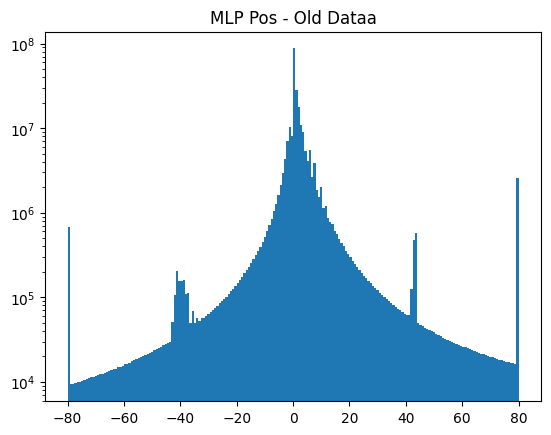

In [93]:
plt.hist(loss[loss!=1e5], bins =200)
plt.yscale('log')
plt.title("MLP Pos - Old Dataa")

In [16]:
# Using the pretrained radial LCE with some finetuning dont think I0 is loaded for example 
rLCE_Model = gen_model(seed = 0, starting_model= None, radialLCE=True)
rLCE_Model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
rLCE_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
rLCE_Model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                    y = None,
                    validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                    epochs = 2, batch_size = 2**12,
                    verbose = 1)
rLCE_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001))
rLCE_Model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                    y = None,
                    validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                    epochs = 2, batch_size = 2**12,
                    verbose = 1)

rLCE_Model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
rLCE_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
rLCE_Model.evaluate( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)

Epoch 1/2
308/308 [==============================] - 61s 195ms/step - loss: 3.5282 - val_loss: 2.8850
Epoch 2/2
308/308 [==============================] - 59s 191ms/step - loss: 2.8882 - val_loss: 2.8880
Epoch 1/2
308/308 [==============================] - 61s 196ms/step - loss: 2.8914 - val_loss: 2.8954
Epoch 2/2
16858/16858 [==============================] - 37s 2ms/step - loss: 2.3007


2.3006865978240967

In [17]:
# Using the pretrained radial LCE with some finetuning dont think I0 is loaded for example 
rLCE_Model = gen_model(seed = 0, starting_model= None, radialLCE=False)
rLCE_Model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
rLCE_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
rLCE_Model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                    y = None,
                    validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                    epochs = 2, batch_size = 2**12,
                    verbose = 1)
rLCE_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001))
rLCE_Model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                    y = None,
                    validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                    epochs = 2, batch_size = 2**12,
                    verbose = 1)

rLCE_Model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
rLCE_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
rLCE_Model.evaluate( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)

Epoch 1/2
308/308 [==============================] - 163s 522ms/step - loss: 4.9910 - val_loss: 3.2129
Epoch 2/2
308/308 [==============================] - 160s 520ms/step - loss: 2.8717 - val_loss: 2.8276
Epoch 1/2
308/308 [==============================] - 163s 525ms/step - loss: 2.8433 - val_loss: 2.8267
Epoch 2/2
16858/16858 [==============================] - 64s 4ms/step - loss: 2.2248


2.224811553955078

#### Actual Training

Start with Wall and Direct

Make wall and direct untraainable train anode and perp

Make Anode and Perp trainable train together

Strong difference between loss in central vs outer regions - Refit central first, then outer, then combined

Pos refit 

Etc

In [9]:
class NormalizationLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def build(self, input_shape):
        super().build(input_shape)
    def call(self, X):
        # Model likes to figure out that if it goes negative most loss funcs break
        # Add minimal number of last dimension if any is < 0
        cond = tf.reduce_any(X < 0, axis=-1, keepdims=True)            # shape (...,1)
        row_min = tf.reduce_min(X, axis=-1, keepdims=True)             # shape (...,1)
        X = tf.where(cond,
                    X+ row_min,
                    X
                    )
        X /= (keras.backend.reshape(tf.maximum(keras.backend.sum(X, axis=1), 1e-7), (-1, 1)))
        return X
    def compute_output_shape(self, input_shape):
        return input_shape
    ### Serialization
    def get_config(self):
        config = super().get_config()
        return config
    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [47]:
"""Lets try training on MC fully
First rad aand wall 
then aanode and perp
Then we can use rad waall from data and perp node from MC

"""
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=False)
student = keras.models.Model(inputs=base_model.get_layer("xy").input, outputs=base_model.get_layer("normalization").output)
teacher = make_mcMap_model()
# Train on teacher
ts_model = TeacherStudentModel(teacher, student)
def cosine_similarity(y_true, y_pred):
    # y_true: teacher outputs, y_pred: student outputs
    # We flip the sign so that a higher cosine similarity results in a lower loss.
    return -tf.reduce_mean(tf.keras.losses.cosine_similarity(y_true, y_pred))

n_points = 250_000
theta = 2 * np.pi * np.random.rand(n_points)
r = np.sqrt(np.random.rand(n_points)) * 66.4
X_dummy = np.column_stack((r * np.cos(theta), r * np.sin(theta)))  # Dummy input data

ts_model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.01), distillation_loss=cosine_similarity)
ts_model.fit(tf.data.Dataset.from_tensor_slices(X_dummy).batch(1024), 
             epochs=100,
             # Reduce lr
             callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=4, min_lr=1e-6)])

Epoch 1/100
245/245 [==============================] - 21s 81ms/step - loss: -0.2565 - lr: 0.0100
Epoch 2/100
245/245 [==============================] - 20s 81ms/step - loss: -0.2792 - lr: 0.0100
Epoch 3/100
245/245 [==============================] - 20s 81ms/step - loss: -0.2814 - lr: 0.0100
Epoch 4/100
245/245 [==============================] - 20s 83ms/step - loss: -0.2818 - lr: 0.0100
Epoch 5/100
245/245 [==============================] - 20s 80ms/step - loss: -0.2819 - lr: 0.0100
Epoch 6/100
245/245 [==============================] - 20s 80ms/step - loss: -0.2820 - lr: 0.0100
Epoch 7/100
245/245 [==============================] - 20s 80ms/step - loss: -0.2820 - lr: 0.0100
Epoch 8/100
245/245 [==============================] - 20s 80ms/step - loss: -0.2821 - lr: 0.0100
Epoch 9/100
245/245 [==============================] - 20s 80ms/step - loss: -0.2821 - lr: 0.0100
Epoch 10/100
146/245 [================>.............] - ETA: 8s - loss: -0.2824

KeyboardInterrupt: 

In [ ]:
base_model = gen_model(seed=0, starting_model=student, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)
student2 = keras.models.Model(inputs=base_model.get_layer("xy").input, outputs=base_model.get_layer("normalization").output)
# Train on teacher
ts_model = TeacherStudentModel(teacher, student2)
def cosine_similarity(y_true, y_pred):
    # y_true: teacher outputs, y_pred: student outputs
    # We flip the sign so that a higher cosine similarity results in a lower loss.
    return -tf.reduce_mean(tf.keras.losses.cosine_similarity(y_true, y_pred))

n_points = 250_000
theta = 2 * np.pi * np.random.rand(n_points)
r = np.sqrt(np.random.rand(n_points)) * 66.4
X_dummy = np.column_stack((r * np.cos(theta), r * np.sin(theta)))  # Dummy input data

ts_model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.01), distillation_loss=cosine_similarity)
ts_model.fit(tf.data.Dataset.from_tensor_slices(X_dummy).batch(1024), 
             epochs=100,
             # Reduce lr
             callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=4, min_lr=1e-6)])

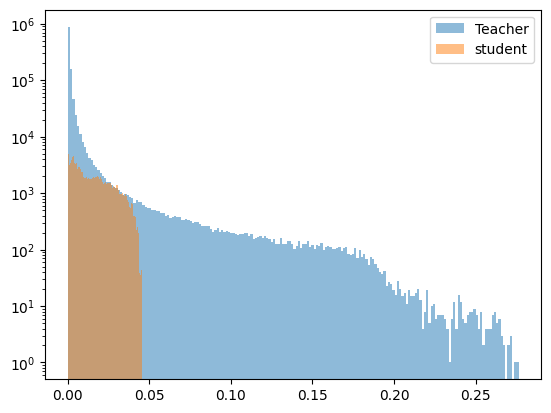

In [43]:
plt.hist(teacher(X_dummy[:5000]).numpy().flatten(), bins=200, alpha=0.5, label='Teacher')
plt.hist(student(X_dummy[:5000]).numpy().flatten(), bins=200, alpha=0.5, label='student')
plt.hist(student(X_dummy[:5000]).numpy().flatten(), bins=200, alpha=0.5, label='student2')
plt.yscale('log')   
plt.legend()

In [116]:
"""
Didnt install lamb just did 
git clone https://github.com/tensorflow/addons.git
cd addons
git checkout v0.23.0

git clone https://github.com/agronholm/typeguard.git
cd typeguard
git checkout 2.10.0
"""

sys.path.insert(0, '/scratch/midway3/fsemler/typeguard')
sys.path.insert(1,'/scratch/midway3/fsemler/addons')

In [9]:
import tensorflow_addons as tfa

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [17]:
"""
Lets try original Plan again
"""
bs = 2**10

base_model = gen_model(seed=0, starting_model=None, include_wall = False, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
subsample = 4
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=20, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_r1.json"))

Epoch 1/20
308/308 [==============================] - 16s 48ms/step - loss: 5.1601 - val_loss: 3.1656
Epoch 2/20
308/308 [==============================] - 15s 48ms/step - loss: 2.9235 - val_loss: 2.8623
Epoch 3/20
308/308 [==============================] - 16s 51ms/step - loss: 2.8786 - val_loss: 2.7906
Epoch 4/20
308/308 [==============================] - 12s 40ms/step - loss: 2.8507 - val_loss: 2.7415
Epoch 5/20
308/308 [==============================] - 14s 46ms/step - loss: 2.8314 - val_loss: 2.7134
Epoch 6/20
308/308 [==============================] - 13s 42ms/step - loss: 2.8166 - val_loss: 2.7074
Epoch 7/20
308/308 [==============================] - 14s 46ms/step - loss: 2.8031 - val_loss: 2.7405
Epoch 8/20
308/308 [==============================] - 14s 45ms/step - loss: 2.7911 - val_loss: 2.7633
Epoch 9/20
308/308 [==============================] - 14s 47ms/step - loss: 2.7813 - val_loss: 2.7119
Epoch 10/20
308/308 [==============================] - 15s 47ms/step - loss: 2.769

In [25]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_r1.json"), silent=True)

base_model.get_layer("PMTDistance_Pattern_Response").trainable = False

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=10, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_rw1.json"))

Epoch 1/10
1230/1230 [==============================] - 47s 37ms/step - loss: 2.7270 - val_loss: 2.7138
Epoch 2/10
1230/1230 [==============================] - 45s 37ms/step - loss: 2.7173 - val_loss: 2.7107
Epoch 3/10
1230/1230 [==============================] - 46s 37ms/step - loss: 2.7171 - val_loss: 2.7095
Epoch 4/10
1230/1230 [==============================] - 46s 37ms/step - loss: 2.7171 - val_loss: 2.7128
Epoch 5/10
1230/1230 [==============================] - 45s 37ms/step - loss: 2.7172 - val_loss: 2.7174
Epoch 6/10
1230/1230 [==============================] - 45s 37ms/step - loss: 2.7171 - val_loss: 2.7257
Epoch 7/10
1230/1230 [==============================] - 45s 37ms/step - loss: 2.7171 - val_loss: 2.7078
Epoch 8/10
1230/1230 [==============================] - 45s 37ms/step - loss: 2.7171 - val_loss: 2.7235
Epoch 9/10
1230/1230 [==============================] - 46s 37ms/step - loss: 2.7171 - val_loss: 2.7169
Epoch 10/10
1230/1230 [==============================] - 46s 37m

In [36]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rw1.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
base_model.evaluate({'xy':pos[val_split], 'pattern':patterns[val_split]},)
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)

39334/39334 [==============================] - 160s 4ms/step - loss: 1.9594


1.9594181776046753

In [31]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rw1.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
subsample = 4
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=10, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_rw2.json"))

Epoch 1/10
308/308 [==============================] - 24s 74ms/step - loss: 2.7646 - val_loss: 2.6787
Epoch 2/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7528 - val_loss: 2.6768
Epoch 3/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7499 - val_loss: 2.6735
Epoch 4/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7480 - val_loss: 2.6708
Epoch 5/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7457 - val_loss: 2.6721
Epoch 6/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7439 - val_loss: 2.6684
Epoch 7/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7415 - val_loss: 2.6688
Epoch 8/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7418 - val_loss: 2.6709
Epoch 9/10
308/308 [==============================] - 22s 73ms/step - loss: 2.7420 - val_loss: 2.6705
Epoch 10/10
308/308 [==============================] - 22s 73ms/step - loss: 2.741

In [35]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rw2.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
base_model.evaluate({'xy':pos[val_split], 'pattern':patterns[val_split]},)
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)

39334/39334 [==============================] - 148s 4ms/step - loss: 1.8580


1.857951283454895

In [87]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rw2.json"))
layers = [i.name for i in base_model.layers]

base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)
# Make everything up until now untrainable
for i in layers:
    base_model.get_layer(i).trainable = False

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.0001)) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=10, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_rwap.json"))

Epoch 1/10
1230/1230 [==============================] - 102s 81ms/step - loss: 2.6672 - val_loss: 2.6649
Epoch 2/10
1230/1230 [==============================] - 99s 81ms/step - loss: 2.6666 - val_loss: 2.6642
Epoch 3/10
1230/1230 [==============================] - 98s 80ms/step - loss: 2.6659 - val_loss: 2.6635
Epoch 4/10
1230/1230 [==============================] - 99s 80ms/step - loss: 2.6651 - val_loss: 2.6628
Epoch 5/10
1230/1230 [==============================] - 99s 80ms/step - loss: 2.6648 - val_loss: 2.6628
Epoch 6/10
1230/1230 [==============================] - 99s 81ms/step - loss: 2.6648 - val_loss: 2.6628
Epoch 7/10
1230/1230 [==============================] - 99s 81ms/step - loss: 2.6648 - val_loss: 2.6628
Epoch 8/10
1230/1230 [==============================] - 100s 81ms/step - loss: 2.6648 - val_loss: 2.6628
Epoch 9/10
1230/1230 [==============================] - 99s 80ms/step - loss: 2.6648 - val_loss: 2.6628
Epoch 10/10
1230/1230 [==============================] - 99s 8

In [89]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rwap.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
base_model.evaluate({'xy':pos[val_split], 'pattern':patterns[val_split]},)
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)

39334/39334 [==============================] - 206s 5ms/step - loss: 1.8580


1.857951283454895

In [20]:
# Quick check of < 50 events
bmap = np.linalg.norm(pos, axis =-1) <= 30
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rw2.json"))
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.0001)) # generate and init
base_model.evaluate({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]},)

4255/4255 [==============================] - 27s 6ms/step - loss: 1.9434


1.9434210062026978

In [30]:
import tensorflow_addons as tfa

/opt/XENONnT/anaconda/envs/XENONnT_el9.2024.10.4/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [33]:
base_model = gen_model(seed=0, starting_model=None, include_wall = False, include_perp = True, include_anode = True, multiplication_layers=False, radialLCE=False)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate = 0.001)) # generate and init

bmap = np.linalg.norm(pos, axis =-1) <= 30

bs = 2**10
base_model.fit({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]}, 
              epochs=5, 
              batch_size=bs,  
              callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)],
              validation_data = ({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]}), verbose=1)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.001)) # generate and init
base_model.fit({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]}, 
              epochs=100, 
              batch_size=bs,  
              callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)],
              validation_data = ({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]}), verbose=1)

save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_rc.json"))


Epoch 1/5
309/309 [==============================] - 27s 81ms/step - loss: 6.9032 - val_loss: 3.7396 - lr: 0.0010
Epoch 2/5
309/309 [==============================] - 25s 80ms/step - loss: 3.5168 - val_loss: 3.2991 - lr: 0.0010
Epoch 3/5
309/309 [==============================] - 24s 79ms/step - loss: 3.3028 - val_loss: 3.2438 - lr: 0.0010
Epoch 4/5
309/309 [==============================] - 25s 82ms/step - loss: 3.2696 - val_loss: 3.2186 - lr: 0.0010
Epoch 5/5
309/309 [==============================] - 25s 81ms/step - loss: 3.2519 - val_loss: 3.2054 - lr: 0.0010
Epoch 1/100
309/309 [==============================] - 27s 81ms/step - loss: 3.2454 - val_loss: 3.2062 - lr: 0.0010
Epoch 2/100
309/309 [==============================] - 25s 79ms/step - loss: 3.3217 - val_loss: 3.3495 - lr: 0.0010
Epoch 3/100
309/309 [==============================] - 25s 80ms/step - loss: 3.4759 - val_loss: 3.6222 - lr: 0.0010
Epoch 4/100
309/309 [==============================] - 25s 81ms/step - loss: 3.662

KeyboardInterrupt: 

In [ ]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rwc.json"))
layers = [i.name for i in base_model.layers]
# Make everything up until now untrainable
base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)

bmap = np.linalg.norm(pos, axis =-1) <= 30

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.0001)) # generate and init
subsample = 4
bs = 2**10

base_model.fit({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]}, 
              epochs=10, 
              batch_size=bs,  
              callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, min_lr=1e-6)],
              validation_data = ({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_rwapc.json"))

Epoch 1/10
130/309 [===========>..................] - ETA: 16s - loss: 9.8166

KeyboardInterrupt: 

In [ ]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rwapc.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)

39334/39334 [==============================] - 206s 5ms/step - loss: 1.8580


TOdo: Need to find a way to reasonably train the anode component

Could try the above routine again but aallowing I0 to be varied

Very interesting in training the likelihood incrased by chi squared was unchanged

In [ ]:
# Retrain the whole thing at once
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rwap.json"))

base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)

opt = tfa.optimizers.LAMB(learning_rate = 0.00001)
base_model.compile(optimizer=opt) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=10, 
              batch_size=2**10,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_rwap2.json"))

In [59]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = True, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rwa2.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
base_model.evaluate({'xy':pos[val_split], 'pattern':patterns[val_split]},)
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)

10373/16858 [=================>............] - ETA: 26s - loss: 1.8967

KeyboardInterrupt: 

In [ ]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rwap1.json"))
layers = [i.name for i in base_model.layers]

base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=False, radialLCE=False)


base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=20, 
              batch_size=bs,  
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_rwa2.json"))

In [57]:
new_pos = do_grid_search(pos, patterns, base_model, min_resolution=min_resolution)
np.save(os.path.join(pos_refit_path, "grid_search_pos.npy"), new_pos)

56191/56191 [==============================] - 377s 7ms/step
Resolution 1.0 : Factor 0
56191/56191 [==============================] - 376s 7ms/step
Resolution 0.5 : Factor 1
56191/56191 [==============================] - 375s 7ms/step
Resolution 0.25 : Factor 2
56191/56191 [==============================] - 349s 6ms/step
Resolution 0.125 : Factor 3
56191/56191 [==============================] - 338s 6ms/step
Resolution 0.0625 : Factor 4
56191/56191 [==============================] - 356s 6ms/step
Resolution 0.03125 : Factor 5
56191/56191 [==============================] - 376s 7ms/step
Resolution 0.015625 : Factor 6
56191/56191 [==============================] - 515s 9ms/step


In [58]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=False, radialLCE=False)
base_model = load_weights_from_dict(base_model, os.path.join(model_path,"train_in_parts_rwa2.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.00001)) # generate and init
base_model.evaluate({'xy':new_pos[val_split], 'pattern':patterns[val_split]},)
base_model.evaluate({'xy':new_pos[train_split], 'pattern':patterns[train_split]},)

39334/39334 [==============================] - 269s 7ms/step - loss: 1.7960


1.7959767580032349

In [149]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)


# exponential (step) decay: every decay_steps epochs multiply by decay_rate
initial_lr = 0.001
bs = 2**10
decay_epochs = 1
wait_epochs =1
decay_rate = 0.5
steps_per_epoch = math.ceil(len(train_split)/ (2**12))

class DelayedDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, base_schedule, steps_per_epoch, initial_lr):
        self.base = base_schedule # Schedule to apply after delay
        self.delay = steps_per_epoch # Epochs to wait
        self.initial = initial_lr 

    def __call__(self, step):
        # before first epoch ends → return initial_lr
        return tf.cond(
            step < self.delay,
            lambda: tf.constant(self.initial, dtype=tf.float32),
            lambda: self.base(step - self.delay)
        )
schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_epochs*steps_per_epoch,
    decay_rate=decay_rate,
    staircase=True 
)

# Just to restore the best weights
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,            
    restore_best_weights=True
)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate =0.001)) # generate and init
subsample = 4
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=20, 
              batch_size=bs,  
              callbacks=[es],
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_with_AdamW_1.json"))

print("Loss 1:")
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate = 0.0001)) # generate and init
base_model.evaluate( x = {'xy':pos, 'pattern':patterns},)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate = 0.0001)) # generate and init
subsample = 2
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=15, 
              batch_size=bs,  
              callbacks=[es],
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_with_AdamW_2.json"))

print("Loss 2:")
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate = 0.00001)) # generate and init
base_model.evaluate( x = {'xy':pos, 'pattern':patterns},)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate = 0.00001)) # generate and init
subsample = 1
base_model.fit({'xy':pos[train_split][::subsample], 'pattern':patterns[train_split][::subsample]}, 
              epochs=10, 
              batch_size=bs,  
              callbacks=[es],
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_with_AdamW_3.json"))

print("Loss 3:")
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate = 0.000001)) # generate and init
base_model.evaluate( x = {'xy':pos, 'pattern':patterns},)

"""
Shuffle Seed 68268
With split = 0.5
And model seed  = 0

Testing some optimizers after I couldnt replicate my best model -> Best model saved as: /scratch/midway3/fsemler/models/best_model_all_parts.json

    Only Direct Detection Component

Adadelta Optimizer
Radial LCE First Epoch 2.7724, 3.0007; Second 2.9996, 2.9943
MonoDenseDirect First >10 throughout

Adam Optimizer
Radial LCE First 3.8349, 2.8710, Second: 2.8779, 2.846
MonoDenseDirect First 5.8247, 3.8141; Second 2.8955, 2.9401

AdamW Optimizer
Radial LCE First 3.8332, 2.8704; Second: 2.8775, 2.8940
MonoDenseDirect First 5.8254, 3.8131; Second: 2.8953, 2.9399

RMSProp Optimizer
Radial LCE First 22.9392, 23.5858; Second 23.5829, 23.5858
MonoDenseDirect First 5.2024, 3.2020; Second 2.7741, 2.8413

Lamb optimizer
RLCE: Fails entirely (Error in loss function - happens when predictions are way out of whack - trust scaling on full weight vector would need to reshape to 5,1 for LAMB to behave)
MoDe: 10.4568, 10.1622; 10.1623, 10.4603

    Direct and Wall Optimizer
Considering AdamW, Adam and RMSprop for MonoDense only

AdamW Optimizer
RLCE: 3.7711, 2.8818; 2.8821, 2.8817
MoDe: 5.7796, 3.7746; 2.8971, 2.9464 <- Discrepancy here wrt rLCE is why i dont want to use adam (rlce generally better than MoDe)

Adam Optimizer
RLCE: 3.7710, 2.8823; 2.8825, 2.8822
MoDe: 5.7781, 3.7797; 2.8974, 2.9469

RMSprop Optimizer
RLCE: 23.0754, 23.5938; 23.5909, 23.5938
MoDe: 5.1644, 3.2868; 2.9684, 2.9485

Lamb optimizer (lr=0.01)
RLCE: Doesnt work -> Vector in RLCE trust is bad
MoDe: 8.6388, 6.2175; 3.2375, 3.3030

AdamW seems to be ideal for quick
Lamb seems to be better for full model does take longer so lets try both on the full model

Increased Lamb lr as Lamb performs better that way 

Adam full model best achieved (10 epoch lr =0.001) 2.8089, 2.7727 (-log likelihood) ~ Chi^2 of 2

"""

Loss 1:
56191/56191 [==============================] - 502s 9ms/step - loss: 2.1439
Epoch 1/15
615/615 [==============================] - 326s 522ms/step - loss: 2.9306 - val_loss: 2.8850
Epoch 2/15
615/615 [==============================] - 319s 519ms/step - loss: 2.9330 - val_loss: 2.8559
Epoch 3/15
615/615 [==============================] - 319s 519ms/step - loss: 2.9254 - val_loss: 2.8879
Epoch 4/15
615/615 [==============================] - 320s 520ms/step - loss: 2.9193 - val_loss: 2.8602
Epoch 5/15
615/615 [==============================] - 317s 516ms/step - loss: 2.9105 - val_loss: 2.8618
Epoch 6/15
615/615 [==============================] - 316s 514ms/step - loss: 2.9021 - val_loss: 2.8811
Epoch 7/15
615/615 [==============================] - 316s 513ms/step - loss: 2.8942 - val_loss: 2.8229
Epoch 8/15
615/615 [==============================] - 315s 512ms/step - loss: 2.8852 - val_loss: 2.8312
Epoch 9/15
615/615 [==============================] - 315s 512ms/step - loss: 2.8794

KeyboardInterrupt: 

In [140]:
import math
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)

# exponential (step) decay: every decay_steps epochs multiply by decay_rate
initial_lr = 0.01
bs = 2**10
decay_epochs = 4
wait_epochs =1
decay_rate = 0.25
steps_per_epoch = math.ceil(len(train_split)/ (2**12))

class DelayedDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, base_schedule, steps_per_epoch, initial_lr):
        self.base = base_schedule # Schedule to apply after delay
        self.delay = steps_per_epoch # Epochs to wait
        self.initial = initial_lr 

    def __call__(self, step):
        # before first epoch ends → return initial_lr
        return tf.cond(
            step < self.delay,
            lambda: tf.constant(self.initial, dtype=tf.float32),
            lambda: self.base(step - self.delay)
        )
schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_epochs*steps_per_epoch,
    decay_rate=decay_rate,
    staircase=True 
)

# Just to restore the best weights
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25, # Dont want this to actually trigger            
    restore_best_weights=True
)
#DelayedDecay(schedule, wait_epochs*steps_per_epoch, initial_lr=initial_lr))
base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.01)) # generate and init

base_model.fit({'xy':pos[train_split], 'pattern':patterns[train_split]}, 
              epochs=10, 
              batch_size=bs,  
              callbacks=[es],
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_with_LAMB.json"))


"""

neg log likelihood 
best on epoch 3 loss: 2.7714 - val_loss: 2.5202
on end loss: 2.8052 - val_loss: 2.8051 with chi 2.1771931648254395
"""

# lr = initial_learning_rate * [decay_rate]^(max(Epoch-1,0)/decay_epochs)

Epoch 1/10
 186/1230 [===>..........................] - ETA: 6:25 - loss: 15.4553

KeyboardInterrupt: 

In [ ]:
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)

base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.01)) # generate and init
base_model.evaluate( x = {'xy':pos[val_split], 'pattern':patterns[val_split]},)

56191/56191 [==============================] - 255s 5ms/step - loss: 2.1772


2.1771931648254395

In [37]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=False)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)

# exponential (step) decay: every decay_steps epochs multiply by decay_rate
schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=2,
    decay_rate=0.1,
    staircase=True  # makes it drop in discrete steps
)

base_model.compile(optimizer=tfa.optimizers.LAMB(learning_rate = 0.001)) # generate and init

reduce_lr = ReduceLROnPlateau( # 10 drops to reach approx minimum lr so 21 epochs min 
    monitor="val_loss",
    factor=0.1,
    patience=1,
    min_lr=1e-6,
)



base_model.fit({'xy':pos[train_split], 'pattern':patterns[train_split]}, 
              epochs=25, 
              batch_size=2**12,  
              callbacks=[],
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_with_LAMB.json"))

Epoch 1/25
308/308 [==============================] - 155s 496ms/step - loss: 9.7043 - val_loss: 9.3649
Epoch 2/25
308/308 [==============================] - 152s 494ms/step - loss: 9.6257 - val_loss: 9.6523
Epoch 3/25
308/308 [==============================] - 152s 495ms/step - loss: 9.4878 - val_loss: 9.3224
Epoch 4/25
308/308 [==============================] - 152s 495ms/step - loss: 9.1315 - val_loss: 8.9245
Epoch 5/25
308/308 [==============================] - 153s 497ms/step - loss: 8.6728 - val_loss: 8.3885
Epoch 6/25
308/308 [==============================] - 152s 493ms/step - loss: 8.0111 - val_loss: 7.5604
Epoch 7/25
308/308 [==============================] - 153s 495ms/step - loss: 6.8393 - val_loss: 6.4805
Epoch 8/25
308/308 [==============================] - 153s 497ms/step - loss: 7.6188 - val_loss: 7.5684
Epoch 9/25
123/308 [==========>...................] - ETA: 1:18 - loss: 7.1437

KeyboardInterrupt: 

In [44]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=True)
with open(os.path.join(model_path,"train_in_parts_radLCE_wall_1.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)
base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)

base_model.get_layer('Radial_LCE').trainable = False # PMTDistance_Pattern_Response
base_model.get_layer('Wall_Reflection_Pattern_Response').trainable = False
base_model.get_layer('AddReflectionContribution').trainable = False
base_model.get_layer('i0').trainable = False

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=keras.optimizers.AdamW())

base_model.fit({'xy':pos[train_split], 'pattern':patterns[train_split]}, 
              epochs=10, # Doesnt do anything 
              batch_size=2**12, 
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_radLCE_full_1.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1))
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)
# MC is 1.67

Epoch 1/10
 20/220 [=>............................] - ETA: 2:53 - loss: 2.4040

KeyboardInterrupt: 

In [ ]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=True)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_1.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)
base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=keras.optimizers.Adadelta())

base_model.fit({'xy':pos[train_split], 'pattern':patterns[train_split]}, 
              epochs=20, # Doesnt do anything 
              batch_size=2**12, 
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_radLCE_full_2.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1))
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)
# MC is 1.67

Epoch 1/3
308/308 [==============================] - 360s 1s/step - loss: 2.5015 - val_loss: 2.5024
Epoch 2/3
308/308 [==============================] - 360s 1s/step - loss: 2.5015 - val_loss: 2.5024
Epoch 3/3
39334/39334 [==============================] - 295s 7ms/step - loss: 1.5542


1.5541653633117676

In [51]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = False, multiplication_layers=True, radialLCE=True)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_3.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1))

bmap = np.linalg.norm(pos, axis = -1) < 50


print("R>50")
base_model.evaluate({'xy':pos[train_split][~bmap[train_split]], 'pattern':patterns[train_split][~bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][~bmap[val_split]], 'pattern':patterns[val_split][~bmap[val_split]]},)
print("R<50")
base_model.evaluate({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]},)

R>50
4980/4980 [==============================] - 23s 5ms/step - loss: 1.3937
R<50
11878/11878 [==============================] - 55s 5ms/step - loss: 1.6221


1.6220840215682983

#### Interlude Train on specific Areas only

Did not work 

In [54]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = True, multiplication_layers=True, radialLCE=True)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_3.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)
base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=keras.optimizers.Adadelta())

base_model.fit({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]}, 
              epochs=3, # Doesnt do anything 
              batch_size=2**12, 
              validation_data = ({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_radLCE_full_central_refine.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1))
print("R>50")
base_model.evaluate({'xy':pos[train_split][~bmap[train_split]], 'pattern':patterns[train_split][~bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][~bmap[val_split]], 'pattern':patterns[val_split][~bmap[val_split]]},)
print("R<50 - Refined on this")
base_model.evaluate({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]},)
# MC is 1.67

Epoch 1/3
217/217 [==============================] - 304s 1s/step - loss: 3.0293 - val_loss: 3.1003
Epoch 2/3
217/217 [==============================] - 300s 1s/step - loss: 3.0964 - val_loss: 3.0872
Epoch 3/3
217/217 [==============================] - 299s 1s/step - loss: 3.0907 - val_loss: 3.0823
R>50
4980/4980 [==============================] - 37s 7ms/step - loss: 2.4540
R<50 - Refined on this
11878/11878 [==============================] - 89s 8ms/step - loss: 2.4243


2.424281358718872

In [55]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = True, multiplication_layers=True, radialLCE=True)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_central_refine.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)
base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=keras.optimizers.Adadelta())

base_model.fit({'xy':pos[train_split][~bmap[train_split]], 'pattern':patterns[train_split][~bmap[train_split]]}, 
              epochs=3, # Doesnt do anything 
              batch_size=2**12, 
              validation_data = ({'xy':pos[val_split][~bmap[val_split]], 'pattern':patterns[val_split][~bmap[val_split]]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_radLCE_full_outer_refine.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1))
print("R>50 - Refined on this")
base_model.evaluate({'xy':pos[train_split][~bmap[train_split]], 'pattern':patterns[train_split][~bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][~bmap[val_split]], 'pattern':patterns[val_split][~bmap[val_split]]},)
print("R<50")
base_model.evaluate({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]},)
# MC is 1.67

Epoch 1/3
92/92 [==============================] - 131s 1s/step - loss: 2.5099 - val_loss: 2.5011
Epoch 2/3
92/92 [==============================] - 126s 1s/step - loss: 2.5022 - val_loss: 2.5020
Epoch 3/3
92/92 [==============================] - 126s 1s/step - loss: 2.4997 - val_loss: 2.4945
R>50 - Refined on this
4980/4980 [==============================] - 39s 8ms/step - loss: 2.2375
R<50
11878/11878 [==============================] - 88s 7ms/step - loss: 2.2721


2.272148847579956

In [56]:
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = False, include_anode = True, multiplication_layers=True, radialLCE=True)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_central_refine.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)
base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)

base_model.get_layer('Radial_LCE').trainable = False
base_model.get_layer('Wall_Reflection_Pattern_Response').trainable = False
base_model.get_layer('AddReflectionContribution').trainable = False
base_model.get_layer('i0').trainable = False

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=keras.optimizers.Adadelta())

base_model.fit({'xy':pos[train_split], 'pattern':patterns[train_split]}, 
              epochs=3, # Doesnt do anything 
              batch_size=2**12, 
              validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"train_in_parts_radLCE_full_full_refine.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1))
print("R>50")
base_model.evaluate({'xy':pos[train_split][~bmap[train_split]], 'pattern':patterns[train_split][~bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][~bmap[val_split]], 'pattern':patterns[val_split][~bmap[val_split]]},)
print("R<50")
base_model.evaluate({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]},)
# MC is 1.67

Epoch 1/3
308/308 [==============================] - 362s 1s/step - loss: 2.9400 - val_loss: 2.9407
Epoch 2/3
308/308 [==============================] - 359s 1s/step - loss: 2.9400 - val_loss: 2.9406
Epoch 3/3
308/308 [==============================] - 360s 1s/step - loss: 2.9399 - val_loss: 2.9406
R>50
4980/4980 [==============================] - 37s 8ms/step - loss: 2.4540
R<50
11878/11878 [==============================] - 90s 8ms/step - loss: 2.4243


2.424281358718872

#### Back to normal routine

In [9]:
# This takes approximately 7 hours (one hour per step refinement)
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_3.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)

base_model.compile(optimizer=keras.optimizers.Adadelta())

new_pos = do_grid_search(pos, patterns, base_model, min_resolution)
np.save('search_full_model.npy', new_pos)

56191/56191 [==============================] - 422s 7ms/step
Resolution 1.0
56191/56191 [==============================] - 433s 8ms/step
Resolution 0.5
56191/56191 [==============================] - 444s 8ms/step
Resolution 0.25
56191/56191 [==============================] - 427s 8ms/step
Resolution 0.125
56191/56191 [==============================] - 416s 7ms/step
Resolution 0.0625
56191/56191 [==============================] - 408s 7ms/step
Resolution 0.03125
56191/56191 [==============================] - 401s 7ms/step
Resolution 0.015625
56191/56191 [==============================] - 427s 8ms/step


In [11]:
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
bmap = np.linalg.norm(pos, axis = -1) < 50
base_model.compile(optimizer=keras.optimizers.Adadelta())
print("Full train split")
base_model.evaluate({'xy':new_pos[train_split], 'pattern':patterns[train_split]},)
print("R>50")
base_model.evaluate({'xy':pos[train_split][~bmap[train_split]], 'pattern':patterns[train_split][~bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][~bmap[val_split]], 'pattern':patterns[val_split][~bmap[val_split]]},)
print("R<50")
base_model.evaluate({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]},)

Full train split
39334/39334 [==============================] - 280s 7ms/step - loss: 1.5388
R>50
4992/4992 [==============================] - 35s 7ms/step - loss: 1.3935
R<50
11866/11866 [==============================] - 84s 7ms/step - loss: 1.6219


1.621872901916504

In [12]:
# Retrain 
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_3.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)

base_model.compile(optimizer=keras.optimizers.Adadelta())

base_model.fit({'xy':new_pos[train_split], 'pattern':patterns[train_split]}, 
              epochs=3, # Doesnt do anything 
              batch_size=2**12, 
              validation_data = ({'xy':new_pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"new_pos_refit1.json"))

Epoch 1/3
308/308 [==============================] - 403s 1s/step - loss: 2.8763 - val_loss: 2.9243
Epoch 2/3
308/308 [==============================] - 397s 1s/step - loss: 2.9166 - val_loss: 2.9155
Epoch 3/3
308/308 [==============================] - 397s 1s/step - loss: 2.9048 - val_loss: 2.9018


In [13]:
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
bmap = np.linalg.norm(pos, axis = -1) < 50
base_model.compile(optimizer=keras.optimizers.Adadelta())
print("Full train split")
base_model.evaluate({'xy':new_pos[train_split], 'pattern':patterns[train_split]},)
print("R>50")
base_model.evaluate({'xy':pos[train_split][~bmap[train_split]], 'pattern':patterns[train_split][~bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][~bmap[val_split]], 'pattern':patterns[val_split][~bmap[val_split]]},)
print("R<50")
base_model.evaluate({'xy':pos[train_split][bmap[train_split]], 'pattern':patterns[train_split][bmap[train_split]]},)
base_model.evaluate({'xy':pos[val_split][bmap[val_split]], 'pattern':patterns[val_split][bmap[val_split]]},)

Full train split
39334/39334 [==============================] - 299s 8ms/step - loss: 2.3547
R>50
4992/4992 [==============================] - 38s 8ms/step - loss: 2.3428
R<50
11866/11866 [==============================] - 90s 8ms/step - loss: 2.3656


2.365630626678467

In [52]:
base_model = gen_model(seed=0, starting_model=base_model, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_3.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)


base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
base_model.compile(optimizer=keras.optimizers.Adadelta())

base_model.fit({'xy':new_pos[train_split], 'pattern':patterns[train_split]}, 
              epochs=10, 
              batch_size=2**12, 
              validation_data = ({'xy':new_pos[val_split], 'pattern':patterns[val_split]}), verbose=1)
save_weights_to_dict(base_model, os.path.join(model_path,"first_refit2.json"))

base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1))
print("Old Pos")
base_model.evaluate({'xy':pos[train_split], 'pattern':patterns[train_split]},)
print("New Pos")
base_model.evaluate({'xy':new_pos[train_split], 'pattern':patterns[train_split]},)

Epoch 1/10
308/308 [==============================] - 401s 1s/step - loss: 2.8519 - val_loss: 2.8552
Epoch 2/10
308/308 [==============================] - 395s 1s/step - loss: 2.8497 - val_loss: 2.8458
Epoch 3/10
308/308 [==============================] - 396s 1s/step - loss: 2.8492 - val_loss: 2.8550
Epoch 4/10
308/308 [==============================] - 396s 1s/step - loss: 2.8488 - val_loss: 2.8485
Epoch 5/10
308/308 [==============================] - 396s 1s/step - loss: 2.8483 - val_loss: 2.8503
Epoch 6/10
308/308 [==============================] - 394s 1s/step - loss: 2.8479 - val_loss: 2.8469
Epoch 7/10
308/308 [==============================] - 392s 1s/step - loss: 2.8475 - val_loss: 2.8474
Epoch 8/10
308/308 [==============================] - 393s 1s/step - loss: 2.8471 - val_loss: 2.8487
Epoch 9/10
308/308 [==============================] - 390s 1s/step - loss: 2.8467 - val_loss: 2.8515
Epoch 10/10
308/308 [==============================] - 391s 1s/step - loss: 2.8464 - val_lo

2.2544291019439697

In [ ]:
# This takes approximately 1 hour per resolution step
base_model = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True, radialLCE=True)
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
with open(os.path.join(model_path,"train_in_parts_radLCE_full_3.json")) as f:
    weights = json.load(f)
load_weights_from_dict(base_model, weights)

base_model.compile(optimizer=keras.optimizers.Adadelta())
# FIXME: Mod to start at Min Resolution -> Keep track of previous best
new_pos = do_grid_search(new_pos, patterns, base_model, min_resolution)
np.save('search_full_model2.npy', new_pos)


56191/56191 [==============================] - 395s 7ms/step
Resolution 1.0
27092/56191 [=============>................] - ETA: 3:16

In [ ]:
base_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = True)
base_model.compile(optimizer=keras.optimizers.Adadelta())
base_model.evaluate({'xy':new_pos[train_split], 'pattern':patterns[train_split]},)

In [18]:
# Quick try of training the full model
seed = 0
model = gen_model(seed=seed, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
# Train pattern
model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std", return_ratio = False)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
model.fit(x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
            y = None,
            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
            epochs = 2, batch_size = 2**12,
            verbose = 1)

model.get_layer('LossLayer').set_call_mode("LUT_trainable_std", return_ratio = False)
for layer in model.layers:
    layer.trainable = False
model.get_layer('LossLayer').trainable = True
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
model.fit(x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
            y = None,
            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
            epochs = 1, batch_size = 2**12,
            verbose = 1)

for layer in model.layers:
    layer.trainable = True
model.get_layer('LossLayer').set_call_mode("LUT_trainable_std", return_ratio = True)
model.get_layer('LossLayer').trainable = False
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001))
model.fit(x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
            y = None,
            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
            epochs = 1, batch_size = 2**12,
            verbose = 1)

Epoch 1/2
308/308 [==============================] - 1571s 5s/step - loss: 7.3105 - val_loss: 3.6341
Epoch 2/2
308/308 [==============================] - 1602s 5s/step - loss: 3.9337 - val_loss: 3.9966


In [ ]:
new_pso = do_grid_search(pos, patterns, model, min_resolution)
np.savez(os.path.join(pos_refit_path, 'grid_search_test_direct_fit.npz'), pos=new_pso)

54476/56191 [============================>.] - ETA: 54s

: 

In [ ]:
model.evaluate(x = {'xy':pos[val_split], 'pattern':patterns[val_split]},batch_size = 2**12, verbose = 1)
model.save_weights(os.path.join(model_path, "train_test.h5"), save_format='h5')

In [ ]:
model.evaluate(x = {'xy':new_pso[val_split], 'pattern':patterns[val_split]},batch_size = 2**12, verbose = 1)
model.save_weights(os.path.join(model_path, "train_test.h5"), save_format='h5')

In [14]:
# Train the model
biased_model = train_cnn(identifier=str(identifier), 
                         pos=pos, 
                         patterns=patterns, 
                         train_split=train_split, 
                         val_split=val_split, 
                         base_weights = "test_weights.h5")

Epoch 1/2
308/308 [==============================] - 805s 3s/step - loss: 1.5848 - val_loss: 1.5927
Epoch 2/2
308/308 [==============================] - 803s 3s/step - loss: 1.5867 - val_loss: 1.5964


/opt/XENONnT/anaconda/envs/XENONnT_2024.03.1/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 157s 1s/step - loss: 1.5964
Chi^2:  1.596433401107788
Epoch 1/2
308/308 [==============================] - 641s 2s/step - loss: 2.5566 - val_loss: 2.5559
Epoch 2/2
308/308 [==============================] - 622s 2s/step - loss: 2.5531 - val_loss: 2.5505


/opt/XENONnT/anaconda/envs/XENONnT_2024.03.1/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 141s 1s/step - loss: 1.7465
Chi^2:  1.7464799880981445
Epoch 1/2
  2/308 [..............................] - ETA: 1:27:00 - loss: 1.0159

: 

: 

: 

In [38]:
parametrization = train_on_teacher( weight_path= os.path.join(model_path,"biased_model_trained_var_trained_{identifier}.h5".format(identifier=identifier)), 
                                    teacher= biased_model,
                                    n_points = 25_000)
# Save the model
import json
save_weights_to_dict(parametrization, os.path.join(model_path, "parametrization_{identifier}.json"))

68268
Epoch 1/4
782/782 [==============================] - 39s 44ms/step - loss: 0.6078
Epoch 2/4
782/782 [==============================] - 34s 44ms/step - loss: 0.2507
Epoch 3/4
782/782 [==============================] - 35s 44ms/step - loss: 0.2287
Epoch 4/4
782/782 [==============================] - 34s 44ms/step - loss: 0.2238
Epoch 1/5
782/782 [==============================] - 39s 44ms/step - loss: 0.1292
Epoch 2/5
782/782 [==============================] - 34s 44ms/step - loss: 0.1245
Epoch 3/5
782/782 [==============================] - 35s 44ms/step - loss: 0.1205
Epoch 4/5
782/782 [==============================] - 34s 44ms/step - loss: 0.1190
Epoch 5/5
782/782 [==============================] - 34s 44ms/step - loss: 0.1181
Epoch 1/3
782/782 [==============================] - 39s 44ms/step - loss: 0.1184
Epoch 2/3
782/782 [==============================] - 34s 44ms/step - loss: 0.1182
Epoch 3/3
782/782 [==============================] - 34s 44ms/step - loss: 0.1181
Addition L

1/1 [==============================] - 0s 42ms/step


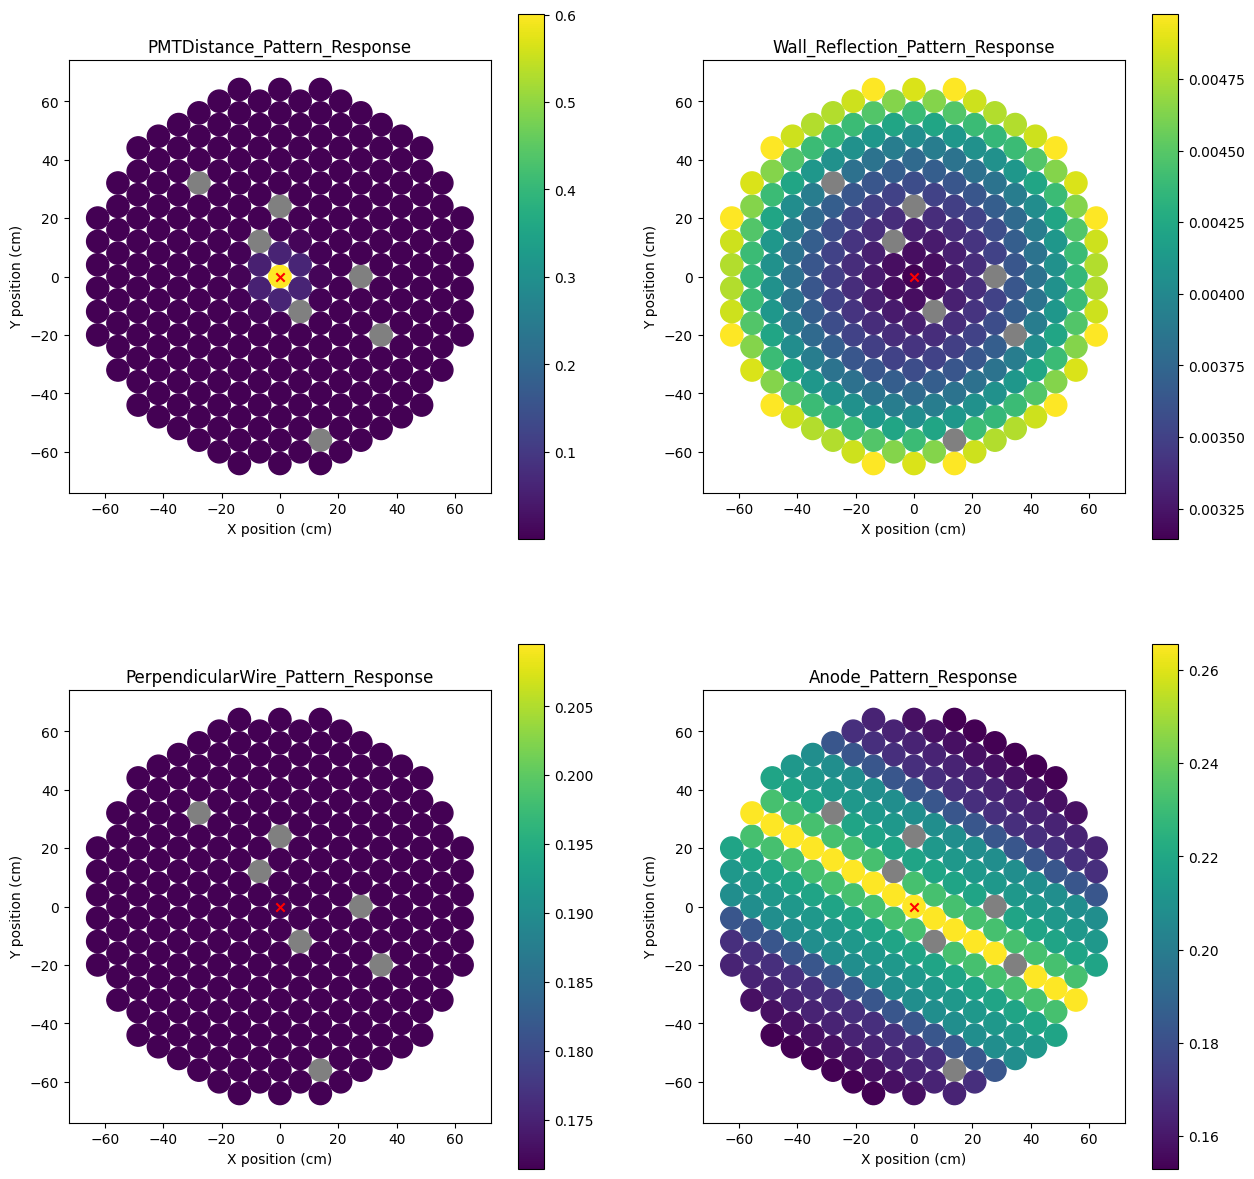

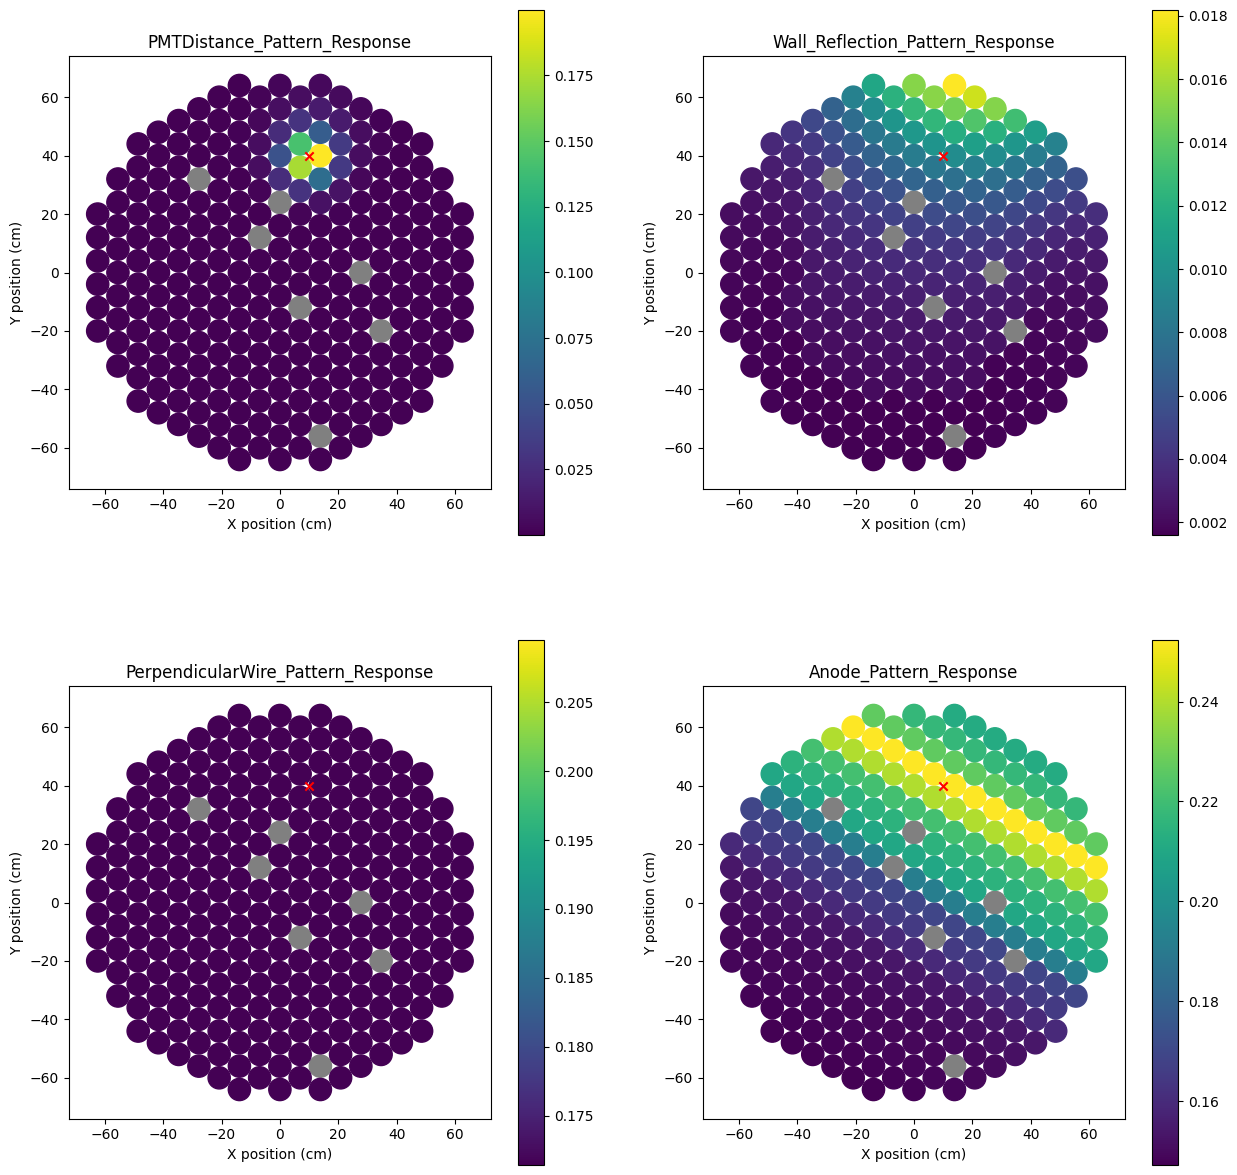

In [39]:
plot_response_components(parametrization, coord = [0,0])
plot_response_components(parametrization, coord = [10,40])

In [40]:
ls = []
for layer in parametrization.layers:
    ls += [layer.name]
print(ls)

['xy', 'PMTDistance_Pattern_Response', 'Wall_Reflection_Pattern_Response', 'AddReflectionContribution', 'PerpendicularWire_Pattern_Response', 'AddPerpContribution', 'Anode_Pattern_Response', 'AddAnodeContribution', 'i0', 'normalization']


In [ ]:
# Retrain Biased Variances
#tf.debugging.enable_check_numerics()
layers = ['xy', 'PMTDistance_Pattern_Response', 'Wall_Reflection_Pattern_Response', 'AddReflectionContribution', 'PerpendicularWire_Pattern_Response', 'AddPerpContribution', 'Anode_Pattern_Response', 'AddAnodeContribution', 'i0', 'normalization', 'pattern', 'LossLayer']
parametrization = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
with open(os.path.join(model_path, "parametrization_{identifier}.json"), "rb") as f:
    weight_dict = json.load(f)
load_weights_from_dict(parametrization, weight_dict)


# Load Variances
#biased_model = gen_mod_Shenayang(weight_path=os.path.join(model_path,"biased_model_trained_var_trained_{identifier}.h5".format(identifier=identifier)))
#parametrization.get_layer("LossLayer").set_weights(biased_model.get_layer("LossLayer").weights)
parametrization.get_layer("LossLayer").set_call_mode("LUT_untrainable_std", return_ratio=True)
# And train
"""for layer in parametrization.layers:
    if layer.name in layers and layer.name not in ['PMTDistance_Pattern_Response', 'i0']:
        layer.trainable = False
    else:
        layer.trainable = True"""

parametrization.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

# Ran the cell a bunch of times so this 
print("baseline:")
print(parametrization.evaluate( x = {'xy':pos[val_split], 'pattern':patterns[val_split]}, batch_size = 2**12, verbose = 1))

parametrization.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]},
                            y = None,
                            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, None),   
                            epochs = 1, batch_size = 2**10,
                            verbose = 1)
save_weights_to_dict(parametrization, os.path.join(model_path, "parametrization_{identifier}_first_train.json"))


baseline =  1.3718
8/8 [==============================] - 33s 4s/step - loss: 2.9864
2.9864020347595215
19/19 [==============================] - ETA: 0s - loss: 3.4932

KeyboardInterrupt: 

In [ ]:
# Do grid search
parametrization = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
with open(os.path.join(model_path, "parametrization_{identifier}_var.json"), "rb") as f:
    weight_dict = json.load(f)
load_weights_from_dict(parametrization, weight_dict) 
new_pos = do_grid_search(pos, patterns, parametrization, min_resolution)
np.save(new_pos, os.path.join(pos_refit_path, "pos_refit_{identifier}.npy"))

In [ ]:
# And repeat with new pos 

In [ ]:
# -------------------------------- Load Data ----------------------------------------------#
def tmp(path):
    # SR2 Processed data 
    tmp = []
    for i in os.listdir(path):
        if not os.path.isdir(os.path.join(path, i)):
            tmp +=  [np.load(os.path.join(path, i))['arr_0']]
    tmp = np.concatenate(tmp)
    return np.column_stack([tmp['s2_x_cnf'], tmp['s2_y_cnf']]), tmp['s2_area_per_channel'][:,not_dead_pmts]

seed = np.random.randint(0, 100000)
data_path = os.path.join(data_path)
pos, patterns = tmp(data_path)

pos = np.load(os.path.join(pos_refit_path, "pos_refit_0.npy"))

ns = np.arange(len(pos))

np.random.seed(seed)
np.random.shuffle(ns)

train_split = ns[:int(0.7*len(pos))]
val_split = ns[int(0.7*len(pos)):]

print(seed)


identifier = 1


In [ ]:
# Train the model
biased_model = train_cnn(identifier="{identifier}", pos=pos, patterns=patterns, train_split=train_split, val_split=val_split)

Epoch 1/5
4917/4917 [==============================] - 736s 149ms/step - loss: 13.7711 - val_loss: 4.7473 - lr: 0.0100
Epoch 2/5
4917/4917 [==============================] - ETA: 0s - loss: 13.4778
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
4917/4917 [==============================] - 733s 149ms/step - loss: 13.4778 - val_loss: 5.5849 - lr: 0.0100
Epoch 3/5
4917/4917 [==============================] - ETA: 0s - loss: 13.4455
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Restoring model weights from the end of the best epoch: 1.
4917/4917 [==============================] - 733s 149ms/step - loss: 13.4455 - val_loss: 6.1559 - lr: 1.0000e-03
Epoch 3: early stopping


In [ ]:
parametrization = train_on_teacher(weight_path="biased_model_trained_var_trained_{identifier}.h5", n_points = 25_000)
# Save the model
import json
save_weights_to_dict(parametrization, os.path.join(model_path, "parametrization_{identifier}.json"))

In [ ]:
# Retrain Biased Variances
parametrization = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
with open(os.path.join(model_path, "parametrization_{identifier}.json"), "rb") as f:
    weight_dict = json.load(f)
load_weights_from_dict(parametrization, weight_dict)
# Load Variances
biased_model = gen_mod_Shenayang(weight_path="biased_model_trained_var_trained_0.h5")
parametrization.get_layer("LossLayer").set_weights(biased_model.get_layer("LossLayer").weights)

parametrization.get_layer("LossLayer").set_call_mode("LUT_trainable_std")
# And train
def loss_function(y_true, y_pred):
        return y_pred
parametrization.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=loss_function)
parametrization.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]},
                            y = patterns[train_split],
                            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                            epochs = 1, batch_size = 2**12,
                            verbose = 1)
save_weights_to_dict(parametrization, os.path.join(model_path, "parametrization_{identifier}_var.json"))

In [ ]:
# Do grid search
parametrization = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
with open(os.path.join(model_path, "parametrization_{identifier}_var.json"), "rb") as f:
    weight_dict = json.load(f)
load_weights_from_dict(parametrization, weight_dict) 
new_pos = do_grid_search(pos, patterns, parametrization, min_resolution)
np.save(new_pos, os.path.join(pos_refit_path, "pos_refit_{identifier}.npy"))


# Train Large Model

Training Strategy:
- Train The model on Chi2 with Gaussian Approx and 0.5 std

- Train the Variances on Gaussian Likelihood only - Only for High signal PE >40 everything else is ignored

- Retrain with new variances 

- Retrain Variances 

- Now fit one model per variance

In [9]:
# -------------------------------- Load Data ----------------------------------------------#
def tmp(path):
    # SR2 Processed data 
    tmp = []
    for i in os.listdir(path):
        if not os.path.isdir(os.path.join(path, i)):
            tmp +=  [np.load(os.path.join(path, i))['arr_0']]
    tmp = np.concatenate(tmp)
    return np.column_stack([tmp['s2_x_cnf'], tmp['s2_y_cnf']]), tmp['s2_area_per_channel'][:,not_dead_pmts]

seed = np.random.randint(0, 100000)
data_path = os.path.join(data_path)
pos, patterns = tmp(data_path)

ns = np.arange(len(pos))

np.random.seed(seed)
np.random.shuffle(ns)

train_split = ns[:int(0.7*len(pos))]
val_split = ns[int(0.7*len(pos)):]

print(seed)

28026


In [12]:
# Train Entire Model Loading the dense 
#tf.debugging.enable_check_numerics(
#    stack_height_limit=30, path_length_limit=50
#)

biased_model = gen_mod_Shenayang()
# Remove training of Variances For now
biased_model.get_layer('LossLayerLUT').trainable = False
# Compile and train 
def loss_function(y_true, y_pred):
    return y_pred

reduce_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    mode = 'min',
    factor=0.1,     
    patience=1,     
    min_delta=0.04, 
    min_lr=1e-3,    
    verbose=1       
)

biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 1, batch_size = 2**8,
                        callbacks=[reduce_lr], verbose = 1)
biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 4, batch_size = 2**8,
                        callbacks=[reduce_lr], verbose = 1)
# 0.2699 to beat
biased_model.save("biased_model_full_trained.h5")

4917/4917 [==============================] - 762s 155ms/step - loss: 0.2819 - val_loss: 0.3108 - lr: 0.0100
Epoch 1/4
4917/4917 [==============================] - 856s 174ms/step - loss: 0.3668 - val_loss: 0.3786 - lr: 0.0010
Epoch 2/4
4917/4917 [==============================] - 854s 174ms/step - loss: 0.3843 - val_loss: 0.3928 - lr: 0.0010
Epoch 3/4
4917/4917 [==============================] - 846s 172ms/step - loss: 0.3875 - val_loss: 0.3702 - lr: 0.0010
Epoch 4/4
4917/4917 [==============================] - 762s 155ms/step - loss: 0.3948 - val_loss: 0.3592 - lr: 0.0010


/opt/XENONnT/anaconda/envs/XENONnT_2024.03.1/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
def loss_function(y_true, y_pred):
    return y_pred
biased_model = gen_mod_Shenayang()
biased_model.load_weights("biased_model_full_trained.h5", by_name=True, skip_mismatch=True)
biased_model.get_layer('LossLayerLUT').train_variances.assign(True)
biased_model.get_layer('LossLayerLUT').trainable = True
# Deactivate all other layers
for layer in biased_model.layers:
    if layer.name != 'LossLayerLUT':
        layer.trainable = False
# Compile and train
biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 1, batch_size = 2**4,
                        callbacks=[], verbose = 1)
biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 1, batch_size = 2**4,
                        callbacks=[], verbose = 1)

biased_model.save("biased_model_full_trained_variances.h5")


78668/78668 [==============================] - 782s 10ms/step - loss: 8.0445 - val_loss: 8.0482


/opt/XENONnT/anaconda/envs/XENONnT_2024.03.1/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(array([ 1.,  0.,  2.,  0.,  1.,  3.,  1.,  2.,  1.,  3.,  1.,  2.,  1.,
         1.,  1.,  4.,  1.,  1.,  1.,  1.,  0.,  1.,  3.,  2.,  0.,  3.,
         2.,  2.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  0.,  4.,  0.,
         0.,  3.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  3.,  2.,  4.,  1.,  1.,  4.,  4.,  0.,  3.,  2.,  7.,  5.,
         7.,  5.,  4., 10.,  4., 12.,  4.,  2.,  5.,  4.,  9.,  4., 12.,
         4., 11., 11.,  6.,  5.,  5.,  1.,  3.,  2.,  3.,  1.,  0.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([0.60630816, 0.61024511, 0.614182  , 0.61811894, 0.62205583,
        0.62599277, 0.62992966, 0.63386661, 0.63780349, 0.64174044,
        0.64567733, 0.64961427, 0.65355116, 0.65748811, 0.66142499,
        0.66536194, 0.66929883, 0.67323577, 0.67717272, 0.68110961,
        0.68504655, 0.68898344, 0.69292039, 0.69685727, 0.70079422,
        0.70473111, 0.70866805, 0.71260494, 0.71654189, 0.72047877,
        0.72441572, 0.7283

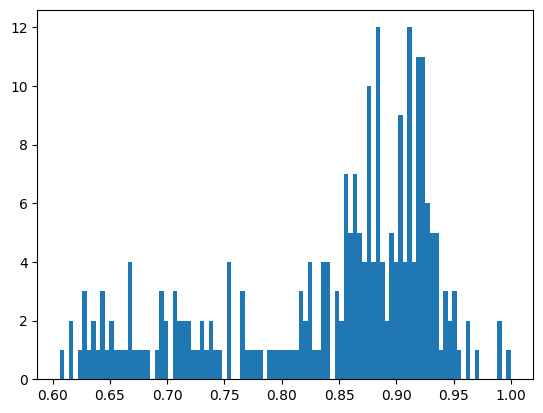

In [42]:
plt.hist(biased_model.get_layer('LossLayerLUT').weights[0].numpy(), bins = 100)

In [46]:
biased_model = gen_mod_Shenayang()
biased_model.load_weights("biased_model_full_trained_variances.h5", by_name=True, skip_mismatch=True)
biased_model.get_layer('LossLayerLUT').train_variances.assign(False)
biased_model.get_layer('LossLayerLUT').trainable = False
# Deactivate all other layers
for layer in biased_model.layers:
    if layer.name != 'LossLayerLUT':
        layer.trainable = True

biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 1, batch_size = 2**8,
                        callbacks=[reduce_lr], verbose = 1)
biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 1, batch_size = 2**8,
                        callbacks=[reduce_lr], verbose = 1)
biased_model.save("biased_model_full_trained_variances_trained.h5")

4917/4917 [==============================] - 757s 154ms/step - loss: -0.1126 - val_loss: -0.1113 - lr: 1.0000e-04


/opt/XENONnT/anaconda/envs/XENONnT_2024.03.1/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
def loss_function(y_true, y_pred):
    return y_pred
biased_model = gen_mod_Shenayang()
biased_model.load_weights("biased_model_full_trained_variances_trained.h5", by_name=True, skip_mismatch=True)
biased_model.get_layer('LossLayerLUT').train_variances.assign(True)
biased_model.get_layer('LossLayerLUT').trainable = True
# Deactivate all other layers
for layer in biased_model.layers:
    if layer.name != 'LossLayerLUT':
        layer.trainable = False
# Compile and train
biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 1, batch_size = 2**4,
                        callbacks=[], verbose = 1)
biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss=loss_function)
biased_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 1, batch_size = 2**4,
                        callbacks=[], verbose = 1)

biased_model.save("biased_model_full_trained_variances_trained_variances.h5")


78668/78668 [==============================] - 785s 10ms/step - loss: 7.9647 - val_loss: 7.9616


/opt/XENONnT/anaconda/envs/XENONnT_2024.03.1/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(array([ 1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  2.,  1.,  1.,  6.,  1.,  2.,  1.,  0.,  4.,
         1.,  4.,  1.,  1.,  4.,  2.,  0.,  1.,  0.,  0.,  2.,  0.,  2.,
         0.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  3.,
         0.,  2.,  1.,  0.,  1.,  1.,  0.,  2.,  1.,  4.,  3.,  1.,  0.,
         2.,  1.,  0.,  3.,  5.,  1.,  3.,  4.,  3.,  8.,  9.,  7.,  5.,
         7.,  7.,  6.,  5., 11., 12., 11.,  8.,  8., 13.,  8.,  6.,  5.,
         3.,  4.,  1.,  3.,  1.,  0.,  0.,  0.,  2.]),
 array([0.53032577, 0.5350225 , 0.53971928, 0.54441601, 0.54911274,
        0.55380946, 0.55850625, 0.56320298, 0.5678997 , 0.57259643,
        0.57729322, 0.58198994, 0.58668667, 0.5913834 , 0.59608018,
        0.60077691, 0.60547364, 0.61017036, 0.61486715, 0.61956388,
        0.6242606 , 0.62895733, 0.63365412, 0.63835084, 0.64304757,
        0.6477443 , 0.65244108, 0.65713781, 0.66183454, 0.66653132,
        0.67122805, 0.6759

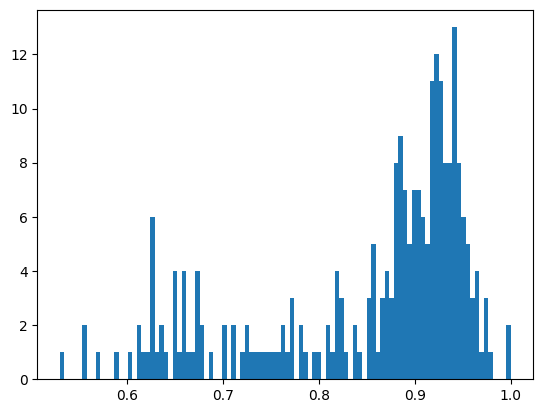

In [48]:
plt.hist(biased_model.get_layer('LossLayerLUT').weights[0].numpy(), bins = 100)

In [7]:
biased_model = gen_mod_Shenayang()
def loss_function(y_true, y_pred):
    return y_pred
biased_model.load_weights("biased_model_full_trained_variances_trained.h5", by_name=True, skip_mismatch=True)
biased_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=loss_function)


56191/56191 [==============================] - 630s 11ms/step


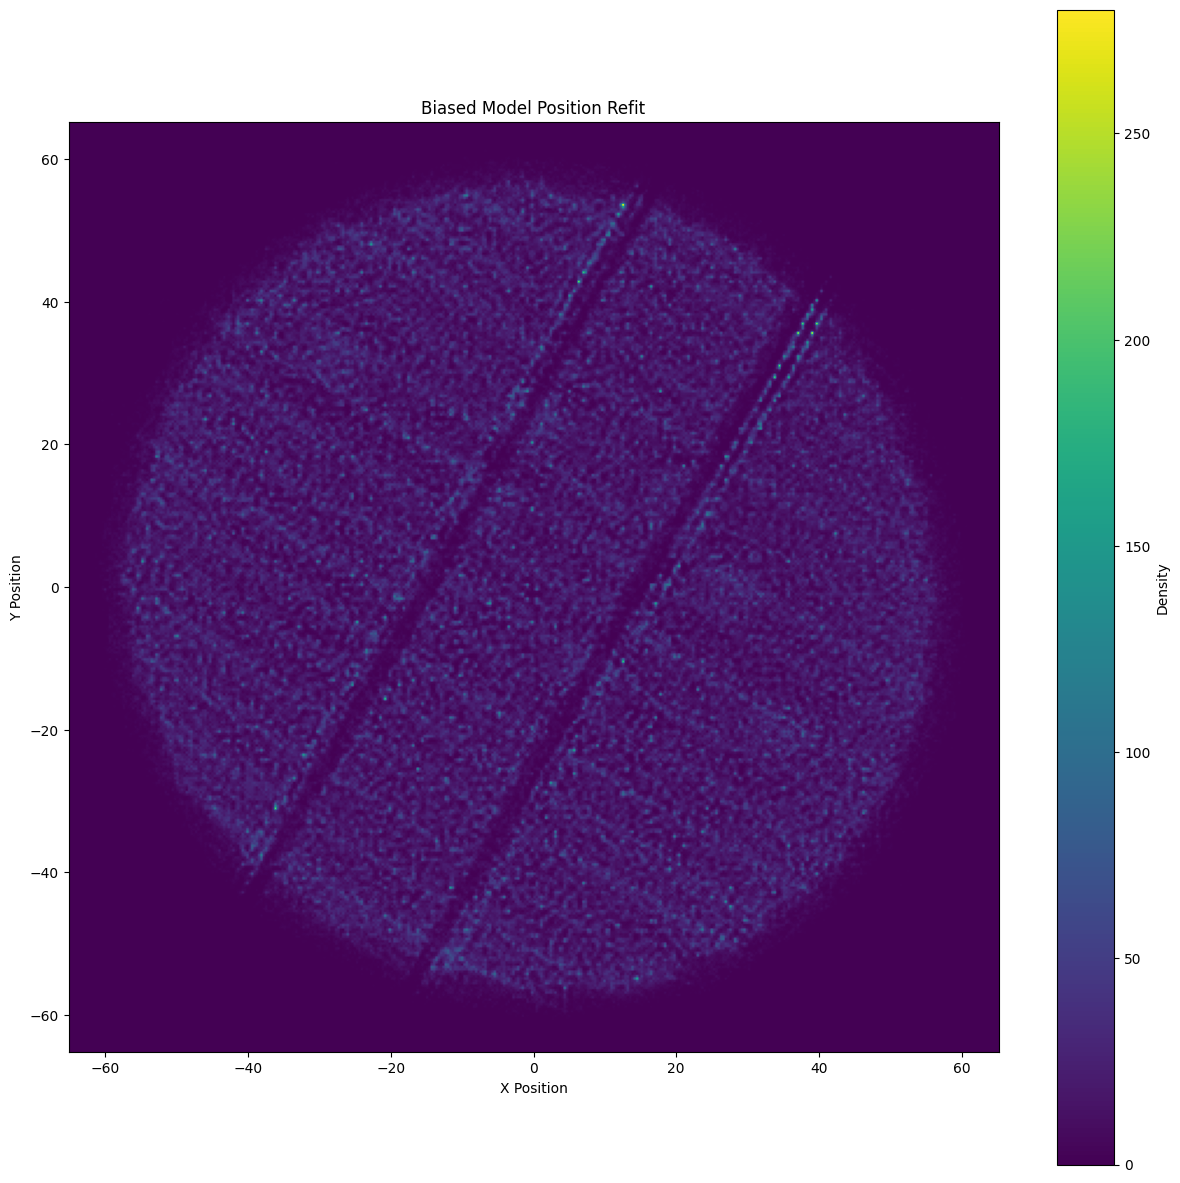

In [ ]:
# Do Grid Search (and save) 696 minutes
grid_pos = do_grid_search(pos, patterns, biased_model, min_resolution)
np.save(os.path.join(pos_refit_path, 'biased_model_grid_pos.npy'), grid_pos)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
do_density_plot(ax = ax, pos=grid_pos, title="Biased Model Position Refit", bins = 400)
del grid_pos

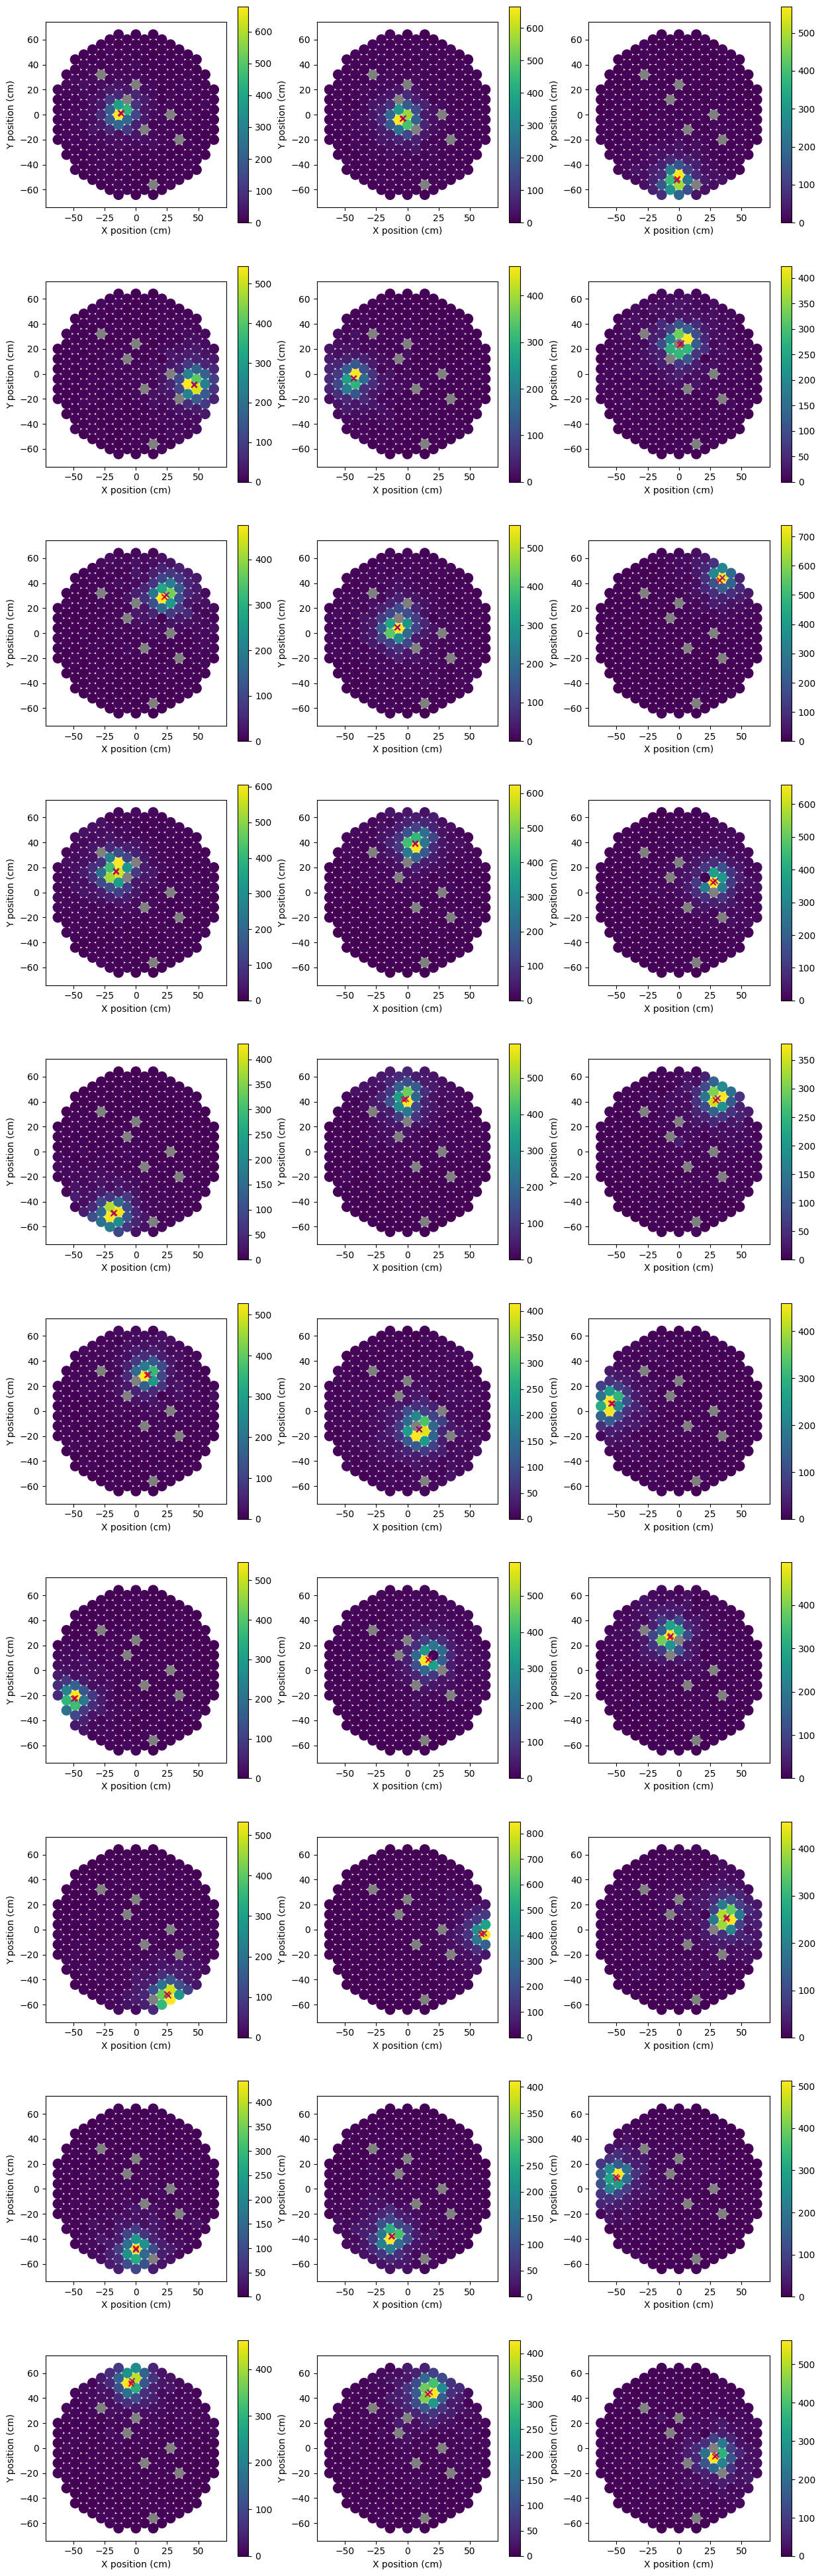

In [15]:
# Do density plot in a 10x3 grid for random events 
# To check new positions, for some reason I cant fit the basic LCE decomposition on the new positions
fig, ax = plt.subplots(10, 3, figsize=(15, 50))

ax = ax.flatten()

def tmp(path):
    # SR2 Processed data 
    tmp = []
    for i in os.listdir(path):
        if not os.path.isdir(os.path.join(path, i)):
            tmp +=  [np.load(os.path.join(path, i))['arr_0']]
    tmp = np.concatenate(tmp)
    return np.column_stack([tmp['s2_x_cnf'], tmp['s2_y_cnf']]), tmp['s2_area_per_channel'][:,not_dead_pmts]
data_path = '/Code/processed_data/new_Kr' # ONly locally
pos, patterns = tmp(data_path)
new_pos = np.load('/Code/ActualThesisWork/data/pos_refit/biased_model_grid_pos.npy')

for i in ax:
    idx= np.random.randint(0, len(pos))
    tmp = np.zeros((len(pmt_pos_top)))
    tmp[not_dead_pmts] = patterns[idx]
    plot_pmt_response(pmt_pos=pmt_pos_top, response=tmp,  ax=i, mark_spot=new_pos[idx], dead_pmts=dead_pmts)
    i.scatter(pos[idx,0], pos[idx,1], c='purple', marker='x', alpha=0.8 )

# Parametrized Model - Student Teacher Approach

In [64]:
# DEfine teacher student class
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the Teacher-Student Model class using a custom training step.
class TeacherStudentModel(Model):
    def __init__(self, teacher, student, temperature=1.0):
        """
        Args:
            teacher: A Keras Model that generates the target pattern.
            student: A Keras Model that tries to mimic the teacher.
            temperature: A parameter for softening distributions (if needed).
        """
        super(TeacherStudentModel, self).__init__()
        self.teacher = teacher
        self.student = student
        self.temperature = temperature
        # Freeze the teacher's weights.
        self.teacher.trainable = False

    def compile(self, optimizer, distillation_loss, **kwargs):
        """
        Args:
            optimizer: Optimizer for updating student weights.
            distillation_loss: Loss function comparing teacher and student predictions.
        """
        super(TeacherStudentModel, self).compile(**kwargs)
        self.optimizer = optimizer
        self.distillation_loss = distillation_loss

    def train_step(self, x):
        # x is provided directly; no dummy labels are needed.
        teacher_preds = self.teacher(x, training=False)
        
        with tf.GradientTape() as tape:
            student_preds = self.student(x, training=True)
            loss = self.distillation_loss(teacher_preds, student_preds)

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))
        return {"loss": loss}

    def test_step(self, x):
        teacher_preds = self.teacher(x, training=False)
        student_preds = self.student(x, training=False)
        loss = self.distillation_loss(teacher_preds, student_preds)
        return {"loss": loss}

In [38]:
# Load Teacher Model
teacher_superset = gen_mod_Shenayang("biased_model_full_trained_variances_trained.h5")
#teacher_superset.load_weights("biased_model_full_trained_variances_trained.h5", by_name=True, skip_mismatch=True)
teacher = Model(inputs = teacher_superset.get_layer("xy").input, outputs=teacher_superset.get_layer("normalization").output)

In [123]:
# Load Addative flavor student
seed = np.random.randint(0, 100000)
print(seed)
student = gen_model(seed=seed, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
student = Model(inputs = student.get_layer("xy").input, outputs=student.get_layer("normalization").output)



83348


In [127]:
#Train
ts_model = TeacherStudentModel(teacher, student)

# Set optimization to not use the Neural Net
ts_model.student.get_layer('Wall_Reflection_Pattern_Response').get_layer('Event_Wall_distance').set_mode('optimize', tol=1e-2, max_iter=100)

def cosine_loss(y_true, y_pred):
    # y_true: teacher outputs, y_pred: student outputs
    # We flip the sign so that a higher cosine similarity results in a lower loss.
    return -tf.reduce_mean(tf.keras.losses.cosine_similarity(y_true, y_pred))
mse_loss = tf.keras.losses.MeanSquaredError()
def mspe(y_true, y_pred):
    return mse_loss(y_true*100, y_pred*100)
distillation_loss = mspe#tf.keras.losses.MeanAbsolutePercentageError()#cosine_loss

n_points = 25_000
theta = 2 * np.pi * np.random.rand(n_points)
r = np.sqrt(np.random.rand(n_points)) * 66.4
X_dummy = np.column_stack((r * np.cos(theta), r * np.sin(theta)))  # Dummy input data

# Fit central events first
ts_model.student.get_layer('Wall_Reflection_Pattern_Response').trainable = False
ts_model.student.get_layer('AddReflectionContribution').trainable = False
ts_dataset_low_r = tf.data.Dataset.from_tensor_slices(X_dummy[np.linalg.norm(X_dummy, axis=-1) < 40]).batch(32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ts_model.compile(optimizer=optimizer, distillation_loss=distillation_loss)
ts_model.fit(ts_dataset_low_r, epochs=5)


# Fit edge events
ts_model.student.get_layer('PMTDistance_Pattern_Response').trainable = False
ts_model.student.get_layer('Wall_Reflection_Pattern_Response').trainable = True
ts_model.student.get_layer('AddReflectionContribution').trainable = True
ts_dataset_high_r = tf.data.Dataset.from_tensor_slices(X_dummy[np.linalg.norm(X_dummy, axis=-1) > 40]).batch(32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ts_model.compile(optimizer=optimizer, distillation_loss=distillation_loss)
ts_model.fit(ts_dataset_high_r, epochs=5)

ts_model.student.get_layer('PMTDistance_Pattern_Response').trainable = True

# Finetune the entire model
ts_dataset = tf.data.Dataset.from_tensor_slices(X_dummy).batch(32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ts_model.fit(ts_dataset, epochs=4)
# Lower Learning Rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
def new_loss(y_true, y_pred):
    return tf.math.reduce_mean(tf.math.abs(y_true*100-y_pred*100))
ts_model.compile(optimizer=optimizer, distillation_loss=new_loss)
ts_model.fit(ts_dataset, epochs=5)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
def new_loss(y_true, y_pred):
    return tf.math.reduce_mean(tf.math.abs(y_true*100-y_pred*100))
ts_model.compile(optimizer=optimizer, distillation_loss=new_loss)
ts_model.fit(ts_dataset, epochs=3)

# Inspect Anode and Perp contributions4
for i in ts_model.student.layers:
    if "Add" in i.name:
        print(i.name)
        print(i.get_weights())
        print("")

Epoch 1/5
283/283 [==============================] - 18s 49ms/step - loss: 0.1687
Epoch 2/5
283/283 [==============================] - 14s 49ms/step - loss: 0.1667
Epoch 3/5
283/283 [==============================] - 14s 50ms/step - loss: 0.1656
Epoch 4/5
283/283 [==============================] - 14s 50ms/step - loss: 0.1649
Epoch 5/5
283/283 [==============================] - 14s 48ms/step - loss: 0.1643
Epoch 1/5
500/500 [==============================] - 28s 49ms/step - loss: 0.3872
Epoch 2/5
500/500 [==============================] - 24s 48ms/step - loss: 0.1633
Epoch 3/5
500/500 [==============================] - 24s 48ms/step - loss: 0.1260
Epoch 4/5
500/500 [==============================] - 24s 49ms/step - loss: 0.1138
Epoch 5/5
500/500 [==============================] - 25s 49ms/step - loss: 0.1076
Epoch 1/4
782/782 [==============================] - 38s 48ms/step - loss: 0.1699
Epoch 2/4
782/782 [==============================] - 37s 48ms/step - loss: 0.1337
Epoch 3/4
782/78

In [128]:
for i in ts_model.student.layers:
    if "Add" in i.name:
        print(i.name)
        print(i.get_weights())
        print("")

AddReflectionContribution
[array([1.0227386], dtype=float32)]

AddPerpContribution
[array([-0.02255617], dtype=float32)]

AddAnodeContribution
[array([-0.00327985], dtype=float32)]



1/1 [==============================] - 0s 204ms/step


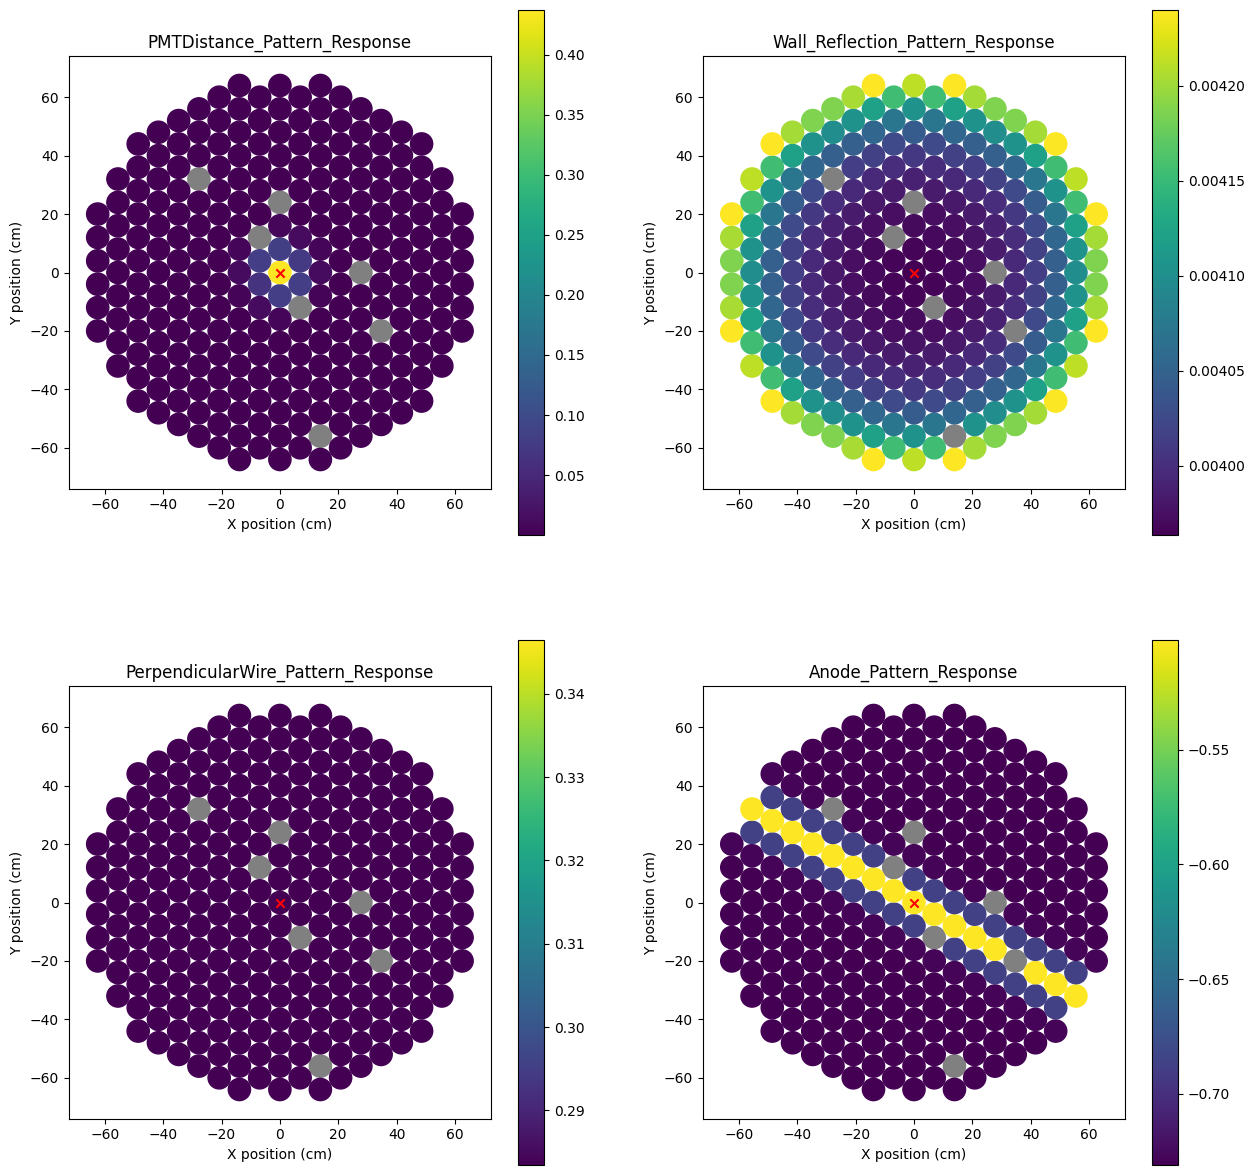

In [129]:
test_model =ts_model.student
direct_model = test_model.get_layer("PMTDistance_Pattern_Response")
reflection_model = test_model.get_layer("Wall_Reflection_Pattern_Response")
perp_model = test_model.get_layer("PerpendicularWire_Pattern_Response")
anode_model = test_model.get_layer("Anode_Pattern_Response")

# make 2x2 plot of prediction for x=0,0
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()

for i, model in enumerate((direct_model, reflection_model, perp_model, anode_model)):
    res = np.zeros(len(not_dead_pmts)+len(dead_pmts))
    coord = [0,0]
    res[not_dead_pmts] = model.predict([coord])[0]
    plot_pmt_response(pmt_pos=pmt_pos_top, response=res, ax=ax[i], mark_spot=coord, dead_pmts=dead_pmts, title=model.name)


1/1 [==============================] - 0s 35ms/step


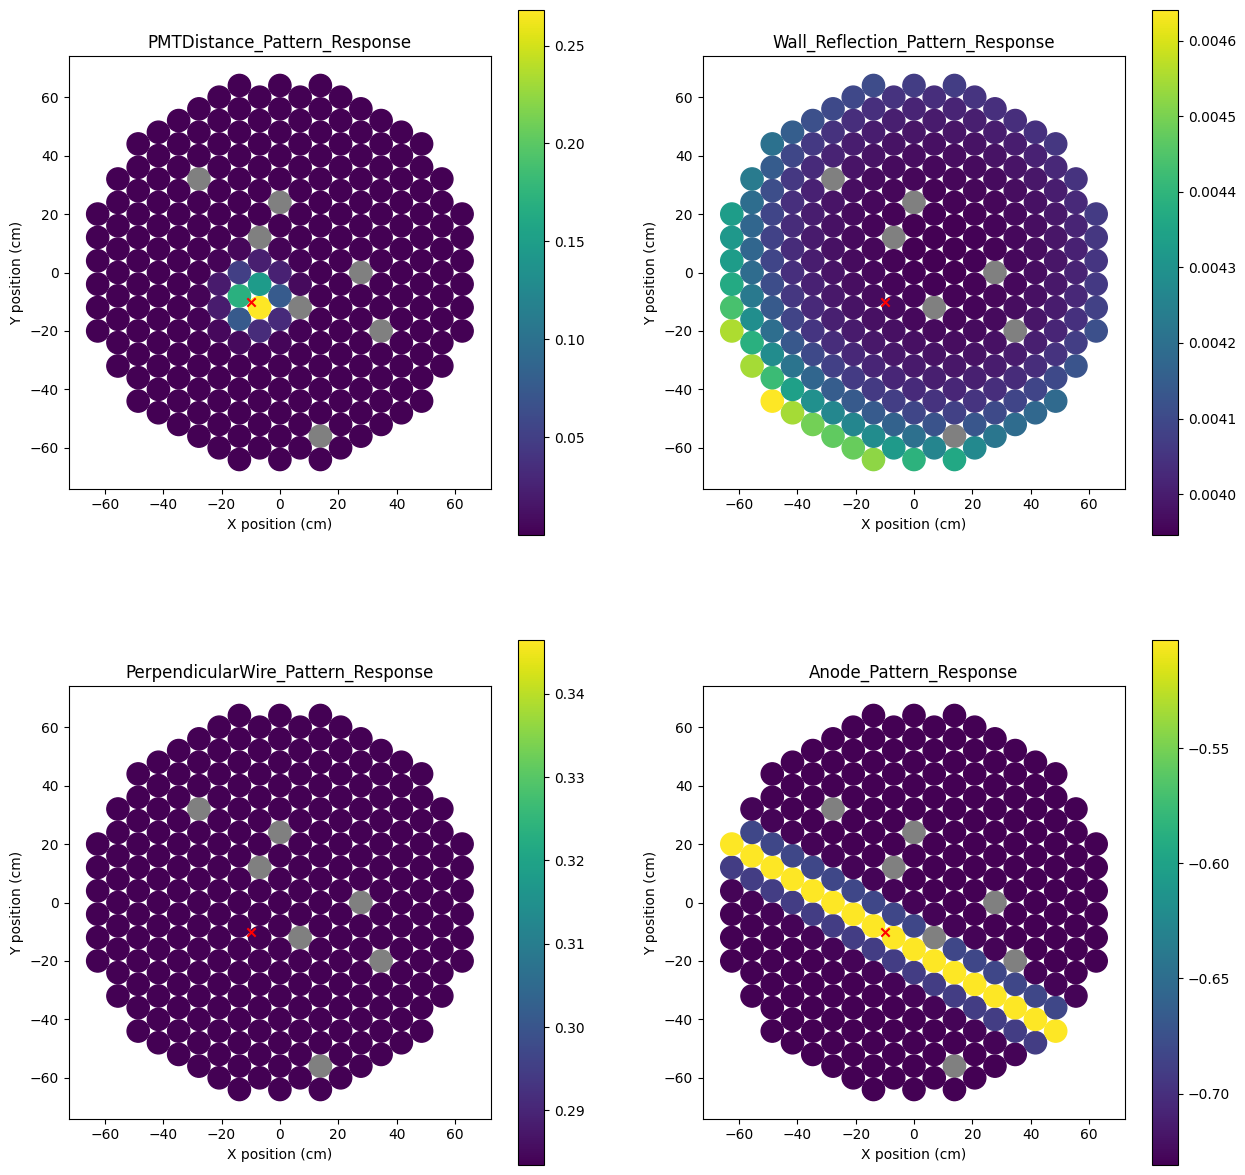

In [130]:
test_model =ts_model.student
direct_model = test_model.get_layer("PMTDistance_Pattern_Response")
reflection_model = test_model.get_layer("Wall_Reflection_Pattern_Response")
perp_model = test_model.get_layer("PerpendicularWire_Pattern_Response")
anode_model = test_model.get_layer("Anode_Pattern_Response")

# make 2x2 plot of prediction for x=0,0
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()

for i, model in enumerate((direct_model, reflection_model, perp_model, anode_model)):
    res = np.zeros(len(not_dead_pmts)+len(dead_pmts))
    coord = [-10,-10]
    res[not_dead_pmts] = model.predict([coord])[0]
    plot_pmt_response(pmt_pos=pmt_pos_top, response=res, ax=ax[i], mark_spot=coord, dead_pmts=dead_pmts, title=model.name)


In [131]:
reflection_model.get_layer('Event_Wall_distance').set_mode('optimize', tol=1e-4, max_iter=100)

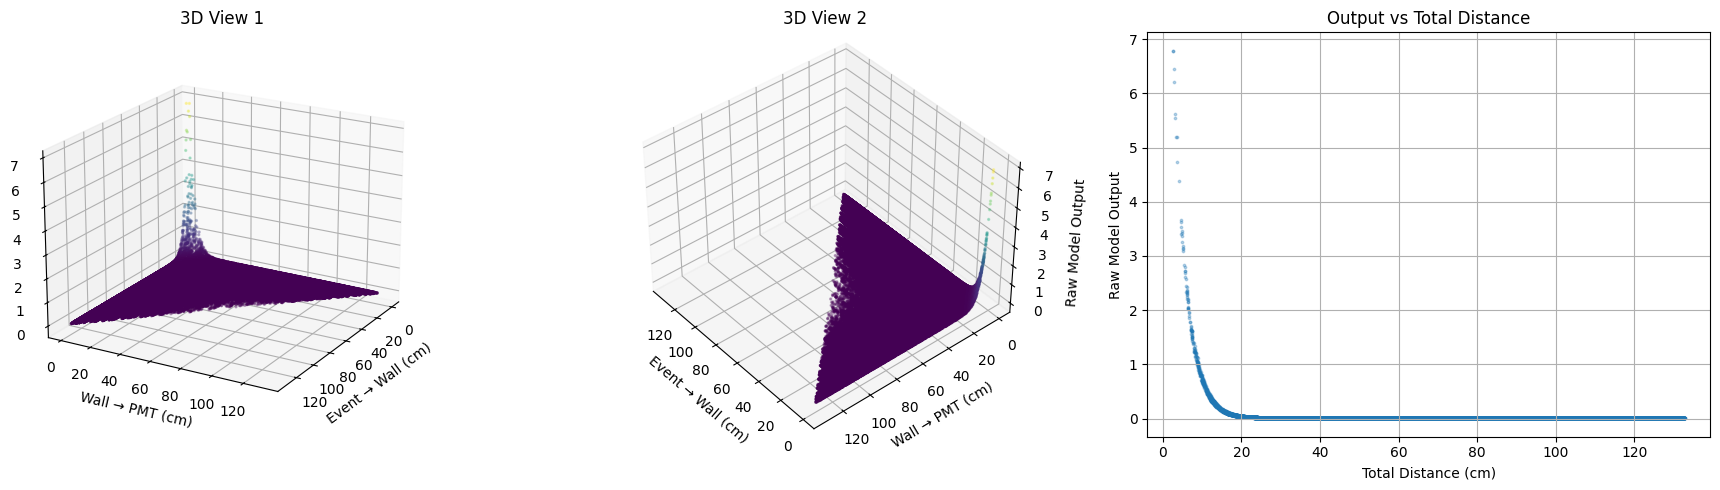

In [134]:
raw_output_model = Model(
    inputs=reflection_model.get_layer("xy_2").input,
    outputs=reflection_model.get_layer("Wall_Reshape").output
)

num_events = 500
events = sample_uniform_circle(num_events, R=66.4)  # (N, 2)
M = len(not_dead_pmts)

# Predict once
pred = raw_output_model.predict(events, verbose=0)  # shape: (N, M)
pred = pred.reshape(-1)  # (N*M,)

# Repeat event-pmt pairings to match predictions
events_exp = np.repeat(events, M, axis=0)
pmts_exp = np.tile(pmt_pos_top[not_dead_pmts], (num_events, 1))

# Compute true wall vertices
_, _, wall_true = compute_reflection_vertices(events, pmt_pos_top[not_dead_pmts], R=66.4, num_angles=1800)
wall_true = wall_true.reshape(-1, 2)

# Distances
d_e2w = np.linalg.norm(events_exp - wall_true, axis=1)
d_w2p = np.linalg.norm(pmts_exp - wall_true, axis=1)
d_total = d_e2w + d_w2p

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 5))

# 3D Plot: View 1
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(d_e2w, d_w2p, pred, c=pred, cmap='viridis', s=2, alpha=0.3)
ax1.set_xlabel('Event → Wall (cm)')
ax1.set_ylabel('Wall → PMT (cm)')
ax1.set_zlabel('Raw Model Output')
ax1.set_title('3D View 1')
ax1.view_init(elev=20, azim=30)

# 3D Plot: View 2
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(d_e2w, d_w2p, pred, c=pred, cmap='viridis', s=2, alpha=0.3)
ax2.set_xlabel('Event → Wall (cm)')
ax2.set_ylabel('Wall → PMT (cm)')
ax2.set_zlabel('Raw Model Output')
ax2.set_title('3D View 2')
ax2.view_init(elev=40, azim=140)

# 2D Plot: Total Distance
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(d_total, pred, s=3, alpha=0.3)
ax3.set_xlabel('Total Distance (cm)')
ax3.set_ylabel('Raw Model Output')
ax3.set_title('Output vs Total Distance')
ax3.grid(True)

plt.tight_layout()
plt.show()


In [135]:
save_weights_to_dict(ts_model.student, os.path.join(model_path, 'student_model_full.json'))

### Attempt Multiplicative student


In [23]:
# Load Teacher Model
teacher_superset = gen_mod_Shenayang("biased_model_full_trained_variances_trained.h5")
#teacher_superset.load_weights("biased_model_full_trained_variances_trained.h5", by_name=True, skip_mismatch=True)
teacher = Model(inputs = teacher_superset.get_layer("xy").input, outputs=teacher_superset.get_layer("normalization").output)

In [24]:
# Load Addative flavor student
seed = np.random.randint(0, 100000)
print(seed)
student = gen_model(seed=seed, starting_model=None, include_wall = True, include_perp = True, include_anode = True, multiplication_layers=True)
student = Model(inputs = student.get_layer("xy").input, outputs=student.get_layer("normalization").output)

68268


In [25]:
#Train
ts_model = TeacherStudentModel(teacher, student)
def cosine_loss(y_true, y_pred):
    # y_true: teacher outputs, y_pred: student outputs
    # We flip the sign so that a higher cosine similarity results in a lower loss.
    return -tf.reduce_mean(tf.keras.losses.cosine_similarity(y_true, y_pred))
mse_loss = tf.keras.losses.MeanSquaredError()
def mspe(y_true, y_pred):
    return mse_loss(y_true*100, y_pred*100)
distillation_loss = mspe#tf.keras.losses.MeanAbsolutePercentageError()#cosine_loss

theta = 2 * np.pi * np.random.rand(250_000)
r = np.sqrt(np.random.rand(250_000)) * 66.4
X_dummy = np.column_stack((r * np.cos(theta), r * np.sin(theta)))  # Dummy input data

# Fit central events first
ts_model.student.get_layer('Wall_Reflection_Pattern_Response').trainable = False
ts_model.student.get_layer('AddReflectionContribution').trainable = False
ts_dataset_low_r = tf.data.Dataset.from_tensor_slices(X_dummy[np.linalg.norm(X_dummy, axis=-1) < 40]).batch(32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ts_model.compile(optimizer=optimizer, distillation_loss=distillation_loss)
ts_model.fit(ts_dataset_low_r, epochs=5)


# Fit edge events
ts_model.student.get_layer('Wall_Reflection_Pattern_Response').trainable = True
ts_model.student.get_layer('AddReflectionContribution').trainable = True
ts_dataset_high_r = tf.data.Dataset.from_tensor_slices(X_dummy[np.linalg.norm(X_dummy, axis=-1) > 40]).batch(32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ts_model.compile(optimizer=optimizer, distillation_loss=distillation_loss)
ts_model.fit(ts_dataset_high_r, epochs=5)

# Finetune the entire model
ts_dataset = tf.data.Dataset.from_tensor_slices(X_dummy).batch(32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ts_model.fit(ts_dataset, epochs=4)
# Lower Learning Rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
def new_loss(y_true, y_pred):
    return tf.math.reduce_mean(tf.math.abs(y_true*100-y_pred*100))
ts_model.compile(optimizer=optimizer, distillation_loss=new_loss)
ts_model.fit(ts_dataset, epochs=1)
# Inspect Anode and Perp contributions
for i in ts_model.student.layers:
    if "Add" in i.name:
        print(i.name)
        print(i.get_weights())
        print("")

Epoch 1/5
2840/2840 [==============================] - 63s 21ms/step - loss: 0.2295
Epoch 2/5
2840/2840 [==============================] - 58s 21ms/step - loss: 0.1728
Epoch 3/5
2840/2840 [==============================] - 59s 21ms/step - loss: 0.1681
Epoch 4/5
2840/2840 [==============================] - 59s 21ms/step - loss: 0.1658
Epoch 5/5
2840/2840 [==============================] - 59s 21ms/step - loss: 0.1647
Epoch 1/5
4973/4973 [==============================] - 115s 22ms/step - loss: 0.2123
Epoch 2/5
4973/4973 [==============================] - 110s 22ms/step - loss: 0.1382
Epoch 3/5
4973/4973 [==============================] - 112s 22ms/step - loss: 0.1300
Epoch 4/5
4973/4973 [==============================] - 112s 23ms/step - loss: 0.1259
Epoch 5/5
4973/4973 [==============================] - 112s 23ms/step - loss: 0.1232
Epoch 1/4
7813/7813 [==============================] - 177s 23ms/step - loss: 0.2038
Epoch 2/4
7813/7813 [==============================] - 176s 23ms/step 

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
def new_loss(y_true, y_pred):
    return tf.math.reduce_mean(tf.math.abs(y_true*100-y_pred*100))
ts_model.compile(optimizer=optimizer, distillation_loss=new_loss)
ts_model.fit(ts_dataset, epochs=1)

7813/7813 [==============================] - 183s 23ms/step - loss: 0.1035


In [27]:
for i in ts_model.student.layers:
    if "Add" in i.name:
        print(i.name)
        print(i.get_weights())
        print("")

AddReflectionContribution
[array([0.8309318], dtype=float32)]



1/1 [==============================] - 0s 211ms/step


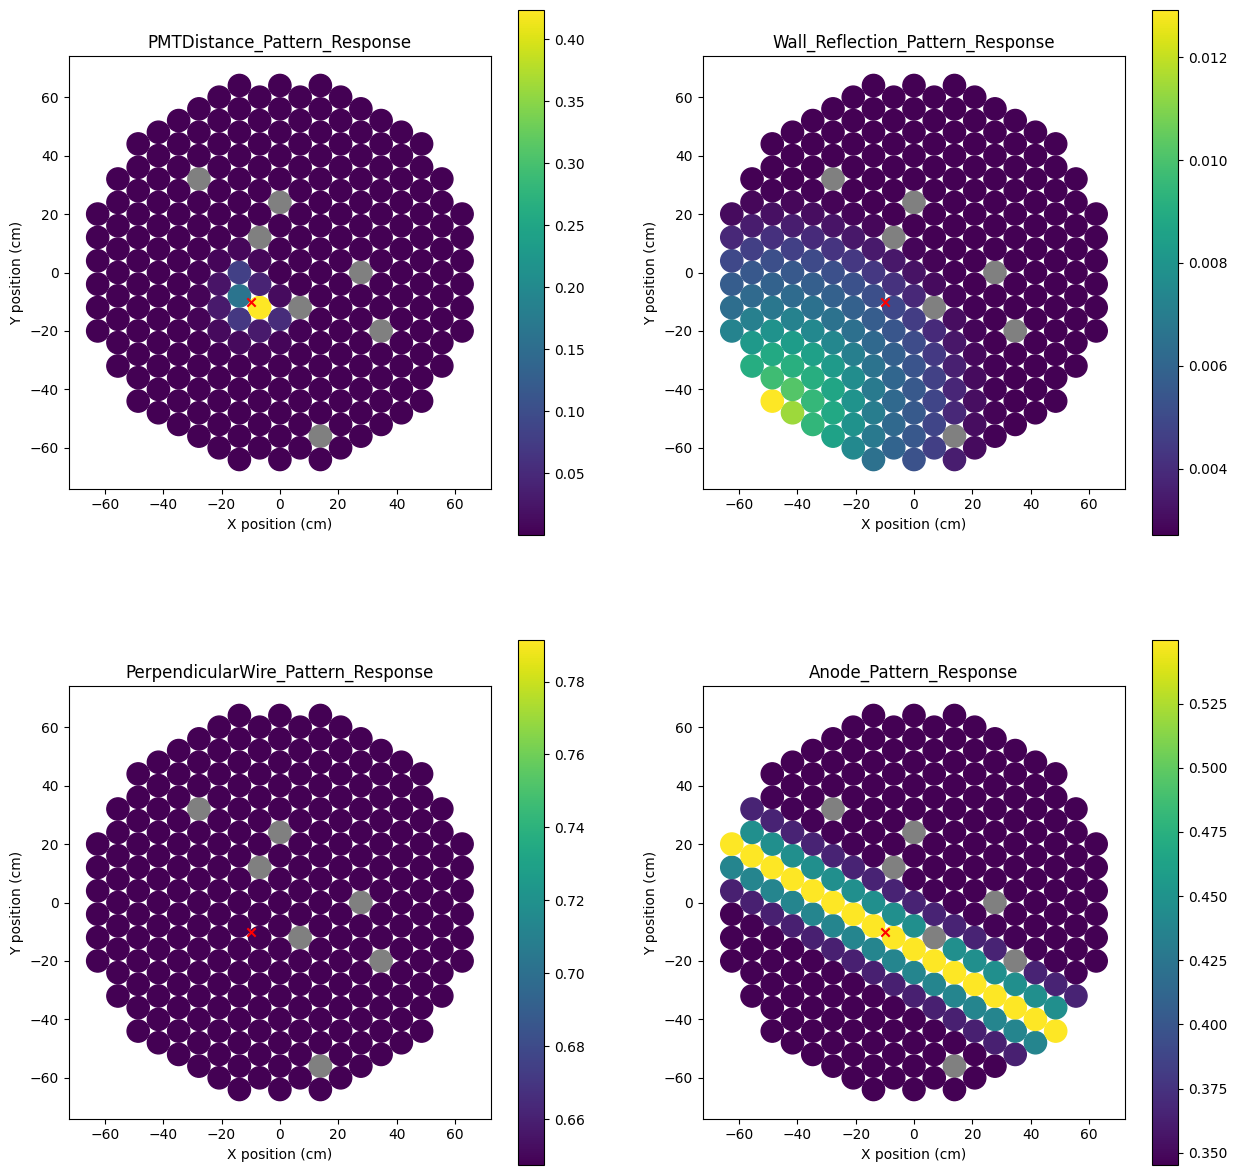

In [28]:
test_model =ts_model.student
direct_model = test_model.get_layer("PMTDistance_Pattern_Response")
reflection_model = test_model.get_layer("Wall_Reflection_Pattern_Response")
perp_model = test_model.get_layer("PerpendicularWire_Pattern_Response")
anode_model = test_model.get_layer("Anode_Pattern_Response")

# make 2x2 plot of prediction for x=0,0
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()

for i, model in enumerate((direct_model, reflection_model, perp_model, anode_model)):
    res = np.zeros(len(not_dead_pmts)+len(dead_pmts))
    coord = [-10,-10]
    res[not_dead_pmts] = model.predict([coord])[0]
    plot_pmt_response(pmt_pos=pmt_pos_top, response=res, ax=ax[i], mark_spot=coord, dead_pmts=dead_pmts, title=model.name)


In [29]:
save_weights_to_dict(ts_model.student, os.path.join(model_path, 'student_model_full_mult.json'))

In [10]:
# Quick testing
def tmp_():
    biased_model = gen_mod_Shenayang()
    def loss_function(y_true, y_pred):
        return y_pred
    biased_model.load_weights("biased_model_full_trained_variances_trained.h5", by_name=True, skip_mismatch=True)

    def tmp(path):
        # SR2 Processed data 
        tmp = []
        for i in os.listdir(path):
            if not os.path.isdir(os.path.join(path, i)):
                tmp +=  [np.load(os.path.join(path, i))['arr_0']]
        tmp = np.concatenate(tmp)
        return np.column_stack([tmp['s2_x_cnf'], tmp['s2_y_cnf']]), tmp['s2_area_per_channel'][:,not_dead_pmts]
    pos, patterns = tmp(data_path)
    tester = gen_model(seed=0, starting_model=None, include_wall = True, include_perp = True, include_anode = True)
    with open(os.path.join(model_path, 'student_model_full_mult.json'), 'r') as f:
        weights = json.load(f)
        tester = load_weights_from_dict(tester, weights)
    tester.get_layer('LossLayer').weights[0].assign(biased_model.get_layer('LossLayer').weights[0])
    tester.get_layer('LossLayer').set_call_mode("LUT_without_variable_std")
    loss = tester.predict({'xy':pos, 'pattern':patterns})
    print(np.nanmean(loss), np.nanstd(loss), np.nanmin(loss), np.nanmax(loss))
tmp_()

56191/56191 [==============================] - 496s 9ms/step
11.7752 11.199144 -66.62596 68.62596


# Parametrized Model Architecture

In [10]:
# -------------------------------- Load Data ----------------------------------------------#
def tmp(path):
    # SR2 Processed data 
    tmp = []
    for i in os.listdir(path):
        if not os.path.isdir(os.path.join(path, i)):
            tmp +=  [np.load(os.path.join(path, i))['arr_0']]
    tmp = np.concatenate(tmp)
    return np.column_stack([tmp['s2_x_cnf'], tmp['s2_y_cnf']]), tmp['s2_area_per_channel'][:,not_dead_pmts]
#data_path = '/Code/processed_data/new_Kr' # ONly locally
pos, patterns = tmp(data_path)
ns = np.arange(len(pos))
seed = np.random.randint(0, 100000)
print(seed)
np.random.seed(seed)
np.random.shuffle(ns)
split = 0.5
train_split = ns[:int(split*len(pos))]
val_split = ns[int(split*len(pos)):]
# Load New Pos 
#pos = np.load(os.path.join(pos_refit_path, 'biased_model_combined_best_pos.npy'))

87428


In [8]:
# Train at once 

In [9]:
seed = np.random.randint(0, 100000)
print(seed)
parametrized_model = gen_model(seed=seed, starting_model=None, include_wall = True, include_perp = True, include_anode = True)

with open(os.path.join(model_path, 'student_model_full.json'), 'r') as f:
    weights = json.load(f)
load_weights_from_dict(parametrized_model, weights)

parametrized_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std")
parametrized_model.get_layer('Wall_Reflection_Pattern_Response').get_layer('Event_Wall_distance').set_mode('optimize', tol=1e-2, max_iter=100)

def loss_function(y_true, y_pred):
    return y_pred

21325


In [12]:
### Train IN parts

seed = np.random.randint(0, 100000)
print(seed)
parametrized_model = gen_model(seed=seed, starting_model=None, include_wall = True, include_perp = True, include_anode = True)

with open(os.path.join(model_path, 'student_model_full.json'), 'r') as f:
    weights = json.load(f)
load_weights_from_dict(parametrized_model, weights)

parametrized_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std")
parametrized_model.get_layer('Wall_Reflection_Pattern_Response').get_layer('Event_Wall_distance').set_mode('optimize', tol=1e-2, max_iter=100)

def loss_function(y_true, y_pred):
    return y_pred

train_groups = (
    ('PMTDistance_Pattern_Response', 'i0'),
    ('Wall_Reflection_Pattern_Response', 'AddReflectionContribution'),
    ('PerpendicularWire_Pattern_Response', 'AddPerpContribution'),
    ('Anode_Pattern_Response', 'AddAnodeContribution'),
)
parametrized_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std")
parametrized_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1), loss=loss_function) # , clipvalue=0.1, clipnorm=0.1


42904


In [11]:
#~3.24 starting loss
for i, lr in enumerate((1e-7, 1e-8, 1e-9)):
    parametrized_model.get_layer('LossLayer').set_call_mode("LUT_untrainable_std")
    for j, layer_grps in enumerate(train_groups):
        # Set trainable layers
        for layer in parametrized_model.layers:
            if layer.name in layer_grps:
                layer.trainable = True
            else:
                layer.trainable = False
        # Compile and train
        parametrized_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss=loss_function) # , clipvalue=0.1, clipnorm=0.1
        parametrized_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                                y = patterns[train_split],
                                validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                                epochs = 1, batch_size = 2**14,
                                verbose = 1)
        # Save intermediate
        save_weights_to_dict(parametrized_model, os.path.join(model_path, 'student_refined_iter_{i}_{j}.json'))
    # Train Variance only 
    for layer in parametrized_model.layers:
        layer.trainable = False
    # Set variance training mode 
    parametrized_model.get_layer('LossLayer').set_call_mode("LUT_trainable_std")

    parametrized_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss=loss_function)
    parametrized_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                            y = patterns[train_split],
                            validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                            epochs = 1, batch_size = 2**14,
                            verbose = 1)
    # Save iter solution
    save_weights_to_dict(parametrized_model, os.path.join(model_path, 'student_refined_iter_{i}.json'))

55/55 [==============================] - 1414s 26s/step - loss: 3.2520 - val_loss: 3.2517


In [13]:
# Train Together 
i = 2 
with open(os.path.join(model_path, 'student_refined_iter_{i}.json')) as f:
    weights = json.load(f)
parametrized_model = load_weights_from_dict(parametrized_model, weights)
for layer in parametrized_model.layers:
    if layer.name in ('LossLayer', 'xy', 'normalization', 'pattern', ):
        layer.trainable = False 
    else:
        layer.trainable = True

parametrized_model.get_layer('LossLayer').set_call_mode("LUT_trainable_std")
print("Baseline")

parametrized_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-8), loss=loss_function) # , clipvalue=0.1, clipnorm=0.1
# 3.21
print(np.mean(parametrized_model({'xy':pos[val_split], 'pattern':patterns[val_split]},)))
parametrized_model.fit( x = {'xy':pos[train_split], 'pattern':patterns[train_split]}, 
                        y = patterns[train_split],
                        validation_data = ({'xy':pos[val_split], 'pattern':patterns[val_split]}, patterns[val_split]),   
                        epochs = 4, batch_size = 2**15,
                        verbose = 1)

#
print(np.mean(parametrized_model({'xy':pos[val_split], 'pattern':patterns[val_split]},)))


Baseline
3.25157
Epoch 1/4
28/28 [==============================] - 1562s 57s/step - loss: 3.2808 - val_loss: 3.2585
Epoch 2/4
 3/28 [==>...........................] - ETA: 12:49 - loss: 3.2797

KeyboardInterrupt: 

# Model Inspection

In [ ]:
# Inspect what the anode and perpendicular wire layers do: Hopefully learn how to easily refactor as multiplicative 



In [ ]:
# Student teacher approach 

# Encoder

In [ ]:
# Encoder

new_pos = train_and_update_pos(pos, patterns, parametrized_model, loss_function, epochs=20, n_iter = 5, verbose=1)
np.save(os.path.join(pos_refit_path, 'parametrized_model_encoder_pos.npy'), new_pos)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
do_density_plot(ax = ax, pos=new_pos, title="Biased Model Position Refit", bins = 400)
del new_pos

In [ ]:
# Do grid search
grid_pos = do_grid_search(pos, patterns, parametrized_model, min_resolution)
np.save(os.path.join(pos_refit_path, 'parametrized_model_grid_pos.npy'), grid_pos)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
do_density_plot(ax = ax, pos=grid_pos, title="Biased Model Position Refit", bins = 400)
del grid_pos


In [ ]:
# Combine pos
grid_pos = np.load(os.path.join(pos_refit_path, 'parametrized_model_grid_pos.npy'))
encoder_pos = np.load(os.path.join(pos_refit_path, 'parametrized_model_encoder_pos.npy'))
# Model Predict
grid_loss = np.mean(parametrized_model.predict({'xy':grid_pos, 'pattern':patterns}), axis=-1)
encoder_loss = np.mean(parametrized_model.predict({'xy':encoder_pos, 'pattern':patterns}), axis=-1)
print("Grid Loss: ", np.mean(grid_loss))
print("Encoder Loss: ", np.mean(encoder_loss))
# Make new pos set based on per element loss
new_pos = np.where(grid_loss < encoder_loss, grid_pos, encoder_pos)
np.save(os.path.join(pos_refit_path, 'parametrized_model_combined_best_pos.npy'), new_pos)
print("New Loss: ", np.mean(np.where(grid_loss < encoder_loss, grid_loss, encoder_loss)))
del grid_pos, encoder_pos, grid_loss, encoder_loss, new_pos

# Retrain

# Inspect